# Abstract

In December 2019, a novel coronavirus was found
in a seafood wholesale market in Wuhan, China. World
Health Organization (WHO) officially named this coronavirus
as COVID-19. Since the first patient was hospitalized on
December 12, 2019, China has reported a total of 78,824
confirmed COVID-19 cases and 2,788 deaths as of February
28, 2020. The COVID-19 has been successfully contained
in China but is spreading all over the world. COVID-19
epidemic is prone to disrupt and crumble the existing health-
care infrastructures in both the developed and developing
world. COVID19 also impacts people’s daily life and country’s
economic development. In this paper, we adopt mathematical
epidemic models such as Susceptible-Infected-Recovery (SIR),
Susceptible-Infected-Recovery-Fatality/Deaths (SIR-F) to sim-
ulate the epidemic on the data available for the entire world
and future projections on the number of infections, deaths in
six specific countries (Italy, France, Spain, Germany, USA,
and India) across a time-frame of 7 days, 1 month, 3 months,
and 3 years in future. We analyzed the epidemic by extending
the SIR-F model with controlled parameters and simulating
the behavior on our default case study data. We also fit other
mathematical models such as exponential and logistic models
to C(t), the cumulative number of positive infections trajectory
function. In the latter section, we also used statistical machine
learning techniques such as Polynomial regression, support
vector machine regression, and simple neural network such
as multilayer perceptron to better understand and learns the
underlying pattern of the real epidemic growth and the virus
proliferation pattern. We found out that the predictions by
the logistic model was underreported, i.e, the actual trajectory
is more complex than the logistic model. However, we found
out that different models found to be better in modeling the
pandemic outbreak in respective countries. We also performed
data analysis to project the infection, recovery, and death
statistics from the real data and also calculated the growth
factor of pandemic outbreak in the countries and grouping them
respectively. To our future projections and analysis, we found
out USA, followed by India are gonna be the most affected
countries with each resulting into millions of positive infections
cases and deaths.

### Downloading required external libraries
* Sklearn
* Tensorflow
* Keras
* Matplotlib
* Pandas
* Numpy
* Folium
* Pycountry_Convert
* XGBoost
* LightGBM
* Scipy
* Fbprophet
* Optuna
* Sympy

In [4]:
!pip3 install fbprophet

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 61kB 1.8MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 2.1MB 559kB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 67.3MB 24kB/s  eta 0:00:01    42% |█████████████▌                  | 28.4MB 10.9MB/s eta 0:00:04    99% |███████████████████████████████▊| 66.8MB 8.6MB/s eta 0:00:01
    100% |████████████████████████████████| 20.2MB 69kB/s  eta 0:00:01
    100% |████████████████████████████████| 10.0MB 162kB/s eta 0:00:01
    100% |████████████████████████████████| 12.4MB 127kB/s ta 0:00:011
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deseriali

In [6]:
!pip3 install optuna

    100% |████████████████████████████████| 163kB 3.1MB/s ta 0:00:01
    100% |████████████████████████████████| 1.1MB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 5.8MB/s eta 0:00:01
    100% |████████████████████████████████| 296kB 3.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/3d/fc/4763e5f17ac6e7e7d55f377cde859ca1c5d5ac624441ab45315bc578aa9e/numpy-1.18.3-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 26.1MB 60kB/s  eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 1.2MB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 10.7MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 5.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 61kB 7.3MB/s e

In [2]:
!pip3 install sympy

    100% |████████████████████████████████| 5.6MB 285kB/s eta 0:00:01
    100% |████████████████████████████████| 522kB 2.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for mpmath ... done
  Stored in directory: /home/mitodrun/.cache/pip/wheels/63/9d/8e/37c3f6506ed3f152733a699e92d8e0c9f5e5f01dea262f80ad
Successfully built mpmath


### Importing the required libraries

In [2]:
from collections import defaultdict
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import functools
from IPython.display import display, Markdown
import math
import os
from pprint import pprint
import warnings
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import pystan.misc # in model.fit(): AttributeError: module 'pystan' has no attribute 'misc'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import numpy as np
import optuna
optuna.logging.disable_default_handler()
import pandas as pd
import dask.dataframe as dd
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import scipy as sci
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import sympy as sym


Importing plotly failed. Interactive plots will not work.
/usr/local/lib/python3.6/dist-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
for dirname, _, filenames in os.walk("/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/covid19-containment-and-mitigation-measures.zip
/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/novel-corona-virus-2019-dataset.zip
/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/population-pyramid-2019.zip
/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/covid19-global-forecasting-locations-population.zip
/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/covid19-dataset-in-japan.zip
/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/covid19-prevention-in-italy.zip
/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/CORD-19-research-challenge.zip
/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/home/mitodrun/Desktop/SEM III/Math-complex systems/covid dataset/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/home/mitodrun/Desktop/SEM 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Total population

In [3]:
population_raw = pd.read_csv(
    "./covid dataset/covid19-global-forecasting-locations-population/locations_population.csv"
)

In [4]:
pd.DataFrame(population_raw.isnull().sum()).T

Province.State  Country.Region  Population  Provenance
0             196               0           0         314

In [5]:
df = population_raw.copy()
df = df.rename({"Province.State": "Province", "Country.Region": "Country"}, axis=1)
cols = ["Country", "Province", "Population"]
df = df.loc[:, cols].fillna("-")
df.loc[df["Country"] == df["Province"], "Province"] = "-"
# Add total records
_total_df = df.loc[df["Province"] != "-", :].groupby("Country").sum()
_total_df = _total_df.reset_index().assign(Province="-")
df = pd.concat([df, _total_df], axis=0, sort=True)
df = df.drop_duplicates(subset=["Country", "Province"], keep="first")
# Global
global_value = df.loc[df["Province"] == "-", "Population"].sum()
df = df.append(pd.Series(["Global", "-", global_value], index=cols), ignore_index=True)
# Correct country name
df.loc[df["Country"] == "Korea, South", "Country"] = "South Korea"
# Sorting
df = df.sort_values("Population", ascending=False).reset_index(drop=True)
df = df.loc[:, cols]
population_df = df.copy()
population_df.head()

Country Province  Population
0     Global        -  7454412229
1      China        -  1376807262
2      India        -  1339000000
3         US        -   327200000
4  Indonesia        -   264000000

In [6]:
df = population_df.loc[population_df["Province"] == "-", :]
population_dict = df.set_index("Country").to_dict()["Population"]
population_dict

{'Global': 7454412229,
 'China': 1376807262,
 'India': 1339000000,
 'US': 327200000,
 'Indonesia': 264000000,
 'Brazil': 209300000,
 'Pakistan': 197000000,
 'Nigeria': 190900000,
 'Bangladesh': 164700000,
 'Russia': 144500000,
 'Mexico': 129200000,
 'Japan': 126800000,
 'Ethiopia': 105000000,
 'Philippines': 104900000,
 'Egypt': 97550000,
 'Vietnam': 95540000,
 'Germany': 82790000,
 'Republic of the Congo': 81340000,
 'Iran': 81160000,
 'Turkey': 80810000,
 'Thailand': 69040000,
 'United Kingdom': 66440000,
 'France': 64266012,
 'Italy': 60480000,
 'Tanzania': 57310000,
 'South Africa': 56720000,
 'Burma': 54319034,
 'South Korea': 51470000,
 'Kenya': 49700000,
 'Colombia': 49070000,
 'Spain': 46660000,
 'Argentina': 44270000,
 'Uganda': 42860000,
 'Ukraine': 42220000,
 'Algeria': 41320000,
 'Sudan': 40530000,
 'Iraq': 38270000,
 'Poland': 37980000,
 'Canada': 37855939,
 'Morocco': 35740000,
 'Afghanistan': 35530000,
 'Saudi Arabia': 32940000,
 'Uzbekistan': 32390000,
 'Peru': 32170000

# Population Pyramind

In [7]:
pyramid_csv_list = list()
for dirname, _, filenames in os.walk("./covid dataset/population-pyramid-2019/"):
    for filename in filenames:
        name = os.path.join(dirname, filename)
        df = pd.read_csv(name)
        df["Country"], df["Year"], _ = filename.replace(".", "-").split("-")
        pyramid_csv_list.append(df)
pyramid_raw = pd.concat(pyramid_csv_list, sort=True)
pyramid_raw.head()

Age Country        F        M  Year
0    0-4   Italy  1155405  1227140  2019
1    5-9   Italy  1320632  1400399  2019
2  10-14   Italy  1392257  1476556  2019
3  15-19   Italy  1387067  1484452  2019
4  20-24   Italy  1422049  1533272  2019

In [8]:
pyramid_raw["Country"].unique()

array(['Italy', 'United Kingdom', 'Iran', 'India', 'Japan', 'Canada',
       'China', 'France', 'United States of America', 'Germany', 'Spain'],
      dtype=object)

In [9]:
df = pyramid_raw.copy()
df["Country"] = df["Country"].replace(
    {
        "United States of America": "US",
        "United Kingdom": "UK",
    }
)
# Global (WORLD)
_male = [
    349432556, 342927576, 331497486, 316642222, 308286775, 306059387, 309236984,
    276447037, 249389688, 241232876, 222609691, 192215395, 157180267, 128939392,
    87185982, 54754941, 33648953, 15756942, 5327866, 1077791, 124144
]
_female = [
    328509234, 321511867, 309769906, 295553758, 289100903, 288632766, 296293748,
    268371754, 244399176, 238133281, 223162982, 195633743, 164961323, 140704320,
    101491347, 69026831, 48281201, 26429329, 11352182, 3055845, 449279
]
_df = pd.DataFrame(
    {
        "Age": df["Age"].unique(),
        "Country": "Global",
        "F": _female,
        "M": _male,
        "Year": 2019
    }
)
df = pd.concat([df, _df], axis=0, ignore_index=True, sort=True)
# Sweden
_male = [
    307116,
    304759,
    296771,
    270840,
    291723,
    376952,
    343311,
    315086,
    312017,
    336452,
    342117,
    306949,
    279609,
    265511,
    273061,
    195029,
    113166,
    61775,
    26170,
    6768,
    415
]
_female = [
    290553,
    288817,
    280944,
    257677,
    274760,
    361526,
    330153,
    300752,
    301288,
    327453,
    331458,
    300084,
    280009,
    272149,
    286879,
    212480,
    143654,
    97633,
    52624,
    18130,
    1771
]
_df = pd.DataFrame(
    {
        "Age": df["Age"].unique(),
        "Country": "Sweden",
        "F": _female,
        "M": _male,
        "Year": 2019
    }
)
df = pd.concat([df, _df], axis=0, ignore_index=True, sort=True)
# Philippines
_male = [
    5534962,
    5820604,
    5538414,
    5383822,
    5149849,
    4710777,
    4061897,
    3581091,
    3237426,
    2832825,
    2482953,
    2015857,
    1556935,
    1082875,
    668107,
    364200,
    199400,
    73508,
    17327,
    3035,
    208
]
_female = [
    5240508,
    5541514,
    5273495,
    5029137,
    4896316,
    4589506,
    3982681,
    3544279,
    3191565,
    2825286,
    2521463,
    2112380,
    1714689,
    1285782,
    895866,
    567282,
    360751,
    155294,
    57969,
    13376,
    1411
]
_df = pd.DataFrame(
    {
        "Age": df["Age"].unique(),
        "Country": "Philippines",
        "F": _female,
        "M": _male,
        "Year": 2019
    }
)
df = pd.concat([df, _df], axis=0, ignore_index=True, sort=True)
# Arrange
df["Population"] = df["F"] + df["M"]
df = df.pivot_table(
    index="Age", columns=["Country"], values="Population", aggfunc="last"
)
df = df.astype(np.int64).reset_index().rename({"Age": "Age_bin"}, axis=1)
series = df["Age_bin"].str.replace("+", "-122")
df[["Age_first", "Age_last"]] = series.str.split("-", expand=True).astype(np.int64)
df = df.drop("Age_bin", axis=1)
series = df["Age_last"]
df = df.apply(lambda x: x[:-2] / (x[-1] - x[-2] + 1), axis=1)
df["Age"] = series
df = pd.merge(df, pd.DataFrame({"Age": np.arange(0, 123, 1)}), on="Age", how="right", sort=True)
df = df.fillna(method="bfill").astype(np.int64)
df = df.set_index("Age")
pyramid_df = df.copy()
pyramid_df

Canada     China  France  Germany     Global     India     Iran   Italy  \
Age                                                                            
0    395971  17008206  733844   797488  135588358  23356364  1516560  476509   
1    395971  17008206  733844   797488  135588358  23356364  1516560  476509   
2    395971  17008206  733844   797488  135588358  23356364  1516560  476509   
3    395971  17008206  733844   797488  135588358  23356364  1516560  476509   
4    395971  17008206  733844   797488  135588358  23356364  1516560  476509   
..      ...       ...     ...      ...        ...       ...      ...     ...   
118     352      2949     808      769      24931      1947       21     694   
119     352      2949     808      769      24931      1947       21     694   
120     352      2949     808      769      24931      1947       21     694   
121     352      2949     808      769      24931      1947       21     694   
122     352      2949     808      769      24931      1947       21     694   

      Japan  Philippines   Spain  Sweden      UK       US  
Age                                                        
0    981106      2155094  403236  119533  790209  3920819  
1    981106      2155094  403236  119533  790209  3920819  
2    981106      2155094  403236  119533  790209  3920819  
3    981106      2155094  403236  119533  790209  3920819  
4    981106      2155094  403236  119533  790209  3920819  
..      ...          ...     ...     ...     ...      ...  
118    3182           70     535      95     667     3910  
119    3182           70     535      95     667     3910  
120    3182           70     535      95     667     3910  
121    3182           70     535      95     667     3910  
122    3182           70     535      95     667     3910  

[123 rows x 14 columns]

In [10]:
# @marcoferrante estimation
_period_of_life_list = [
    "nursery", "nursery school", "elementary school", "middle school",
    "high school", "university/work", "work", "work", "work", "work",
    "retired", "retired", "retired"
]
df = pd.DataFrame(
    {
        "Age_first": [0, 3, 6, 11, 14, 19, 26, 36, 46, 56, 66, 76, 86],
        "Age_last": [2, 5, 10, 13, 18, 25, 35, 45, 55, 65, 75, 85, 95],
        "Period_of_life": _period_of_life_list,
        "Days": [3, 5, 6, 6, 7, 7, 6, 5, 5, 5, 4, 3, 2]
    }
)
# Adjustment by author
df["Types"] = df["Period_of_life"].replace(
    {
        "nursery": "school",
        "nursery school": "school",
        "elementary school": "school",
        "middle school": "school",
        "high school": "school",
        "university/work": "school/work"
    }
)
df["School"] = df[["Types", "Days"]].apply(lambda x: x[1] if "school" in x[0] else 0, axis=1)
df["Office"] = df[["Types", "Days"]].apply(lambda x: x[1] if "work" in x[0] else 0, axis=1)
df["Others"] = df["Days"] - df[["School", "Office"]].sum(axis=1)
df.loc[df["Others"] < 0, "Others"] = 0
df.loc[df.index[1:5], "School"] -= 1
df.loc[df.index[1:5], "Others"] += 1
df.loc[df.index[5], ["School", "Office", "Others"]] = [3, 3, 1]
df[["School", "Office", "Others"]] = df[["Days", "School", "Office", "Others"]].apply(
    lambda x: x[1:] / sum(x[1:]) * x[0], axis=1
).astype(np.int64)
df.loc[df.index[6:10], "Others"] += 1
df = df.drop(["Days", "Types"], axis=1)
# Show dataset
_out_df = df.copy()
_out_df

Age_first  Age_last     Period_of_life  School  Office  Others
0           0         2            nursery       3       0       0
1           3         5     nursery school       4       0       1
2           6        10  elementary school       5       0       1
3          11        13      middle school       5       0       1
4          14        18        high school       6       0       1
5          19        25    university/work       3       3       1
6          26        35               work       0       6       1
7          36        45               work       0       5       1
8          46        55               work       0       5       1
9          56        65               work       0       5       1
10         66        75            retired       0       0       4
11         76        85            retired       0       0       3
12         86        95            retired       0       0       2

In [11]:
df = pyramid_df.cumsum()
countries = df.columns[:]
df = pd.merge(_out_df, df, left_on="Age_last", right_on="Age", how="left")
_first = df.loc[df.index[0], countries]
df[countries] = df[countries].diff()
df.loc[df.index[0], countries] = _first
df[countries] = df[countries].apply(lambda x: x / x.sum(), axis=0)
out_df = df.copy()
out_df

Age_first  Age_last     Period_of_life  School  Office  Others    Canada  \
0           0         2            nursery       3       0       0  0.031811   
1           3         5     nursery school       4       0       1  0.031813   
2           6        10  elementary school       5       0       1  0.052963   
3          11        13      middle school       5       0       1  0.031621   
4          14        18        high school       6       0       1  0.053517   
5          19        25    university/work       3       3       1  0.089688   
6          26        35               work       0       6       1  0.141335   
7          36        45               work       0       5       1  0.133597   
8          46        55               work       0       5       1  0.132237   
9          56        65               work       0       5       1  0.137679   
10         66        75            retired       0       0       4  0.097153   
11         76        85            retired       0       0       3  0.048571   
12         86        95            retired       0       0       2  0.018014   

       China    France   Germany    Global     India      Iran     Italy  \
0   0.035600  0.033901  0.028711  0.052210  0.051289  0.054879  0.023674   
1   0.035809  0.034727  0.028115  0.051864  0.051752  0.052977  0.024795   
2   0.059984  0.060787  0.045016  0.084689  0.088830  0.080195  0.045552   
3   0.035035  0.036844  0.027347  0.049386  0.055770  0.043894  0.028506   
4   0.057906  0.059948  0.048961  0.079324  0.092191  0.067379  0.047546   
5   0.087912  0.080317  0.076269  0.107659  0.124634  0.099528  0.068986   
6   0.160417  0.119402  0.124868  0.152774  0.164456  0.192333  0.110560   
7   0.140662  0.124751  0.123987  0.131630  0.135250  0.163720  0.137011   
8   0.166102  0.134609  0.150438  0.116396  0.103354  0.110998  0.161104   
9   0.116123  0.124850  0.143657  0.088096  0.074217  0.075731  0.135972   
10  0.072307  0.105084  0.099964  0.055083  0.040285  0.038935  0.110518   
11  0.026368  0.057846  0.078264  0.024309  0.015153  0.015988  0.076720   
12  0.005775  0.026933  0.024405  0.006579  0.002821  0.003443  0.029057   

       Japan  Philippines     Spain    Sweden        UK        US  
0   0.023292     0.059807  0.025943  0.035809  0.035174  0.035813  
1   0.024166     0.060893  0.027265  0.035727  0.035658  0.036229  
2   0.043395     0.104088  0.050480  0.058956  0.060363  0.062293  
3   0.026526     0.060010  0.031812  0.034614  0.034583  0.038632  
4   0.045251     0.097064  0.048522  0.053759  0.055262  0.064638  
5   0.066696     0.129404  0.068295  0.081871  0.085452  0.095708  
6   0.106875     0.156425  0.113973  0.138543  0.136443  0.139912  
7   0.134815     0.122671  0.162583  0.123699  0.129938  0.125441  
8   0.142129     0.095804  0.158071  0.132422  0.134289  0.125788  
9   0.123395     0.065197  0.128555  0.115113  0.119465  0.125640  
10  0.137152     0.033720  0.094637  0.107004  0.096797  0.089943  
11  0.089784     0.012498  0.061907  0.061383  0.056187  0.043898  
12  0.036524     0.002420  0.027957  0.021099  0.020388  0.016066

In [12]:
def go_out(country, out_df=out_df):
    """
    Return the estimated number of days people usually go out.
    @country <str>: coutry name
    @out_df <pd.DataFrame>: template dataframe
    """
    df = out_df.copy()
    try:
        series = df[country]
    except KeyError:
        raise KeyError(f"Population pyramid data of {country} is not defined!")
    df = df.iloc[:, :6]
    df["Portion"] = series
    return df

In [13]:
go_out("Global")

Age_first  Age_last     Period_of_life  School  Office  Others   Portion
0           0         2            nursery       3       0       0  0.052210
1           3         5     nursery school       4       0       1  0.051864
2           6        10  elementary school       5       0       1  0.084689
3          11        13      middle school       5       0       1  0.049386
4          14        18        high school       6       0       1  0.079324
5          19        25    university/work       3       3       1  0.107659
6          26        35               work       0       6       1  0.152774
7          36        45               work       0       5       1  0.131630
8          46        55               work       0       5       1  0.116396
9          56        65               work       0       5       1  0.088096
10         66        75            retired       0       0       4  0.055083
11         76        85            retired       0       0       3  0.024309
12         86        95            retired       0       0       2  0.006579

In [14]:
def line_plot(df, title, xlabel=None, ylabel="Cases",
              h=None, v=None, xlim=(None, None), ylim=(0, None),
              math_scale=True, x_logscale=False, y_logscale=False, y_integer=False,
              show_legend=True, bbox_to_anchor=(1.02, 0),  bbox_loc="lower left"):
    """
    Show chlonological change of the data.
    """
    ax = df.plot(figsize=(8,6))
    # Scale
    if math_scale:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style="sci",  axis="y",scilimits=(0, 0))
    if x_logscale:
        ax.set_xscale("log")
        if xlim[0] == 0:
            xlim = (None, None)
    if y_logscale:
        ax.set_yscale("log")
        if ylim[0] == 0:
            ylim = (None, None)
    if y_integer:
        fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
        fmt.set_scientific(False)
        ax.yaxis.set_major_formatter(fmt)
    # Set metadata of figure
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    if show_legend:
        ax.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
    else:
        ax.legend().set_visible(False)
    if h is not None:
        ax.axhline(y=h, color="black", linestyle=":")
    if v is not None:
        if not isinstance(v, list):
            v = [v]
        for value in v:
            ax.axvline(x=value, color="black", linestyle=":")
    plt.tight_layout()
    plt.savefig(title+'.png')
    plt.show()


In [16]:
def select_area(ncov_df, group="Date", places=None, areas=None, excluded_places=None,
                start_date=None, end_date=None, date_format="%d%b%Y"):
    """
    Select the records of the palces.
    @ncov_df <pd.DataFrame>: the clean data
    @group <str or None>: group-by the group, or not perform (None)
    @area or @places:
        if ncov_df has Country and Province column,
            @places <list[tuple(<str/None>, <str/None>)]: the list of places
                - if the list is None, all data will be used
                - (str, str): both of country and province are specified
                - (str, None): only country is specified
                - (None, str) or (None, None): Error
        if ncov_df has Area column,
            @areas <list[str]>: the list of area names
                - if the list is None, all data will be used
                - eg. Japan
                - eg. US/California
    @excluded_places <list[tuple(<str/None>, <str/None>)]: the list of excluded places
        - if the list is None, all data in the "places" will be used
        - (str, str): both of country and province are specified
        - (str, None): only country is specified
        - (None, str) or (None, None): Error
    @start_date <str>: the start date or None
    @end_date <str>: the start date or None
    @date_format <str>: format of @start_date and @end_date
    @return <pd.DataFrame>: index and columns are as same as @ncov_df
    """
    # Select the target records
    df = ncov_df.copy()
    if (places is not None) or (excluded_places is not None):
        c_series = df["Country"]
        p_series = df["Province"]
        if places is not None:
            df = pd.DataFrame(columns=ncov_df.columns)
            for (c, p) in places:
                if c is None:
                    raise Exception("places: Country must be specified!")
                if p is None:
                    new_df = ncov_df.loc[c_series == c, :]
                else:
                    new_df = ncov_df.loc[(c_series == c) & (p_series == p), :]
                df = pd.concat([df, new_df], axis=0)
        if excluded_places is not None:
            for (c, p) in excluded_places:
                if c is None:
                    raise Exception("excluded_places: Country must be specified!")
                if p is None:
                    df = df.loc[c_series != c, :]
                else:
                    c_df = df.loc[(c_series == c) & (p_series != p), :]
                    other_df = df.loc[c_series != c, :]
                    df = pd.concat([c_df, other_df], axis=0)
    if areas is not None:
        df = df.loc[df["Area"].isin(areas), :]
    if group is not None:
        df = df.groupby(group).sum().reset_index()
    # Range of date
    if start_date is not None:
        df = df.loc[df["Date"] >= datetime.strptime(start_date, date_format), :]
    if end_date is not None:
        df = df.loc[df["Date"] <= datetime.strptime(end_date, date_format), :]
    # Only use the records with Confirmed > 0
    try:
        df = df.loc[df["Confirmed"] > 0, :]
    except KeyError:
        pass
    # Aleart empty
    if df.empty:
        raise Exception("The output dataframe is empty!")
    return df

# Exponential trend

In [17]:
def show_trend(ncov_df, name=None, variable="Confirmed", n_changepoints=2, **kwargs):
    """
    Show trend of log10(@variable) using fbprophet package.
    @ncov_df <pd.DataFrame>: the clean data
    @variable <str>: variable name to analyse
        - if Confirmed, use Infected + Recovered + Deaths
    @n_changepoints <int>: max number of change points
    @kwargs: keword arguments of select_area()
    """
    # Data arrangement
    df = select_area(ncov_df, **kwargs)
    df = df.loc[:, ["Date", variable]]
    df.columns = ["ds", "y"]
    # Log10(x)
    warnings.resetwarnings()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        df["y"] = np.log10(df["y"]).replace([np.inf, -np.inf], 0)
    # fbprophet
    model = Prophet(growth="linear", daily_seasonality=False, n_changepoints=n_changepoints)
    model.fit(df)
    future = model.make_future_dataframe(periods=0)
    forecast = model.predict(future)
    # Create figure
    fig = model.plot(forecast)
    _ = add_changepoints_to_plot(fig.gca(), model, forecast)
    if name is None:
        try:
            name = f"{kwargs['places'][0][0]}: "
        except Exception:
            name = str()
    else:
        name = f"{name}: "
    plt.title(f"{name}log10({variable}) over time and chainge points")
    plt.ylabel(f"log10(the number of cases)")
    plt.xlabel("")

# S-R trend analysis

In [18]:
class Trend(object):
    """
    Class for S-R trend analysis.
    """
    SUFFIX_DICT = defaultdict(lambda: "th")
    SUFFIX_DICT.update({1: "st", 2: "nd", 3: "rd"})

    def __init__(self, ncov_df, total_population, name=None, **kwargs):
        """
        @ncov_df <pd.DataFrame>: the clean data
        @total_population <int>: total population in the target area
        @name <str>: name of the area
        @kwargs: keword arguments of select_area()
        """
        # Data arrangement
        df = select_area(ncov_df, **kwargs)
        self.start_date = df["Date"].min()
        df["day"] = ((df["Date"] - self.start_date).dt.total_seconds() / 24 / 60 / 60).astype(np.int64)
        df = df.groupby("day").sum()
        df["Susceptible"] = total_population - df["Confirmed"]
        df = df.loc[:, ["Recovered", "Susceptible"]]
        df = df.rename({"Susceptible": "Actual"}, axis=1)
        self.all_df = df.copy()
        self.subsets = [df.copy()]
        self.total_population = total_population
        # Name
        if name is None:
            try:
                self.title = f"{kwargs['places'][0][0]}: "
            except Exception:
                self.title = str()
        else:
            self.title = f"{name}: "
        # Initiation
        self.n_points = 0
        self.study = None
        # Debug
        self.n_trials_performed = 0

    def _num2str(self, num):
        """
        Convert numbers to 1st, 2nd etc.
        @num <int>: number
        @return <str>
        """
        q, mod = divmod(num, 10)
        suffix = "th" if q == 1 else self.SUFFIX_DICT[mod]
        return f"{num}{suffix}"

    def curve_fit(self, subset_df, num):
        """
        Peform curve fitting and return the predicted values.
        @subset_df <pd.DataFrame>: subset of data to fit
        @num <int>: the number of subset
        @return <pd.DataFrame>:
            - index: elapsed time [day] from the start date
            - Recovered: actual number of Recovered
            - Actual: actual number of Susceptible
            - {num}th_phase: predicted number of Susceptible
        """
        # Arguments
        df = subset_df.copy()
        title = self._num2str(num)
        # Curve fitting
        # S = a * np.exp(-b * R)
        # dS/dR = - b * S
        f = lambda x, a, b: a * np.exp(-b * x)
        a_ini = self.total_population
        b_ini = - df["Actual"].diff().reset_index(drop=True)[1] / a_ini
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            param, _ = curve_fit(f, df["Recovered"], df["Actual"], p0=[a_ini, b_ini])
        # Predict Susceptible
        f_partial = functools.partial(f, a=param[0], b=param[1])
        df[f"{title}_phase"] = df["Recovered"].apply(lambda x: f_partial(x))
        return df

    def show(self):
        """
        Show trend and return list of change points.
        @return <list[str]>: list of change points, like ['30Jan2020', '31Mar2020']
        """
        fixed_cols = ["Recovered", "Actual"]
        # Predict the future with curve fitting
        df_list = [
            self.curve_fit(df, num).drop(fixed_cols, axis=1)
            for (num, df) in enumerate(self.subsets)
        ]
        pred_df = pd.concat(df_list, axis=1)
        pred_df[fixed_cols] = self.all_df[fixed_cols]
        phase0_name = "Initial_phase" if "1st_phase" in pred_df.columns else "Regression"
        pred_df = pred_df.rename({"0th_phase": phase0_name}, axis=1)
        # The list of change points
        day_list = [df.index.min() for df in df_list]
        dates = [
            (self.start_date + timedelta(days=day.item()))
            for day in day_list[1:]
        ]
        str_dates = [d.strftime("%d%b%Y") for d in dates]
        # Show figure
        for col in pred_df.columns:
            if col == "Recovered":
                continue
            if col == "Actual":
                plt.plot(
                    pred_df["Recovered"], pred_df["Actual"],
                    label=col, color="black", marker=".", markeredgewidth=0, linewidth=0
                )
                continue
            plt.plot(pred_df["Recovered"], pred_df[col], label=col)
        plt.yscale("log")
        ymin, ymax = pred_df["Actual"].min(), pred_df["Actual"].max()
        ydiff_scale = int(np.log10(ymax - ymin))
        yticks = np.linspace(round(ymin, - ydiff_scale), round(ymax, - ydiff_scale), 5)
        plt.yticks([v.round() for v in yticks])
        plt.xlim(0, None)
        plt.xlabel("Recovered")
        plt.ylabel("Susceptible")
        if len(day_list) > 1:
            for day in day_list[1:]:
                value = pred_df.loc[pred_df.index[day], "Recovered"]
                plt.axvline(x=value, color="black", linestyle=":")
        fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
        fmt.set_scientific(False)
        plt.gca().xaxis.set_major_formatter(fmt)
        plt.gca().yaxis.set_major_formatter(fmt)
        plt.legend(bbox_to_anchor=(1.02, 0), loc="lower left", borderaxespad=0)
        if str_dates:
            plt.title(f"{self.title}S-R trend change at {','.join(str_dates)}")
            plt.savefig(f"{self.title}S-R trend change at {','.join(str_dates)}.png")
        else:
            plt.title(f"{self.title}S-R trend without change points")
            plt.savefig(f"{self.title}S-R trend change at {','.join(str_dates)}.png")
        plt.show()
        # Return the change points
        return str_dates

    def analyse(self, n_points=0, n_trials_cycle=10, allowance=1, n_trials_max=500):
        """
        Find change points and return list of change points.
        @n_points <int>: the number of change points
        @n_trials_cycle <int>: the number of trials in one cycle
            - When one cycle will ended,
            - check whether the list of estimated time points is
               equal to that of the last cycle with @allowance
        @allowance <int>: allowance of the check of @n_trial_cycle
        @n_trials_max <int>: max value of the number of trials
        @return: the same as self.show()
        """
        if len(self.all_df) < (n_points + 1) * 3:
            raise Exception("Get more data or reduce n_points!")
        # Without change points
        if n_points <= 0 or not isinstance(n_points, int):
            self.subsets = [self.all_df.copy()]
            return self.show()
        # Find change points using Optuna
        self.n_points = n_points
        last_start_ids  = list()
        n_trials_performed = 0
        while True:
            self.run(n_trials=n_trials_cycle)
            n_trials_performed += n_trials_cycle
            # Check the result with allowance
            param_dict = self.study.best_params.copy()
            start_ids = list(param_dict.values()) # 0 is not included
            if last_start_ids:
                are_settled = [
                    abs(this - last) <= allowance
                    for (this, last) in zip(start_ids, last_start_ids)
                ]
                if all(are_settled) or n_trials_performed > n_trials_max:
                    break
            last_start_ids = start_ids[:]
        # Update the list of subsets
        self.subsets = self.create_subsets(start_ids)
        self.n_trials_performed = n_trials_performed
    
        return self.show()
    
    def create_subsets(self, start_ids):
        """
        Create the list of subsets using a list of the first row IDs.
        @star_ids <list[int]>: list of the first row IDs
        """
        subsets = list()
        df = self.all_df.copy()
        for sid in start_ids:
            df2 = df.loc[sid:, :]
            subsets.append(df.drop(df2.index, axis=0))
            df = df2.copy()
        subsets.append(df)
        return subsets

    def run(self, n_trials=10):
        """
        Try optimization using Optuna.
        @n_trials <int>: the number of trials
        """
        # Create study object
        if self.study is None:
            self.study = optuna.create_study(direction="minimize")
        # Run trials
        self.study.optimize(
            lambda x: self.objective(x),
            n_trials=n_trials,
            n_jobs=-1
        )

    def objective(self, trial):
        """
        Objective function for Optuna study.
        @trial <Optuna.trial object>
        """
        # Suggest start row IDs
        start_ids = list()
        for i in range(self.n_points):
            id_min = start_ids[-1] + 3 if start_ids else 3
            id_max = self.all_df.index.max() - 3 * (self.n_points + len(start_ids))
            if id_min + 3 > id_max:
                return np.inf
            start_ids.append(trial.suggest_int(str(i), id_min, id_max))
        # Create subsets
        subsets = self.create_subsets(start_ids)
        # Curve fitting for each subset
        df_list = [self.curve_fit(df, num) for (num, df) in enumerate(subsets, start=1)]
        # Calculate the error
        return self.error_f(df_list)

    def error_f(self, df_list):
        """
        Error function of self.objective.
        We need to minimize the difference of actual/predicted Susceptibe.
        """
        diffs = [
            abs(df["Actual"] - df[f"{self._num2str(num)}_phase"]).sum()
            for (num, df) in enumerate(df_list, start=1)
        ]
        return sum(diffs)

# Dataset arrangement

In [19]:
def create_target_df(ncov_df, total_population,
                     confirmed="Confirmed", recovered="Recovered", fatal="Deaths", **kwargs):
    """
    Select the records of the places, calculate the number of susceptible people,
     and calculate the elapsed time [day] from the start date of the target dataframe.
    @ncov_df <pd.DataFrame>: the clean data
    @total_population <int>: total population in the places
    column names in @ncov_df:
        @confirmed <str>: column name of the number of confirmed cases
        @recovered <str>: column name of the number of recovered cases
        @fatal <str>: column name of the number of fatal cases
    @kwargs: keword arguments of select_area()
    @return <tuple(2 objects)>:
        - 1. first_date <pd.Timestamp>: the first date of the selected records
        - 2. target_df <pd.DataFrame>:
            - column T: elapsed time [min] from the start date of the dataset
            - column Susceptible: the number of patients who are in the palces but not infected/recovered/died
            - column Infected: the number of infected cases
            - column Recovered: the number of recovered cases
            - column Deaths: the number of death cases
    """
    # Select the target records
    df = select_area(ncov_df, **kwargs)
    first_date = df.loc[df.index[0], "Date"]
    # column T
    df["T"] = ((df["Date"] - first_date).dt.total_seconds() / 60).astype(int)
    # coluns except T
    df = df.rename({"Fatal": fatal}, axis=1)
    cols = [confirmed, recovered, fatal]
    if not set(cols).issubset(set(df.columns)):
        raise KeyError(f"ncov_df must have {', '.join(cols)} column!")
    df["Susceptible"] = total_population - df[confirmed]
    df["Infected"] = df[confirmed] - df[recovered] - df[fatal]
    df["Recovered"] = df[recovered]
    df["Fatal"] = df.loc[:, fatal]
    response_variables = ["Susceptible", "Infected", "Recovered", "Fatal"]
    # Return
    target_df = df.loc[:, ["T", *response_variables]]
    return (first_date, target_df)

# Numerical simulation using ODE

In [20]:
def simulation(model, initials, step_n, **params):
    """
    Solve ODE of the model.
    @model <ModelBase>: the model
    @initials <tuple[float]>: the initial values
    @step_n <int>: the number of steps
    @params: the paramerters of the model
    """
    tstart, dt, tend = 0, 1, step_n
    sol = solve_ivp(
        fun=model(**params),
        t_span=[tstart, tend],
        y0=np.array(initials, dtype=np.float64),
        t_eval=np.arange(tstart, tend + dt, dt),
        dense_output=False
    )
    t_df = pd.Series(data=sol["t"], name="t")
    y_df = pd.DataFrame(data=sol["y"].T.copy(), columns=model.VARIABLES)
    sim_df = pd.concat([t_df, y_df], axis=1)
    return sim_df

# Math model

In [21]:
class ModelBase(object):
    NAME = "Model"
    VARIABLES = ["x"]
    PRIORITIES = np.array([1])
    QUANTILE_RANGE = [0.3, 0.7]
    MONOTONIC = ["x"]

    @classmethod
    def param_dict(cls, train_df_divided=None, q_range=None):
        """
        Define parameters without tau. This function should be overwritten.
        @train_df_divided <pd.DataFrame>:
            - column: t and non-dimensional variables
        @q_range <list[float, float]>: quantile rage of the parameters calculated by the data
        @return <dict[name]=(min, max):
            @min <float>: min value
            @max <float>: max value
        """
        param_dict = dict()
        return param_dict

    @staticmethod
    def calc_variables(df):
        """
        Calculate the variables of the model.
        This function should be overwritten.
        @df <pd.DataFrame>
        @return <pd.DataFrame>
        """
        return df

    @staticmethod
    def calc_variables_reverse(df):
        """
        Calculate measurable variables using the variables of the model.
        This function should be overwritten.
        @df <pd.DataFrame>
        @return <pd.DataFrame>
        """
        return df

    @classmethod
    def create_dataset(cls, ncov_df, total_population, **kwargs):
        """
        Create dataset with the model-specific varibles.
        The variables will be divided by total population.
        The column names (not include T) will be lower letters.
        **kwargs: See the function named create_target_df()
        @return <tuple(objects)>:
            - start_date <pd.Timestamp>
            - initials <tuple(float)>: the initial values
            - Tend <int>: the last value of T
            - df <pd.DataFrame>: the dataset
        """
        start_date, target_df = create_target_df(ncov_df, total_population, **kwargs)
        df = cls.calc_variables(target_df).set_index("T") / total_population
        df.columns = [n.lower() for n in df.columns]
        initials = df.iloc[0, :].values
        df = df.reset_index()
        Tend = df.iloc[-1, 0]
        return (start_date, initials, Tend, df)

    def calc_r0(self):
        """
        Calculate R0. This function should be overwritten.
        """
        return None

    def calc_days_dict(self, tau):
        """
        Calculate 1/beta [day] etc.
        This function should be overwritten.
        @param tau <int>: tau value [hour]
        """
        return dict()

# SIR Model

In [22]:
class SIR(ModelBase):
    NAME = "SIR"
    VARIABLES = ["x", "y", "z"]
    PRIORITIES = np.array([1, 1, 1])
    MONOTONIC = ["z"]

    def __init__(self, rho, sigma):
        super().__init__()
        self.rho = rho
        self.sigma = sigma

    def __call__(self, t, X):
        # x, y, z = [X[i] for i in range(len(self.VARIABLES))]
        # dxdt = - self.rho * x * y
        # dydt = self.rho * x * y - self.sigma * y
        # dzdt = self.sigma * y
        dxdt = - self.rho * X[0] * X[1]
        dydt = self.rho * X[0] * X[1] - self.sigma * X[1]
        dzdt = self.sigma * X[1]
        return np.array([dxdt, dydt, dzdt])

    @classmethod
    def param_dict(cls, train_df_divided=None, q_range=None):
        param_dict = super().param_dict()
        q_range = super().QUANTILE_RANGE[:] if q_range is None else q_range
        if train_df_divided is not None:
            df = train_df_divided.copy()
            # rho = - (dx/dt) / x / y
            rho_series = 0 - df["x"].diff() / df["t"].diff() / df["x"] / df["y"]
            param_dict["rho"] = rho_series.quantile(q_range)
            # sigma = (dz/dt) / y
            sigma_series = df["z"].diff() / df["t"].diff() / df["y"]
            param_dict["sigma"] = sigma_series.quantile(q_range)
            return param_dict
        param_dict["rho"] = (0, 1)
        param_dict["sigma"] = (0, 1)
        return param_dict

    @staticmethod
    def calc_variables(df):
        df["X"] = df["Susceptible"]
        df["Y"] = df["Infected"]
        df["Z"] = df["Recovered"] + df["Fatal"]
        return df.loc[:, ["T", "X", "Y", "Z"]]

    @staticmethod
    def calc_variables_reverse(df):
        df["Susceptible"] = df["X"]
        df["Infected"] = df["Y"]
        df["Recovered/Deaths"] = df["Z"]
        return df

    def calc_r0(self):
        if self.sigma == 0:
            return np.nan
        r0 = self.rho / self.sigma
        return round(r0, 2)

    def calc_days_dict(self, tau):
        _dict = dict()
        _dict["1/beta [day]"] = int(tau / 24 / 60 / self.rho)
        _dict["1/gamma [day]"] = int(tau / 24 / 60 / self.sigma)
        return _dict

# SIR-D model

In [23]:
class SIRD(ModelBase):
    NAME = "SIR-D"
    VARIABLES = ["x", "y", "z", "w"]
    PRIORITIES = np.array([1, 10, 10, 2])
    MONOTONIC = ["z", "w"]

    def __init__(self, kappa, rho, sigma):
        super().__init__()
        self.kappa = kappa
        self.rho = rho
        self.sigma = sigma

    def __call__(self, t, X):
        # x, y, z, w = [X[i] for i in range(len(self.VARIABLES))]
        # dxdt = - self.rho * x * y
        # dydt = self.rho * x * y - (self.sigma + self.kappa) * y
        # dzdt = self.sigma * y
        # dwdt = self.kappa * y
        dxdt = - self.rho * X[0] * X[1]
        dydt = self.rho * X[0] * X[1] - (self.sigma + self.kappa) * X[1]
        dzdt = self.sigma * X[1]
        dwdt = self.kappa * X[1]
        return np.array([dxdt, dydt, dzdt, dwdt])

    @classmethod
    def param_dict(cls, train_df_divided=None, q_range=None):
        param_dict = super().param_dict()
        q_range = super().QUANTILE_RANGE[:] if q_range is None else q_range
        if train_df_divided is not None:
            df = train_df_divided.copy()
            # kappa = (dw/dt) / y
            kappa_series = df["w"].diff() / df["t"].diff() / df["y"]
            param_dict["kappa"] = kappa_series.quantile(q_range)
            # rho = - (dx/dt) / x / y
            rho_series = 0 - df["x"].diff() / df["t"].diff() / df["x"] / df["y"]
            param_dict["rho"] = rho_series.quantile(q_range)
            # sigma = (dz/dt) / y
            sigma_series = df["z"].diff() / df["t"].diff() / df["y"]
            param_dict["sigma"] = sigma_series.quantile(q_range)
            return param_dict
        param_dict["kappa"] = (0, 1)
        param_dict["rho"] = (0, 1)
        param_dict["sigma"] = (0, 1)
        return param_dict

    @staticmethod
    def calc_variables(df):
        df["X"] = df["Susceptible"]
        df["Y"] = df["Infected"]
        df["Z"] = df["Recovered"]
        df["W"] = df["Fatal"]
        return df.loc[:, ["T", "X", "Y", "Z", "W"]]

    @staticmethod
    def calc_variables_reverse(df):
        df["Susceptible"] = df["X"]
        df["Infected"] = df["Y"]
        df["Recovered"] = df["Z"]
        df["Deaths"] = df["W"]
        return df

    def calc_r0(self):
        try:
            r0 = self.rho / (self.sigma + self.kappa)
        except ZeroDivisionError:
            return np.nan
        return round(r0, 2)


    def calc_days_dict(self, tau):
        _dict = dict()
        if self.kappa == 0:
            _dict["1/alpha2 [day]"] = 0
        else:
            _dict["1/alpha2 [day]"] = int(tau / 24 / 60 / self.kappa)
        _dict["1/beta [day]"] = int(tau / 24 / 60 / self.rho)
        if self.sigma == 0:
            _dict["1/gamma [day]"] = 0
        else:
            _dict["1/gamma [day]"] = int(tau / 24 / 60 / self.sigma)
        return _dict


# SIR-F model

In [24]:
class SIRF(ModelBase):
    NAME = "SIR-F"
    VARIABLES = ["x", "y", "z", "w"]
    PRIORITIES = np.array([1, 10, 10, 2])
    MONOTONIC = ["z", "w"]

    def __init__(self, theta, kappa, rho, sigma):
        super().__init__()
        self.theta = theta
        self.kappa = kappa
        self.rho = rho
        self.sigma = sigma

    def __call__(self, t, X):
        # x, y, z, w = [X[i] for i in range(len(self.VARIABLES))]
        # dxdt = - self.rho * x * y
        # dydt = self.rho * (1 - self.theta) * x * y - (self.sigma + self.kappa) * y
        # dzdt = self.sigma * y
        # dwdt = self.rho * self.theta * x * y + self.kappa * y
        dxdt = - self.rho * X[0] * X[1]
        dydt = self.rho * (1 - self.theta) * X[0] * X[1] - (self.sigma + self.kappa) * X[1]
        dzdt = self.sigma * X[1]
        dwdt = self.rho * self.theta * X[0] * X[1] + self.kappa * X[1]
        return np.array([dxdt, dydt, dzdt, dwdt])

    @classmethod
    def param_dict(cls, train_df_divided=None, q_range=None):
        param_dict = super().param_dict()
        q_range = super().QUANTILE_RANGE[:] if q_range is None else q_range
        param_dict["theta"] = (0, 1)
        param_dict["kappa"] = (0, 1)
        if train_df_divided is not None:
            df = train_df_divided.copy()
            # rho = - (dx/dt) / x / y
            rho_series = 0 - df["x"].diff() / df["t"].diff() / df["x"] / df["y"]
            param_dict["rho"] = rho_series.quantile(q_range)
            # sigma = (dz/dt) / y
            sigma_series = df["z"].diff() / df["t"].diff() / df["y"]
            param_dict["sigma"] = sigma_series.quantile(q_range)
            return param_dict
        param_dict["rho"] = (0, 1)
        param_dict["sigma"] = (0, 1)
        return param_dict

    @staticmethod
    def calc_variables(df):
        df["X"] = df["Susceptible"]
        df["Y"] = df["Infected"]
        df["Z"] = df["Recovered"]
        df["W"] = df["Fatal"]
        return df.loc[:, ["T", "X", "Y", "Z", "W"]]

    @staticmethod
    def calc_variables_reverse(df):
        df["Susceptible"] = df["X"]
        df["Infected"] = df["Y"]
        df["Recovered"] = df["Z"]
        df["Fatal"] = df["W"]
        return df

    def calc_r0(self):
        try:
            r0 = self.rho * (1 - self.theta) / (self.sigma + self.kappa)
        except ZeroDivisionError:
            return np.nan
        return round(r0, 2)

    def calc_days_dict(self, tau):
        _dict = dict()
        _dict["alpha1 [-]"] = round(self.theta, 3)
        if self.kappa == 0:
            _dict["1/alpha2 [day]"] = 0
        else:
            _dict["1/alpha2 [day]"] = int(tau / 24 / 60 / self.kappa)
        _dict["1/beta [day]"] = int(tau / 24 / 60 / self.rho)
        if self.sigma == 0:
            _dict["1/gamma [day]"] = 0
        else:
            _dict["1/gamma [day]"] = int(tau / 24 / 60 / self.sigma)
        return _dict

# Parameter estimation using optuna

In [27]:
# Implementation inspired from Kaggle notebook
class Estimator(object):
    def __init__(self, model, ncov_df, total_population, name=None, places=None, areas=None,
                 excluded_places=None, start_date=None, end_date=None, date_format="%d%b%Y", **params):
        """
        Set training data.
        @model <ModelBase>: the model
        @name <str>: name of the area
        @params: fixed parameter of the model
        @the other params: See the function named create_target_df()
        """
        # Fixed parameters
        self.fixed_param_dict = params.copy()
        if None in params.values():
            self.fixed_param_dict = {
                k: v for (k, v) in params.items() if v is not None
            }
        # Register the dataset arranged for the model
        dataset = model.create_dataset(
            ncov_df, total_population, places=places, areas=areas,
            excluded_places=excluded_places,
            start_date=start_date, end_date=end_date, date_format=date_format
        )
        self.start_time, self.initials, self.Tend, self.train_df = dataset
        self.total_population = total_population
        self.name = name
        self.model = model
        self.param_dict = dict()
        self.study = None
        self.optimize_df = None

    def run(self, n_trials=500):
        """
        Try estimation (optimization of parameters and tau).
        @n_trials <int>: the number of trials
        """
        if self.study is None:
            self.study = optuna.create_study(direction="minimize")
        self.study.optimize(
            lambda x: self.objective(x),
            n_trials=n_trials,
            n_jobs=-1
        )
        param_dict = self.study.best_params.copy()
        param_dict.update(self.fixed_param_dict)
        param_dict["R0"] = self.calc_r0()
        param_dict["score"] = self.score()
        param_dict.update(self.calc_days_dict())
        self.param_dict = param_dict.copy()
        return param_dict

    def history_df(self):
        """
        Return the hsitory of optimization.
        @return <pd.DataFrame>
        """
        optimize_df = self.study.trials_dataframe()
        optimize_df["time[s]"] = optimize_df["datetime_complete"] - \
            optimize_df["datetime_start"]
        optimize_df["time[s]"] = optimize_df["time[s]"].dt.total_seconds()
        self.optimize_df = optimize_df.drop(
            ["datetime_complete", "datetime_start", "system_attrs__number"], axis=1)
        return self.optimize_df.sort_values("value", ascending=True)

    def history_graph(self):
        """
        Show the history of parameter search using pair-plot.
        """
        if self.optimize_df is None:
            self.history_df()
        df = self.optimize_df.copy()
        sns.pairplot(df.loc[:, df.columns.str.startswith(
            "params_")], diag_kind="kde", markers="+")
        plt.savefig(name+'_hist.png')
        plt.show()

    def objective(self, trial):
        """
        Objective function for Optuna study.
        @trial <Optuna.trial object>
        """
        # Time
        try:
            tau = self.fixed_param_dict["tau"]
        except KeyError:
            tau = trial.suggest_int("tau", 1, 1440)
        train_df_divided = self.train_df.copy()
        train_df_divided["t"] = (train_df_divided["T"] / tau).astype(np.int64)
        # Parameters
        param_dict = self.model.param_dict(train_df_divided)
        p_dict = {"tau": None}
        p_dict.update(
            {
                k: trial.suggest_uniform(k, *v)
                for (k, v) in param_dict.items()
            }
        )
        p_dict.update(self.fixed_param_dict)
        p_dict.pop("tau")
        # Simulation
        t_end = train_df_divided.loc[train_df_divided.index[-1], "t"]
        sim_df = simulation(self.model, self.initials, step_n=t_end, **p_dict)
        return self.error_f(train_df_divided, sim_df)

    def error_f(self, train_df_divided, sim_df):
        """
        We need to minimize the difference of the observed values and estimated values.
        This function calculate the difference of the estimated value and obsereved value.
        """
        n = self.total_population
        df = pd.merge(train_df_divided, sim_df, on="t", suffixes=("_observed", "_estimated"))
        diffs = [
            # Weighted Average: the recent data is more important
            p * np.average(
                abs(df[f"{v}_observed"] - df[f"{v}_estimated"]) / (df[f"{v}_observed"] * n + 1),
                weights=df["t"]
            )
            for (p, v) in zip(self.model.PRIORITIES, self.model.VARIABLES)
        ]
        return sum(diffs) * n

    def compare_df(self):
        """
        Show the taining data and simulated data in one dataframe.

        """
        est_dict = self.study.best_params.copy()
        est_dict.update(self.fixed_param_dict)
        tau = est_dict["tau"]
        est_dict.pop("tau")
        observed_df = self.train_df.drop("T", axis=1)
        observed_df["t"] = (self.train_df["T"] / tau).astype(int)
        t_end = observed_df.loc[observed_df.index[-1], "t"]
        sim_df = simulation(self.model, self.initials, step_n=t_end, **est_dict)
        df = pd.merge(observed_df, sim_df, on="t", suffixes=("_observed", "_estimated"))
        df = df.set_index("t")
        return df

    def compare_graph(self):
        """
        Compare obsereved and estimated values in graphs.
        """
        df = self.compare_df()
        use_variables = [
            v for (i, (p, v)) in enumerate(zip(self.model.PRIORITIES, self.model.VARIABLES))
            if p != 0 and i != 0
        ]
        val_len = len(use_variables) + 1
        fig, axes = plt.subplots(
            ncols=1, nrows=val_len, figsize=(9, 6 * val_len / 2))
        for (ax, v) in zip(axes.ravel()[1:], use_variables):
            df[[f"{v}_observed", f"{v}_estimated"]].plot.line(
                ax=ax, ylim=(0, None), sharex=True,
                title=f"{self.model.NAME}: Comparison of observed/estimated {v}(t)"
            )
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.ticklabel_format(style="sci",  axis="y", scilimits=(0, 0))
            ax.legend(bbox_to_anchor=(1.02, 0),
                      loc="lower left", borderaxespad=0)
        for v in use_variables:
            df[f"{v}_diff"] = df[f"{v}_observed"] - df[f"{v}_estimated"]
            df[f"{v}_diff"].plot.line(
                ax=axes.ravel()[0], sharex=True,
                title=f"{self.model.NAME}: observed - estimated"
            )
        axes.ravel()[0].axhline(y=0, color="black", linestyle="--")
        axes.ravel()[0].yaxis.set_major_formatter(
            ScalarFormatter(useMathText=True))
        axes.ravel()[0].ticklabel_format(
            style="sci",  axis="y", scilimits=(0, 0))
        axes.ravel()[0].legend(bbox_to_anchor=(1.02, 0),
                               loc="lower left", borderaxespad=0)
        fig.tight_layout()
        title_t = f"Phase in {self.name}_{self.model.NAME}.png"
        fig.savefig(title_t)
        fig.show()

    def calc_r0(self):
        """
        Calculate R0.
        """
        est_dict = self.study.best_params.copy()
        est_dict.update(self.fixed_param_dict)
        est_dict.pop("tau")
        model_instance = self.model(**est_dict)
        return model_instance.calc_r0()

    def calc_days_dict(self):
        """
        Calculate 1/beta etc.
        """
        est_dict = self.study.best_params.copy()
        est_dict.update(self.fixed_param_dict)
        tau = est_dict["tau"]
        est_dict.pop("tau")
        model_instance = self.model(**est_dict)
        return model_instance.calc_days_dict(tau)

    def predict_df(self, step_n):
        """
        Predict the values in the future.
        @step_n <int>: the number of steps
        @return <pd.DataFrame>: predicted data for measurable variables.
        """
        est_dict = self.study.best_params.copy()
        est_dict.update(self.fixed_param_dict)
        tau = est_dict["tau"]
        est_dict.pop("tau")
        df = simulation(self.model, self.initials, step_n=step_n, **est_dict)
        df["Time"] = (
            df["t"] * tau).apply(lambda x: timedelta(minutes=x)) + self.start_time
        df = df.set_index("Time").drop("t", axis=1)
        df = (df * self.total_population).astype(np.int64)
        upper_cols = [n.upper() for n in df.columns]
        df.columns = upper_cols
        df = self.model.calc_variables_reverse(df).drop(upper_cols, axis=1)
        return df

    def predict_graph(self, step_n, name=None, excluded_cols=None):
        """
        Predict the values in the future and create a figure.
        @step_n <int>: the number of steps
        @name <str>: name of the area
        @excluded_cols <list[str]>: the excluded columns in the figure
        """
        if self.name is not None:
            name = self.name
        else:
            name = str() if name is None else name
        df = self.predict_df(step_n=step_n)
        if excluded_cols is not None:
            df = df.drop(excluded_cols, axis=1)
        r0 = self.param_dict["R0"]
        title = f"Prediction in {name} with {self.model.NAME} model: R0 = {r0}"
        today = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
        line_plot(df, title, v=today, h=self.total_population)

    def rmsle(self, compare_df):
        """
        Return the value of RMSLE.
        @param compare_df <pd.DataFrame>
        """
        df = compare_df.set_index("t") * self.total_population
        score = 0
        for (priority, v) in zip(self.model.PRIORITIES, self.model.VARIABLES):
            if priority == 0:
                continue
            observed, estimated = df[f"{v}_observed"], df[f"{v}_estimated"]
            diff = (np.log10(observed + 1) - np.log10(estimated + 1))
            score += (diff ** 2).sum()
        rmsle = np.sqrt(score / len(df) * 2)
        return rmsle

    def score(self):
        """
        Return the value of RMSLE.
        """
        rmsle = self.rmsle(self.compare_df().reset_index("t"))
        return rmsle

    def info(self):
        """
        Return Estimater information.
        @return <tupple[object]>:
            - <ModelBase>: model
            - <dict[str]=str>: name, total_population, start_time, tau
            - <dict[str]=float>: values of parameters of model
        """
        param_dict = self.study.best_params.copy()
        param_dict.update(self.fixed_param_dict)
        info_dict = {
            "name": self.name,
            "total_population": self.total_population,
            "start_time": self.start_time,
            "tau": param_dict["tau"],
            "initials": self.initials
        }
        param_dict.pop("tau")
        return (self.model, info_dict, param_dict)


# Predicition using some models

In [28]:
# Implementation taken from Kaggle notebook
class Predicter(object):
    """
    Predict the future using models.
    """
    def __init__(self, name, total_population, start_time, tau, initials, date_format="%d%b%Y"):
        """
        @name <str>: place name
        @total_population <int>: total population
        @start_time <datatime>: the start time
        @tau <int>: tau value (time step)
        @initials <list/tupple/np.array[float]>: initial values of the first model
        @date_format <str>: date format to display in figures
        """
        self.name = name
        self.total_population = total_population
        self.start_time = start_time.replace(hour=0, minute=0, second=0, microsecond=0)
        self.tau = tau
        self.date_format = date_format
        # Un-fixed
        self.last_time = start_time
        self.axvlines = list()
        self.initials = initials
        self.df = pd.DataFrame()
        self.title_list = list()
        self.reverse_f = lambda x: x
        self.model_names = list()

    def add(self, model, end_day_n=None, count_from_last=False, vline=True, **param_dict):
        """
        @model <ModelBase>: the epidemic model
        @end_day_n <int/None>: day number of the end date (0, 1, 2,...), or None (now)
            - if @count_from_last <bool> is True, start point will be the last date registered to Predicter
        @vline <bool>: if True, vertical line will be shown at the end date
        @**param_dict <dict>: keyword arguments of the model
        """
        # Validate day number, and calculate step number
        vline_yesterday = False
        if end_day_n == 0:
            end_day_n = 1
            vline_yesterday = True
        if end_day_n is None:
            end_time = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
        else:
            if count_from_last:
                end_time = self.last_time + timedelta(days=end_day_n)
            else:
                end_time = self.start_time + timedelta(days=end_day_n)
        if end_time <= self.last_time:
            raise Exception(f"Model on {end_time.strftime(self.date_format)} has been registered!")
        step_n = int((end_time - self.last_time).total_seconds() / 60 / self.tau) + 1
        self.last_time = end_time.replace(hour=0, minute=0, second=0, microsecond=0)
        # Perform simulation
        new_df = simulation(model, self.initials, step_n=step_n, **param_dict)
        new_df["t"] = new_df["t"] + len(self.df)
        self.df = pd.concat([self.df, new_df.iloc[1:, :]], axis=0).fillna(0)
        self.initials = new_df.set_index("t").iloc[-1, :]
        # For title
        self.model_names.append(model.NAME)
        if vline:
            vline_date = end_time.replace(hour=0, minute=0, second=0, microsecond=0)
            if vline_yesterday:
                vline_date -= timedelta(days=1)
            self.axvlines.append(vline_date)
            r0 = model(**param_dict).calc_r0()
            if len(self.axvlines) == 1:
                self.title_list.append(f"{model.NAME}(R0={r0}, -{vline_date.strftime(self.date_format)})")
            else:
                if model.NAME == self.model_names[-1]:
                    self.title_list.append(f"({r0}, -{vline_date.strftime(self.date_format)})")
                else:
                    self.title_list.append(f"{model.NAME}({r0}, -{end_time.strftime(self.date_format)})")
        # Update reverse function (X, Y,.. to Susceptible, Infected,...)
        self.reverse_f = model.calc_variables_reverse
        return self

    def restore_df(self, min_infected=1):
        """
        Return the dimentional simulated data.
        @min_infected <int>: if Infected < min_infected, the records will not be used
        @return <pd.DataFrame>
        """
        df = self.df.copy()
        df["Time"] = self.start_time + df["t"].apply(lambda x: timedelta(minutes=x * self.tau))
        df = df.drop("t", axis=1).set_index("Time") * self.total_population
        df = df.astype(np.int64)
        upper_cols = [n.upper() for n in df.columns]
        df.columns = upper_cols
        df = self.reverse_f(df).drop(upper_cols, axis=1)
        df = df.loc[df["Infected"] >= min_infected, :]
        return df

    def restore_graph(self, drop_cols=None, min_infected=1, **kwargs):
        """
        Show the dimentional simulate data as a figure.
        @drop_cols <list[str]>: the columns not to be shown
        @min_infected <int>: if Infected < min_infected, the records will not be used
        @kwargs: keyword arguments of line_plot() function
        """
        df = self.restore_df(min_infected=min_infected)
        if drop_cols is not None:
            df = df.drop(drop_cols, axis=1)
        today = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
        axvlines = [today, *self.axvlines] if len(self.axvlines) == 1 else self.axvlines[:]
        line_plot(
            df,
            title=f"{self.name}: {', '.join(self.title_list)}",
            v=axvlines[:-1],
            h=self.total_population,
            **kwargs
        )

# Scenario Analysis

In [29]:
# Implementation taken from Kaggle notebook
class Scenario(object):
    """
    Class for scenario analysis.
    """
    SUFFIX_DICT = defaultdict(lambda: "th")
    SUFFIX_DICT.update({1: "st", 2: "nd", 3: "rd"})

    def __init__(self, ncov_df, name, is_country=True, date_format="%d%b%Y",
                 total_population=None, population_dict=None, **kwargs):
        """
        @ncov_df <pd.DataFrame>: the cleaned data
        @name <str>: name of the country/area
        @is_country <bool>: if True, @places arguments can be ommited
        @date_format <str>: string format of date
        @total_population <int>: total population of the area
        @population_dict <dict[country] = int>: dictionary of total population of each country
        @kwargs: keyword arguments of select_area() function
        """
        # Select area
        kwargs_key_set = set(kwargs.keys())
        if is_country and not set(["places", "excluded_places", "areas"]).issubset(kwargs_key_set):
            record_df = select_area(
                ncov_df, places=[(name, None)], areas=None, excluded_places=None,
                **kwargs
            )
        else:
            record_df = select_area(ncov_df, **kwargs)
        # Total population
        try:
            total_population = population_dict[name]
        except (TypeError, KeyError):
            pass
        if not isinstance(total_population, int) and total_population is not None:
            raise TypeError("total_population must be a integer!")
        self.total_population = total_population
        # Arrange dataset
        record_df = record_df.set_index("Date").resample("D").last()
        record_df = record_df.interpolate(method="linear")
        record_df = record_df.loc[:, ["Confirmed", "Infected", "Deaths", "Recovered"]]
        self.record_df = record_df.reset_index()
        self.name = name
        self.date_format = date_format
        self.phase_dict = dict()
        self.estimator_dict = dict()
        self.param_df = pd.DataFrame()
        self.future_phase_dict = dict()
        self.future_param_dict = dict()
        self.phases_without_vline = list()
        self.last_model = ModelBase

    def show_record(self):
        """
        Show the records.
        """
        line_plot(
            self.record_df.drop("Confirmed", axis=1).set_index("Date"),
            f"{self.name}: Cases over time",
            y_integer=True
        )
        return self.record_df

    def growth_factor(self, days_to_predict=0, until_stopping=False, show_figure=True):
        """
        Return growth factor group and the history of growth factor values.
        @days_to_predict <int>: how many days to predict
        @until_stopping <bool>:
            if True and days_to_predict > 0,
            calculate growth factor values until the group will shift stopping
            after the last observation date
        @show_figure <bool>: if True, show line plot of cases over time
        """
        # Calculate growth factor
        if days_to_predict <= 0:
            # Value
            records = self.record_df.set_index("Date")["Confirmed"]
            growth = records.diff() / records.diff().shift(freq="D")
            growth = growth[:self.record_df["Date"].max()]
        else:
            records = self.predict(days=days_to_predict, show_figure=False)
            records = records["Confirmed"].fillna("ffill")
            growth = records.diff() / records.diff().shift()
        growth = growth.replace(np.inf, np.nan).fillna(1.0)
        growth = growth.rolling(7).mean().dropna().round(2)
        # Group
        if days_to_predict > 0 and until_stopping:
            last_observe_date = self.record_df["Date"].max().round("D")
            df = pd.DataFrame(
                {"Date": growth.index.round("D"), "Value": growth}
            )
            df = df.set_index("Date").resample("D").last().reset_index()
            df = df.loc[df["Date"] > (last_observe_date - timedelta(days=8)), :]
            date_df = df.loc[(df["Value"] < 1).rolling(7).sum() >= 7, "Date"]
            try:
                calc_date = date_df.reset_index(drop=True)[0]
            except IndexError:
                calc_date = df["Date"].max()
            group = "Stopping"
            growth = df.loc[df["Date"] <= calc_date, :]
            more_n = (growth["Value"] > 1)[::-1].cumprod().sum()
            less_n = (growth["Value"] < 1)[::-1].cumprod().sum()
            growth = growth.set_index("Date")
            date_str = calc_date.strftime("%d%b%Y")
            fig_title = f"{self.name}: Growth factor over time with prediction until {date_str}"
        else:
            more_n = (growth > 1)[::-1].cumprod().sum()
            less_n = (growth < 1)[::-1].cumprod().sum()
            calc_date = growth.index[-1]
            group = "Outbreaking" if more_n >= 7 else "Stopping" if less_n >= 7 else "Crossroad"
            fig_title = f"{self.name}: Growth Factor over time"
        group_df = pd.DataFrame(
            {
                "Date": calc_date,
                "Group": group,
                "GF > 1 [straight days]": more_n,
                "GF < 1 [straight days]": less_n
            },
            index=[self.name]
        )
        # Growth factor over time
        if show_figure:
            growth.plot(title=fig_title, legend=False)
            plt.axhline(1.0, color="black", linestyle="--")
            plt.xlabel(None)
            today = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
            plt.axvline(today, color="black", linestyle="--")
            plt.savefig(fig_title+'.png')
            plt.show()
        return group_df
        
    def trend(self, n_points=0, total_population=None, **kwargs):
        """
        Perform trend analysis.
        @n_points <int>: the number of change points
        @total_population <int or list[int]>: total population
        @kwargs: the other keyword arguments of Trend.analyse() method
        """
        # Total population
        if total_population is None:
            if self.total_population is None:
                raise Exception("Please set total_population!")
            total_population = self.total_population
        else:
            if self.total_population is None:
                self.total_population = total_population
        # Trend analysis
        trend_obj = Trend(self.record_df, total_population, name=self.name)
        return trend_obj.analyse(n_points=n_points, **kwargs)

    def set_phase(self, start_dates, total_population=None, population=None):
        """
        Set phase for hyperparameter estimation.
        @start_dates <list[str]>: list of start dates of the phases
        @total_population/population <int or list[int]>: total population or list of total population
            - if None, use the value set by self.init() or self.trend()
        """
        total_population = population if total_population is None else total_population
        if total_population is None:
            if self.total_population is None:
                raise Exception("Please set total_population!")
            total_population = self.total_population
        end_dates = [
            (datetime.strptime(s, self.date_format) - timedelta(days=1)).strftime(self.date_format)
            for s in start_dates[1:]
        ]
        end_dates.append(None)
        if isinstance(total_population, int):
            population_values = [total_population for _ in range(len(start_dates))]
        elif len(total_population) == len(start_dates):
            population_values = total_population[:]
        else:
            raise Exception("start_date and population must have the same length!")
        self.phase_dict = {
            self._num2str(n): {"start_date": s, "end_date": e, "population": p}
            for (n, (s, e, p)) in enumerate(zip(start_dates, end_dates, population_values), 1)
        }
        self.estimator_dict = dict()
        return pd.DataFrame.from_dict(self.phase_dict, orient="index").fillna("-")

    def estimate(self, model, n_trials=100, same_tau=True):
        """
        Perform hyperparameter estimation.
        @model <ModelBase>: math model
        @n_trials <int>: the number of trials
        @same_tau <bool>:
            whether apply the tau value of first phase to the following phases or not.
        """
        if not self.phase_dict:
            raise Exception("Please use Scenario.set_phase() at first.")
        tau = None
        est_start_time = datetime.now()
        for num in self.phase_dict.keys():
            print(f"Hyperparameter estimation of {num} phase.")
            target_dict = self.phase_dict[num]
            while True:
                # Create estimator
                est_start_time_class = datetime.now()
                self.estimator_dict[num] = Estimator(
                    model, self.record_df, target_dict["population"],
                    name=self.name,
                    start_date=target_dict["start_date"],
                    end_date=target_dict["end_date"],
                    date_format=self.date_format,
                    tau=tau
                )
                print("\tEstimator was created.")
                # Run trials
                while True:
                    print(f"\t\t{n_trials} trials", end=" ")
                    est_start_time_run = datetime.now()
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        _ = self.estimator_dict[num].run(n_trials=n_trials)
                    minutes, seconds = divmod(int((datetime.now() - est_start_time_run).total_seconds()), 60)
                    print(f"finished in {minutes} min {seconds} sec.")
                    # Check if estimated in (observed * 0.8, observed * 1.2)
                    compare_df = self.estimator_dict[num].compare_df()
                    targets = [
                        (compare_df[f"{val}_estimated"], compare_df[f"{val}_observed"])
                        for val in model.MONOTONIC
                    ]
                    max_ok = [obs.max() * 0.8 <= est.max() <= obs.max() * 1.2 for (est, obs) in targets]
                    monotonic_ok = [target[0].is_monotonic for target in targets]
                    elapsed = (datetime.now() - est_start_time_class).total_seconds()
                    if all(max_ok) or not all(monotonic_ok) or elapsed > 60 * 3:
                        break
                if all(monotonic_ok) and all(max_ok):
                    print("\tSuccessfully estimated.")
                    break
                vals = [val for (val, ok) in zip(model.MONOTONIC, monotonic_ok) if not ok]
                try:
                    print(f"\tEstimator will be replaced because estimated {vals[0]} is non-monotonic.")
                except IndexError:
                    print(f"\tEstimator will be replaced because it is incapable of improvement.")
            tau = self.estimator_dict[num].param_dict["tau"]
        minutes, seconds = divmod(int((datetime.now() - est_start_time).total_seconds()), 60)
        print(f"Total: {minutes} min {seconds} sec.")
        self.show_parameters()
        self.last_model = model

    def accuracy_graph(self, phase_n=1):
        """
        Show observed - estimated graph.
        @phase_n <int>: phase number
        """
        phase_numbers = self.estimator_dict.keys()
        phase = self._num2str(phase_n)
        if phase not in phase_numbers:
            raise KeyError(f"phase_n must be in {list(phase_numbers)[0]} - {list(phase_numbers)[-1]}")
        self.estimator_dict[phase].compare_graph()

    def _num2str(self, num):
        """
        Convert numbers to 1st, 2nd etc.
        @num <int>: number
        @return <str>
        """
        q, mod = divmod(num, 10)
        suffix = "th" if q == 1 else self.SUFFIX_DICT[mod]
        return f"{num}{suffix}"

    def show_parameters(self):
        """
        Show the parameter values.
        @retunr <pd.DataFrame>
        """
        # Phase information
        phase_dict = self.phase_dict.copy()
        phase_dict.update(self.future_phase_dict)
        df1 = pd.DataFrame.from_dict(phase_dict, orient="index")
        # Parameter information
        _dict = {
            k: estimator.param_dict
            for (k, estimator) in self.estimator_dict.items()
        }
        _future_dict = {
            k: {
                "tau": _dict["1st"]["tau"],
                **param_dict,
                "R0": self.last_model(**param_dict).calc_r0(),
                "score": None,
                **self.last_model(**param_dict).calc_days_dict(_dict["1st"]["tau"])
            }
            for (k, param_dict) in self.future_param_dict.items()
        }
        _dict.update(_future_dict)
        df2 = pd.DataFrame.from_dict(_dict, orient="index")
        # Rename R0 to Rt
        df2 = df2.rename({"R0": "Rt"}, axis=1)
        self.param_df = pd.concat([df1, df2], axis=1).fillna("-")
        return self.param_df

    def param(self, phase, param_name):
        """
        Return parameter value.
        @phase <str>: phase name, like 1st, 2nd..., or last
        @param_name <str>: name of parameter, like rho
        """
        if phase == "last":
            phase = list(self.phase_dict.items())[-1][0]
        try:
            estimator = self.estimator_dict[phase]
        except KeyError:
            raise KeyError("Please revise phase name (NOT iinclude future params). e.g. 1st, 2nd,... or last")
        try:
            param_name = "R0" if param_name == "Rt" else param_name
            return estimator.param_dict[param_name]
        except KeyError:
            raise KeyError("Please revise parameter name. e.g. rho, gamma, R0 or R0")

    def param_history(self, targets=None, box_plot=True, **kwargs):
        """
        Show the ratio to 1st parameters as a figure (bar plot).
        @targets <list[str] or str>: parameters to show (including Rt etc.)
        @box_plot <bool>: if True, box plot. if False, line plot.
        @kwargs: keword arguments of pd.DataFrame.plot or line_plot()
        """
        _ = self.show_parameters()
        targets = self.param_df.columns if targets is None else targets
        targets = [targets] if isinstance(targets, str) else targets
        if "R0" in targets:
            targets = [t.replace("R0", "Rt") for t in targets]
        df = self.param_df.loc[:, targets]
        df.index = self.param_df[["start_date", "end_date"]].apply(
            lambda x: f"{x[0]}-{x[1].replace('-', 'today')}",
            axis=1
        )
        df = df / df.iloc[0]
        if box_plot:
            df.plot.bar(title="Ratio to 1st parameters", **kwargs)
            plt.xticks(rotation=0)
            plt.legend()
            #plt.legend(bbox_to_anchor=(1.02, 0), loc="lower left", borderaxespad=0)
            title_t=f"{self.name} Ratio to 1st parameters.png"
            plt.savefig(title_t)
            plt.show()
        else:
            _df = df.reset_index(drop=True)
            _df.index = _df.index + 1
            line_plot(
                _df, title="Ratio to 1st parameters",
                xlabel="Phase", ylabel=str(), math_scale=False,
                **kwargs
            )

    def compare_estimated_numbers(self, phases=None):
        """
        Compare the number of confimred cases estimated with the parameters and show graph.
        @variable <str>: variable to compare
        @phases <list[str]>: phase to show (if None, all)
        """
        phases = list(self.phase_dict.keys()) if phases is None else phases
        # Observed
        df = pd.DataFrame(self.record_df.set_index("Date")["Confirmed"])
        # Estimated
        for (num, estimator) in self.estimator_dict.items():
            model, info_dict, param_dict = estimator.info()
            day_n = int((datetime.today() - info_dict["start_time"]).total_seconds() / 60 / 60 / 24 + 1)
            predicter = Predicter(**info_dict)
            predicter.add(model, end_day_n=day_n, **param_dict)
            # Calculate the number of confirmed cases
            new_df = predicter.restore_df().drop("Susceptible", axis=1).sum(axis=1)
            new_df = new_df.resample("D").last()
            df = pd.concat([df, new_df], axis=1)
        # Show graph
        df = df.fillna(0).astype(np.int64)
        df.columns = ["Observed"] + [f"{phase}_param" for phase in self.phase_dict.keys()]
        df = df.loc[self.phase_dict["1st"]["start_date"]: self.record_df["Date"].max(), :]
        for col in df.columns[1:]:
            if col[:col.find("_")] not in phases:
                continue
            line_plot(
                df.replace(0, np.nan)[["Observed", col]],
                f"{self.name} Confirmed cases over time: Actual and predicted with {col}",
                y_integer=True
            )

    def clear_future_param(self):
        """
        Clear the future parameters.
        """
        self.future_param_dict = dict()
        self.future_phase_dict = dict()
        last_phase = list(self.phase_dict.items())[-1][0]
        self.phase_dict[last_phase]["end_date"] = None
        return self

    def add_future_param(self, start_date, vline=True, **kwargs):
        """
        Add parameters of the future.
        @start_date <str>: the start date of the phase
        @vline <bool>: if True, add vertical line in the figure of predicted number of cases
        @kwargs: keword argument of parameters to change
        """
        yesterday_of_start = (pd.to_datetime(start_date) - timedelta(days=1)).strftime(self.date_format)
        # Last phase registered
        phase_dict = self.phase_dict.copy()
        phase_dict.update(self.future_phase_dict)
        last_phase = list(phase_dict.items())[-1][0]
        # Set the end date of the last phase
        if self.future_phase_dict:
            self.future_phase_dict[last_phase]["end_date"] = yesterday_of_start
        else:
            self.phase_dict[last_phase]["end_date"] = yesterday_of_start
        # Set the new phase
        try:
            param_dict = self.estimator_dict[last_phase].info()[2]
            population = self.phase_dict[last_phase]["population"]
        except KeyError:
            param_dict = self.future_param_dict[last_phase].copy()
            population = self.future_phase_dict[last_phase]["population"]
        param_dict.update(**kwargs)
        new_phase = self._num2str(len(phase_dict) + 1)
        self.future_param_dict[new_phase] = param_dict
        self.future_phase_dict[new_phase] = {
            "start_date": start_date,
            "end_date": None,
            "population": population
        }
        if not vline:
            self.phases_without_vline.append(new_phase)
        return pd.DataFrame.from_dict(self.future_param_dict, orient="index")

    def add_future_param_gradually(self, start_date, end_date, param, first, last):
        """
        Set the future parameters. The value will be gradually (log-scale) changed.
        @start_date <str>: the start date of change
        @end_date <str>: the end date of change
        @param <str>: parameter name
        @first <float>: parameter value of the start date
        @last <float>: parameter value of the end date
        """
        start = (pd.to_datetime(start_date) - timedelta(days=1)).strftime(self.date_format)
        dates = pd.date_range(start=start, end=end_date, freq="D")
        values = np.logspace(
            start=np.log10(first), stop=np.log10(last), num=len(dates), base=10.0
        )
        for (d, v) in zip(dates[1:], values[1:]):
            vline = True if d in dates[-2:] else False
            self.add_future_param(d.strftime(self.date_format), vline=vline, **{param: v})
        return pd.DataFrame.from_dict(self.future_param_dict, orient="index")

    def predict(self, days=1000, min_infected=1, show_figure=True):
        """
        Predict the future.
        @days <int or None>: how many days to predict from the last records date
        @min_infected <int>: if Infected < min_infected, the records will not be used
        @show_figure <bool>: if True, show line plot of cases over time
        """
        if not isinstance(days, int):
            raise TypeError("days must be integer!")
        # Create parameter dictionary
        predict_param_dict = {
            phase: self.estimator_dict[phase].info()[2]
            for (phase, _) in self.phase_dict.items()
        }
        predict_param_dict.update(self.future_param_dict)
        # Define phases
        model, info_dict, _ = self.estimator_dict["1st"].info()
        predicter = Predicter(**info_dict)
        phase_dict = self.phase_dict.copy()
        phase_dict.update(self.future_phase_dict)
        # Simulation with Predicter
        for (phase, date_dict) in phase_dict.items():
            start = pd.to_datetime(date_dict["start_date"])
            end = pd.to_datetime(date_dict["end_date"])
            if end is None:
                day_n = days
            elif start == end:
                day_n = 0
            else:
                day_n = int((end - start).total_seconds() / 60 / 60 / 24) + 1
            param_dict = predict_param_dict[phase].copy()
            vline = False if phase in self.phases_without_vline else True
            predicter.add(model, end_day_n=day_n, count_from_last=True, vline=vline, **param_dict)
        # Restore
        df = predicter.restore_df(min_infected=min_infected)
        try:
            df["Confirmed"] = df["Infected"] + df["Recovered"] + df["Fatal"]
        except KeyError:
            pass
        # Graph: If max(other variables) < min(Susceptible), not show Susceptible
        if show_figure:
            without_s = df.drop("Susceptible", axis=1).sum(axis=1).max()
            drop_cols = ["Susceptible"] if without_s < df["Susceptible"].min() else None
            predicter.restore_graph(drop_cols=drop_cols, min_infected=min_infected, y_integer=True)
        return df

# Raw data: number of cases

In [30]:
raw = pd.read_csv("./covid dataset/novel-corona-virus-2019-dataset/covid_19_data.csv")
raw.tail()

SNo ObservationDate Province/State  Country/Region  \
19923  19924      04/29/2020        Wyoming              US   
19924  19925      04/29/2020       Xinjiang  Mainland China   
19925  19926      04/29/2020          Yukon          Canada   
19926  19927      04/29/2020         Yunnan  Mainland China   
19927  19928      04/29/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
19923  2020-04-30 02:32:27      545.0     7.0        0.0  
19924  2020-04-30 02:32:27       76.0     3.0       73.0  
19925  2020-04-30 02:32:27       11.0     0.0        0.0  
19926  2020-04-30 02:32:27      185.0     2.0      181.0  
19927  2020-04-30 02:32:27     1268.0     1.0     1263.0

In [31]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19928 entries, 0 to 19927
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              19928 non-null  int64  
 1   ObservationDate  19928 non-null  object 
 2   Province/State   9746 non-null   object 
 3   Country/Region   19928 non-null  object 
 4   Last Update      19928 non-null  object 
 5   Confirmed        19928 non-null  float64
 6   Deaths           19928 non-null  float64
 7   Recovered        19928 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [32]:
raw.describe()

SNo      Confirmed        Deaths      Recovered
count  19928.000000   19928.000000  19928.000000   19928.000000
mean    9964.500000    3550.325472    219.624147     927.807607
std     5752.862418   17033.481526   1572.904962    6605.789443
min        1.000000       0.000000      0.000000       0.000000
25%     4982.750000      11.000000      0.000000       0.000000
50%     9964.500000     118.000000      1.000000       2.000000
75%    14946.250000     787.000000     10.000000      86.250000
max    19928.000000  299691.000000  27682.000000  132929.000000

In [33]:
pd.DataFrame(raw.isnull().sum()).T

SNo  ObservationDate  Province/State  Country/Region  Last Update  \
0    0                0           10182               0            0   

   Confirmed  Deaths  Recovered  
0          0       0          0

In [34]:
", ".join(raw["Country/Region"].unique().tolist())

"Mainland China, Hong Kong, Macau, Taiwan, US, Japan, Thailand, South Korea, Singapore, Philippines, Malaysia, Vietnam, Australia, Mexico, Brazil, Colombia, France, Nepal, Canada, Cambodia, Sri Lanka, Ivory Coast, Germany, Finland, United Arab Emirates, India, Italy, UK, Russia, Sweden, Spain, Belgium, Others, Egypt, Iran, Israel, Lebanon, Iraq, Oman, Afghanistan, Bahrain, Kuwait, Austria, Algeria, Croatia, Switzerland, Pakistan, Georgia, Greece, North Macedonia, Norway, Romania, Denmark, Estonia, Netherlands, San Marino,  Azerbaijan, Belarus, Iceland, Lithuania, New Zealand, Nigeria, North Ireland, Ireland, Luxembourg, Monaco, Qatar, Ecuador, Azerbaijan, Czech Republic, Armenia, Dominican Republic, Indonesia, Portugal, Andorra, Latvia, Morocco, Saudi Arabia, Senegal, Argentina, Chile, Jordan, Ukraine, Saint Barthelemy, Hungary, Faroe Islands, Gibraltar, Liechtenstein, Poland, Tunisia, Palestine, Bosnia and Herzegovina, Slovenia, South Africa, Bhutan, Cameroon, Costa Rica, Peru, Serbia

# Data Cleaning

In [35]:
data_cols = ["Infected", "Deaths", "Recovered"]
data_cols_all = ["Confirmed", "Infected", "Deaths", "Recovered"]
rate_cols = ["Fatal per Confirmed", "Recovered per Confirmed", "Fatal per (Fatal or Recovered)"]
variable_dict = {"Susceptible": "S", "Infected": "I", "Recovered": "R", "Deaths": "D"}

In [36]:
df = raw.rename({"ObservationDate": "Date", "Province/State": "Province"}, axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df["Country"] = df["Country/Region"].replace(
    {
        "Mainland China": "China",
        "Hong Kong SAR": "Hong Kong",
        "Taipei and environs": "Taiwan",
        "Iran (Islamic Republic of)": "Iran",
        "Republic of Korea": "South Korea",
        "Republic of Ireland": "Ireland",
        "Macao SAR": "Macau",
        "Russian Federation": "Russia",
        "Republic of Moldova": "Moldova",
        "Taiwan*": "Taiwan",
        "Cruise Ship": "Others",
        "United Kingdom": "UK",
        "Viet Nam": "Vietnam",
        "Czechia": "Czech Republic",
        "St. Martin": "Saint Martin",
        "Cote d'Ivoire": "Ivory Coast",
        "('St. Martin',)": "Saint Martin",
        "Congo (Kinshasa)": "Congo",
        "Congo (Brazzaville)": "Congo",
        "The, Bahamas": "Bahamas",
    }
)
df["Province"] = df["Province"].fillna("-").replace(
    {
        "Cruise Ship": "Diamond Princess",
        "Diamond Princess cruise ship": "Diamond Princess"
    }
)
df.loc[df["Country"] == "Diamond Princess", ["Country", "Province"]] = ["Others", "Diamond Princess"]
df["Infected"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]
df[data_cols_all] = df[data_cols_all].astype(np.int64)
ncov_df_ungrouped = df.loc[:, ["Date", "Country", "Province", *data_cols_all]]
ncov_df_ungrouped.tail()

Date Country  Province  Confirmed  Infected  Deaths  Recovered
19923 2020-04-29      US   Wyoming        545       538       7          0
19924 2020-04-29   China  Xinjiang         76         0       3         73
19925 2020-04-29  Canada     Yukon         11        11       0          0
19926 2020-04-29   China    Yunnan        185         2       2        181
19927 2020-04-29   China  Zhejiang       1268         4       1       1263

In [37]:
ncov_df_ungrouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19928 entries, 0 to 19927
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19928 non-null  datetime64[ns]
 1   Country    19928 non-null  object        
 2   Province   19928 non-null  object        
 3   Confirmed  19928 non-null  int64         
 4   Infected   19928 non-null  int64         
 5   Deaths     19928 non-null  int64         
 6   Recovered  19928 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.1+ MB


In [38]:
ncov_df_ungrouped.describe(include="all").fillna("-")

Date Country Province Confirmed Infected   Deaths  \
count                 19928   19928    19928     19928    19928    19928   
unique                   99     216      297         -        -        -   
top     2020-04-11 00:00:00      US        -         -        -        -   
freq                    321    3830    10146         -        -        -   
first   2020-01-22 00:00:00       -        -         -        -        -   
last    2020-04-29 00:00:00       -        -         -        -        -   
mean                      -       -        -   3550.33  2402.89  219.624   
std                       -       -        -   17033.5    12443   1572.9   
min                       -       -        -         0  -120720        0   
25%                       -       -        -        11        5        0   
50%                       -       -        -       118       49        1   
75%                       -       -        -       787      505       10   
max                       -       -        -    299691   276214    27682   

       Recovered  
count      19928  
unique         -  
top            -  
freq           -  
first          -  
last           -  
mean     927.808  
std      6605.79  
min            0  
25%            0  
50%            2  
75%        86.25  
max       132929

In [39]:
pd.DataFrame(ncov_df_ungrouped.isnull().sum()).T

Date  Country  Province  Confirmed  Infected  Deaths  Recovered
0     0        0         0          0         0       0          0

In [40]:
", ".join(ncov_df_ungrouped["Country"].unique().tolist())

'China, Hong Kong, Macau, Taiwan, US, Japan, Thailand, South Korea, Singapore, Philippines, Malaysia, Vietnam, Australia, Mexico, Brazil, Colombia, France, Nepal, Canada, Cambodia, Sri Lanka, Ivory Coast, Germany, Finland, United Arab Emirates, India, Italy, UK, Russia, Sweden, Spain, Belgium, Others, Egypt, Iran, Israel, Lebanon, Iraq, Oman, Afghanistan, Bahrain, Kuwait, Austria, Algeria, Croatia, Switzerland, Pakistan, Georgia, Greece, North Macedonia, Norway, Romania, Denmark, Estonia, Netherlands, San Marino,  Azerbaijan, Belarus, Iceland, Lithuania, New Zealand, Nigeria, North Ireland, Ireland, Luxembourg, Monaco, Qatar, Ecuador, Azerbaijan, Czech Republic, Armenia, Dominican Republic, Indonesia, Portugal, Andorra, Latvia, Morocco, Saudi Arabia, Senegal, Argentina, Chile, Jordan, Ukraine, Saint Barthelemy, Hungary, Faroe Islands, Gibraltar, Liechtenstein, Poland, Tunisia, Palestine, Bosnia and Herzegovina, Slovenia, South Africa, Bhutan, Cameroon, Costa Rica, Peru, Serbia, Slovaki

# Visualize total data

In [41]:
total_df = ncov_df_ungrouped.groupby("Date").sum()
total_df[rate_cols[0]] = total_df["Deaths"] / total_df[data_cols].sum(axis=1)
total_df[rate_cols[1]] = total_df["Recovered"] / total_df[data_cols].sum(axis=1)
total_df[rate_cols[2]] = total_df["Deaths"] / (total_df["Deaths"] + total_df["Recovered"])
total_df.tail()

Confirmed  Infected  Deaths  Recovered  Fatal per Confirmed  \
Date                                                                      
2020-04-25    2896746   1877215  202846     816685             0.070025   
2020-04-26    2971475   1899198  206544     865733             0.069509   
2020-04-27    3041764   1936630  211167     893967             0.069423   
2020-04-28    3116398   1970587  217153     928658             0.069681   
2020-04-29    3193886   1993529  227638     972719             0.071273   

            Recovered per Confirmed  Fatal per (Fatal or Recovered)  
Date                                                                 
2020-04-25                 0.281932                        0.198960  
2020-04-26                 0.291348                        0.192622  
2020-04-27                 0.293898                        0.191078  
2020-04-28                 0.297991                        0.189519  
2020-04-29                 0.304557                        0.189642

In [42]:
f"{(total_df.index.max() - total_df.index.min()).days} days have passed from the date of the first record."

'98 days have passed from the date of the first record.'

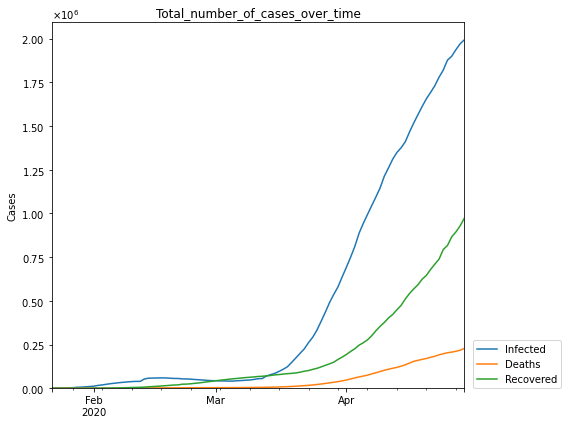

In [42]:
line_plot(total_df[data_cols], "Total_number_of_cases_over_time")

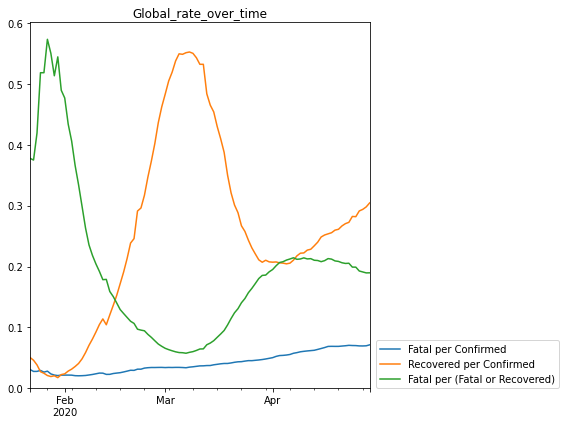

In [43]:
line_plot(total_df[rate_cols], "Global_rate_over_time", ylabel="", math_scale=False)

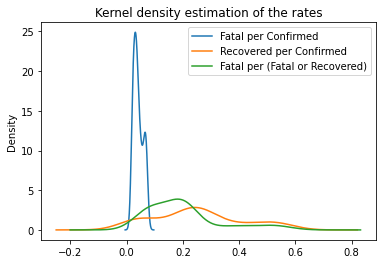

In [44]:
total_df[rate_cols].plot.kde()
plt.title("Kernel density estimation of the rates")
plt.savefig('Kernel density estimation of the rates.png')
plt.show()

In [43]:
total_df[rate_cols].describe().T

count      mean       std       min       25%  \
Fatal per Confirmed              99.0  0.041374  0.016320  0.020408  0.027823   
Recovered per Confirmed          99.0  0.252495  0.156095  0.017365  0.144319   
Fatal per (Fatal or Recovered)   99.0  0.197710  0.128478  0.057464  0.096225   

                                     50%       75%       max  
Fatal per Confirmed             0.036666  0.054245  0.071273  
Recovered per Confirmed         0.239987  0.319089  0.552602  
Fatal per (Fatal or Recovered)  0.189642  0.212389  0.573427

In [44]:
linelist_open_raw = pd.read_csv("./covid dataset/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
linelist_open_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13173 non-null  float64
 1   age                       1349 non-null   object 
 2   sex                       1264 non-null   object 
 3   city                      10194 non-null  object 
 4   province                  12906 non-null  object 
 5   country                   13148 non-null  object 
 6   wuhan(0)_not_wuhan(1)     13170 non-null  float64
 7   latitude                  13147 non-null  float64
 8   longitude                 13147 non-null  float64
 9   geo_resolution            13147 non-null  object 
 10  date_onset_symptoms       746 non-null    object 
 11  date_admission_hospital   730 non-null    object 
 12  date_confirmation         13089 non-null  object 
 13  symptoms                  493 non-null    object 
 14  lives_

In [45]:
df = linelist_open_raw.loc[:, ~linelist_open_raw.columns.str.startswith("Unnamed:")]
df = df.dropna(axis=0, how="all")
df = df.drop(
    [
        # Unnecessary in this notebook
        "ID", "wuhan(0)_not_wuhan(1)", "admin3", "admin2", "admin1", "country_new", "admin_id",
        "data_moderator_initials", "source", "location", "lives_in_Wuhan", "notes_for_discussion",
        "sequence_available", "reported_market_exposure",
        # Maybe useful, but un-used
        "city", "latitude", "longitude", "geo_resolution", "additional_information",
        "travel_history_dates", "travel_history_location", 
    ],
    axis=1
)
# Personal
age = linelist_open_raw["age"].str.split("-", expand=True)
age[0] = pd.to_numeric(age[0], errors="coerce")
age[1] = pd.to_numeric(age[1], errors="coerce")
df["Age"] = age.mean(axis=1)
df["Age"] = df["Age"].fillna(df["Age"].median()).astype(np.int64)
df["Sex"] = df["sex"].fillna("-").str.replace("4000", "-").str.capitalize()
# Place
df["Country"] = df["country"].fillna("-")
df["Province"] = df["province"].fillna("-")
# Onset Date
series = df["date_onset_symptoms"].str.replace("end of December 2019", "31.12.2019").replace("-25.02.2020", "25.02.2020")
series = series.replace("20.02.220", "20.02.2020").replace("none", np.NaN).replace("10.01.2020 - 22.01.2020", np.NaN)
df["Onset_date"] = pd.to_datetime(series)
# Hospitalized date
series = df["date_admission_hospital"].replace("18.01.2020 - 23.01.2020", np.NaN)
df["Hospitalized_date"] = pd.to_datetime(series)
# Confirmed date
series = df["date_confirmation"].replace("25.02.2020-26.02.2020", np.NaN)
df["Confirmed_date"] = pd.to_datetime(series)
# Symptoms/events
df["Symptoms"] = df["symptoms"].fillna("-").str.lower()
# Underlying disease
df["Underlying_disease"] = df[["chronic_disease_binary", "chronic_disease"]].apply(
    lambda x: "No" if x[0] == 0 else x[1] if x[1] is not np.NaN else "-",
    axis=1
).str.strip(";").str.replace("; ", ",").str.replace(", ", ",")
# Outcome
df["Outcome"] = df["outcome"].replace(
    {
        "discharge": "discharged", "Discharged": "discharged", "death": "died",
        "critical condition, intubated as of 14.02.2020": "severe",
        "treated in an intensive care unit (14.02.2020)": "severe", "05.02.2020": "-",
        "Symptoms only improved with cough. Currently hospitalized for follow-up.": "stable"
    }
).fillna("-")
series = df["date_death_or_discharge"].replace("discharge", np.NaN)
df["Closed_date"] = pd.to_datetime(series)
# Show
use_cols = [
    "Age", "Sex", "Country", "Province", "Onset_date", "Hospitalized_date", "Confirmed_date", 
    "Symptoms", "Underlying_disease", "Outcome", "Closed_date"
]
open_linelist_df = df.loc[:, use_cols]
open_linelist_df.head()

Age     Sex Country Province Onset_date Hospitalized_date Confirmed_date  \
0   30    Male   China    Anhui 2020-01-18        2020-01-20     2020-01-22   
1   47    Male   China    Anhui 2020-10-01        2020-01-21     2020-01-23   
2   49    Male   China    Anhui 2020-01-15        2020-01-20     2020-01-23   
3   47  Female   China    Anhui 2020-01-17        2020-01-20     2020-01-23   
4   50  Female   China    Anhui 2020-10-01        2020-01-21     2020-01-23   

  Symptoms Underlying_disease Outcome Closed_date  
0        -                  -       -         NaT  
1        -                  -       -         NaT  
2        -                  -       -         NaT  
3        -                  -       -         NaT  
4        -                  -       -         NaT

In [46]:
linelist_raw = pd.read_csv("./covid dataset/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv")
linelist_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [47]:
linelist_raw.head()

id  case_in_country reporting date  Unnamed: 3  \
0   1              NaN      1/20/2020         NaN   
1   2              NaN      1/20/2020         NaN   
2   3              NaN      1/21/2020         NaN   
3   4              NaN      1/21/2020         NaN   
4   5              NaN      1/21/2020         NaN   

                                             summary             location  \
0  First confirmed imported COVID-19 pneumonia pa...  Shenzhen, Guangdong   
1  First confirmed imported COVID-19 pneumonia pa...             Shanghai   
2  First confirmed imported cases in Zhejiang: pa...             Zhejiang   
3  new confirmed imported COVID-19 pneumonia in T...              Tianjin   
4  new confirmed imported COVID-19 pneumonia in T...              Tianjin   

  country  gender   age symptom_onset  ...  recovered symptom  \
0   China    male  66.0      01/03/20  ...          0     NaN   
1   China  female  56.0     1/15/2020  ...          0     NaN   
2   China    male  46.0      01/04/20  ...          0     NaN   
3   China  female  60.0           NaN  ...          0     NaN   
4   China    male  58.0           NaN  ...          0     NaN   

                                              source  \
0               Shenzhen Municipal Health Commission   
1  Official Weibo of Shanghai Municipal Health Co...   
2             Health Commission of Zhejiang Province   
3                                           人民日报官方微博   
4                                           人民日报官方微博   

                                                link  Unnamed: 21  \
0  http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...          NaN   
1  https://www.weibo.com/2372649470/IqogQhgfa?fro...          NaN   
2  http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...          NaN   
3        https://m.weibo.cn/status/4463235401268457?          NaN   
4        https://m.weibo.cn/status/4463235401268457?          NaN   

   Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  

[5 rows x 27 columns]

In [48]:
df = linelist_raw.loc[:, ~linelist_raw.columns.str.startswith("Unnamed:")]
df = df.drop(["id", "case_in_country", "summary", "source", "link"], axis=1)
# Date
case_date_dict = {
    "reporting date": "Confirmed_date",
    "exposure_start": "Exposed_date",
    "exposure_end": "Quarantined_date",
    "hosp_visit_date": "Hospitalized_date",
    "symptom_onset": "Onset_date",
    "death": "Deaths_date",
    "recovered": "Recovered_date"    
}
df["death"] = df["death"].replace({"0": "", "1": ""})
df["recovered"] = df["recovered"].replace({"0": "", "1": "", "12/30/1899": "12/30/2019"})
for (col, _) in case_date_dict.items():
    df[col] = pd.to_datetime(df[col])
df = df.rename(case_date_dict, axis=1)
# Location
df["Country"] = df["country"].fillna("-")
df["Province"] = df["location"].fillna("-")
df["Province"] = df[["Country", "Province"]].apply(lambda x: "-" if x[0] == x[1] else x[1], axis=1)
# Personal
df["Gender"] = df["gender"].fillna("-").str.capitalize()
df["Age"] = df["age"].fillna(df["age"].median()).astype(np.int64) ## Fill in NA with median
df["From_Wuhan"] = df["from Wuhan"]
df["To_Wuhan"] = df["visiting Wuhan"]
# Medical
df["Events"] = df["symptom"].fillna("-")
# Order of columns
linelist_df = df.loc[
    :,
    [
        "Country", "Province",
        "Exposed_date", "Onset_date", "Hospitalized_date", "Confirmed_date", "Quarantined_date", "Deaths_date", "Recovered_date",
        "Events",
        "Gender", "Age", "From_Wuhan", "To_Wuhan"
    ]
]
linelist_df.tail()


Country   Province Exposed_date Onset_date Hospitalized_date  \
1080      Austria  Innsbruck          NaT        NaT               NaT   
1081  Afghanistan          -          NaT        NaT               NaT   
1082      Algeria          -          NaT        NaT               NaT   
1083      Croatia          -   2020-02-19        NaT               NaT   
1084  Switzerland       Bern   2020-02-15 2020-02-17               NaT   

     Confirmed_date Quarantined_date Deaths_date Recovered_date Events Gender  \
1080     2020-02-25              NaT         NaT            NaT      -      -   
1081     2020-02-24              NaT         NaT            NaT      -      -   
1082     2020-02-26       2020-02-17         NaT            NaT      -   Male   
1083     2020-02-25       2020-02-21         NaT            NaT      -   Male   
1084     2020-02-25       2020-02-15         NaT            NaT      -   Male   

      Age  From_Wuhan  To_Wuhan  
1080   24         0.0         0  
1081   35         0.0         0  
1082   51         0.0         0  
1083   51         0.0         0  
1084   70         0.0         0

In [49]:
linelist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Country            1085 non-null   object        
 1   Province           1085 non-null   object        
 2   Exposed_date       128 non-null    datetime64[ns]
 3   Onset_date         563 non-null    datetime64[ns]
 4   Hospitalized_date  507 non-null    datetime64[ns]
 5   Confirmed_date     1084 non-null   datetime64[ns]
 6   Quarantined_date   341 non-null    datetime64[ns]
 7   Deaths_date        21 non-null     datetime64[ns]
 8   Recovered_date     152 non-null    datetime64[ns]
 9   Events             1085 non-null   object        
 10  Gender             1085 non-null   object        
 11  Age                1085 non-null   int64         
 12  From_Wuhan         1081 non-null   float64       
 13  To_Wuhan           1085 non-null   int64         
dtypes: datet

In [50]:
linelist_df.describe(include="all").fillna("-")

Country Province         Exposed_date           Onset_date  \
count     1085     1085                  128                  563   
unique      38      135                   37                   62   
top      China        -  2020-01-26 00:00:00  2020-01-23 00:00:00   
freq       197      464                   14                   29   
first        -        -  2019-12-17 00:00:00  2019-12-10 00:00:00   
last         -        -  2020-02-21 00:00:00  2020-02-26 00:00:00   
mean         -        -                    -                    -   
std          -        -                    -                    -   
min          -        -                    -                    -   
25%          -        -                    -                    -   
50%          -        -                    -                    -   
75%          -        -                    -                    -   
max          -        -                    -                    -   

          Hospitalized_date       Confirmed_date     Quarantined_date  \
count                   507                 1084                  341   
unique                   58                   43                   50   
top     2020-01-23 00:00:00  2020-02-27 00:00:00  2020-01-22 00:00:00   
freq                     34                   91                   35   
first   2019-12-27 00:00:00  2020-01-13 00:00:00  2020-01-02 00:00:00   
last    2020-02-28 00:00:00  2020-02-28 00:00:00  2020-02-25 00:00:00   
mean                      -                    -                    -   
std                       -                    -                    -   
min                       -                    -                    -   
25%                       -                    -                    -   
50%                       -                    -                    -   
75%                       -                    -                    -   
max                       -                    -                    -   

                Deaths_date       Recovered_date Events Gender      Age  \
count                    21                  152   1085   1085     1085   
unique                   12                   30    109      3        -   
top     2020-02-23 00:00:00  2020-02-19 00:00:00      -   Male        -   
freq                      4                   13    815    520        -   
first   2020-02-01 00:00:00  2019-12-30 00:00:00      -      -        -   
last    2020-02-28 00:00:00  2020-02-28 00:00:00      -      -        -   
mean                      -                    -      -      -  49.8212   
std                       -                    -      -      -  16.1036   
min                       -                    -      -      -        0   
25%                       -                    -      -      -       39   
50%                       -                    -      -      -       51   
75%                       -                    -      -      -       58   
max                       -                    -      -      -       96   

       From_Wuhan  To_Wuhan  
count        1081      1085  
unique          -         -  
top             -         -  
freq            -         -  
first           -         -  
last            -         -  
mean     0.144311  0.176959  
std      0.351567   0.38181  
min             0         0  
25%             0         0  
50%             0         0  
75%             0         0  
max             1         1

In [51]:
period_df = select_area(linelist_df, group=None)
period_df = period_df.loc[:, ["Exposed_date", "Onset_date", "Confirmed_date"]]
period_df["Latent [min]"] = (period_df["Onset_date"] - period_df["Exposed_date"]).dt.total_seconds() / 60
period_df["Waiting [min]"] = (period_df["Confirmed_date"] - period_df["Onset_date"]).dt.total_seconds() / 60
period_df["Latent [day]"] = period_df["Latent [min]"] / 60 / 24
period_df["Waiting [day]"] = period_df["Waiting [min]"] / 60 / 24
period_df["Latent + Waiting [day]"] = period_df["Latent [day]"] + period_df["Waiting [day]"]
period_df.dropna(axis=0).tail()

Exposed_date Onset_date Confirmed_date  Latent [min]  Waiting [min]  \
948    2020-01-25 2020-02-24     2020-02-24       43200.0            0.0   
949    2020-01-25 2020-02-04     2020-02-24       14400.0        28800.0   
957    2020-01-25 2020-02-12     2020-02-26       25920.0        20160.0   
958    2020-01-25 2020-02-17     2020-02-26       33120.0        12960.0   
1084   2020-02-15 2020-02-17     2020-02-25        2880.0        11520.0   

      Latent [day]  Waiting [day]  Latent + Waiting [day]  
948           30.0            0.0                    30.0  
949           10.0           20.0                    30.0  
957           18.0           14.0                    32.0  
958           23.0            9.0                    32.0  
1084           2.0            8.0                    10.0

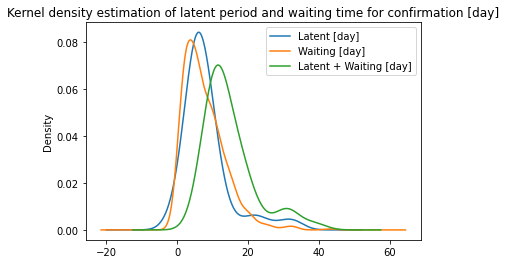

count       mean       std  min   25%   50%   75%  \
Latent [day]             83.0   8.180723  6.786185 -2.0   4.0   6.0   9.0   
Waiting [day]           563.0   7.682060  5.890473  0.0   3.0   6.0  11.0   
Latent + Waiting [day]   83.0  14.819277  7.305435  5.0  10.0  13.0  17.5   

                         max  
Latent [day]            34.0  
Waiting [day]           43.0  
Latent + Waiting [day]  40.0

In [53]:
cols = ["Latent [day]", "Waiting [day]", "Latent + Waiting [day]"]
period_df[cols].plot.kde()
plt.title("Kernel density estimation of latent period and waiting time for confirmation [day]")
plt.savefig('Kde_latent_period_waiting_confirmation.png')
plt.show()
period_df[cols].describe().T

# Measures in each country

In [52]:
action_raw = dd.read_csv(
    "./covid dataset/covid19-containment-and-mitigation-measures/COVID 19 Containment measures data.csv"
).compute()
action_raw.head()

ID Applies To         Country    Date Start Date end intended  \
0  163        NaN         Austria  Mar 16, 2020               NaN   
1  132        NaN         Germany  Feb 01, 2020               NaN   
2  578        NaN  United Kingdom  Mar 20, 2020               NaN   
3  372        NaN  United Kingdom  Mar 16, 2020               NaN   
4  357        NaN  United Kingdom  Mar 16, 2020               NaN   

                  Description of measure implemented Exceptions  \
0  On 10 March 2020 government announced that all...        NaN   
1  102 German citizens and 26 relatives, all of w...        NaN   
2        All schools, nurseries and colleges closed.        NaN   
3  If one person in any household has a persisten...        NaN   
4  By the weekend, those with the most serious he...        NaN   

  Implementing City Implementing State/Province  \
0               NaN                         NaN   
1               NaN                         NaN   
2               NaN                         NaN   
3               NaN                         NaN   
4               NaN                         NaN   

                                            Keywords  Quantity  \
0                                 university closure       NaN   
1  international traveller quarantine - risk coun...    0.0001   
2  nursery school closure, school closure, univer...       NaN   
3                       blanket isolation - symptoms       NaN   
4                        isolation advice to elderly       NaN   

                                              Source Target city  \
0  https://en.wikipedia.org/wiki/2020_coronavirus...         NaN   
1  https://www.tagesschau.de/inland/coronavirus-g...         NaN   
2  https://www.theguardian.com/world/2020/mar/18/...         NaN   
3               https://www.bbc.com/news/uk-51920444         NaN   
4               https://www.bbc.com/news/uk-51920444         NaN   

  Target country Target region  Target state  
0            NaN           NaN           NaN  
1            NaN           NaN           NaN  
2            NaN           NaN           NaN  
3            NaN           NaN           NaN  
4            NaN           NaN           NaN

In [53]:
df  = action_raw.copy()
df = df.rename(
    {
        "Description of measure implemented": "Details",
        "Implementing State/Province": "Province",
    },
    axis=1
)
# Country/Province
df["Country"] = df["Country"].replace({"United Kingdom": "UK"})
df["Country"] = df["Country"].str.replace("US: ", "US/").str.replace("US:", "US/")
df = df.loc[~df["Country"].isnull(), :]
df["Province"] = df["Province"].fillna("-")
df[["Country", "Province", "-"]] = (df["Country"] + "/" + df["Province"]).str.split("/", expand=True)
# Date
df["Start_date"] = pd.to_datetime(df["Date Start"])
df["End_date"] = pd.to_datetime(df["Date end intended"])
df = df.loc[~df["Start_date"].isnull(), :]
# Detail
df = df.loc[~df["Details"].isnull(), :]
df["Keywords"] = df["Keywords"].fillna("-")
df["Exceptions"] = df["Exceptions"].fillna("-")
# _df = df["Keywords"].str.split(", ", expand=True)
# df = pd.concat([df, _df], axis=1)
# Save
df = df.loc[:, ["Country", "Province", "Start_date", "End_date", "Keywords", "Details", "Exceptions"]]
df = df.sort_values(["Start_date", "End_date", "Country", "Province"])
action_df = df.copy()
action_df.head()

Country Province Start_date End_date  \
150      China    Hubei 2019-12-18      NaT   
151      China    Hubei 2019-12-25      NaT   
152      China    Hubei 2019-12-30      NaT   
138  Hong Kong        - 2019-12-30      NaT   
149      Macau        - 2019-12-30      NaT   

                                              Keywords  \
150                                         first case   
151     compulsory isolation, confirmed case isolation   
152           case reporting, research, source tracing   
138  international traveller quarantine - risk coun...   
149  international traveller screening - all countries   

                                               Details Exceptions  
150        Seven cases of COVID-19 documented in Wuhan          -  
151  Medical staff in two Wuhan hospitals were susp...          -  
152  Wuhan CDC confirmed 27 cases of viral pneumoni...          -  
138  Hong Kong Secretary for Food and Health announ...          -  
149              Tightened inbound traveller screening          -

In [54]:
words = pd.Series(", ".join(action_df["Keywords"].tolist()).split(", ")).unique().tolist()
words

['first case',
 'compulsory isolation',
 'confirmed case isolation',
 'case reporting',
 'research',
 'source tracing',
 'international traveller quarantine - risk countries',
 'international traveller screening - all countries',
 'coronavirus education activities',
 'encouraging symptomatic people to seek tests',
 'international traveller screening - risk countries',
 'limited nonessential business suspension',
 'test travellers',
 'contacts traced total',
 'outbound travel warning',
 'public announcement',
 'special management arrangements',
 'task group',
 'hospital specialisation',
 'contact isolation - no symptoms',
 'contact tracing',
 'public mask and hygiene supply',
 'testing commenced',
 'international travel ban - risk countries',
 'international traveller screening - symptomatic',
 'general nonessential business suspension',
 'hygiene enforcement',
 'quarantine zone',
 'cluster isolation - no symptoms',
 'traveller testing',
 'wild animal ban',
 'phone line',
 'moves of med

In [55]:
vectorizer = TfidfVectorizer(use_idf=True)
vecs = vectorizer.fit_transform(words)
clusters = KMeans(n_clusters=10, random_state=0).fit_predict(vecs)
df = pd.DataFrame(
    {
        "Group": clusters,
        "Word": words
    }
)
df = df.sort_values("Group")
df = pd.DataFrame(df.groupby("Group")["Word"].apply(lambda x: ", ".join(x)))

In [56]:
df

Word
Group                                                   
0      sentence, symptom hotline, protective equipmen...
1      test cohorts, test travellers, test symptomati...
2      end of testing, testing criteria tightened, te...
3      blanket isolation - no symptoms, social isolat...
4      quarantine zone, domestic travel limitation, d...
5      remote cultural content, remote work, remote w...
6      closure nonessential stores, airport closure, ...
7      case reporting, confirmed case isolation, loca...
8      increase hospital capacity, hospital construct...
9      international travel ban - risk countries, int...

In [57]:
print(df.Word.loc[9])

international travel ban - risk countries, international aid, international travel ban - all countries, international traveller screening - risk countries, international traveller screening - all countries, international traveller quarantine - all countries, international traveller quarantine - risk countries, international traveller screening - symptomatic


# Grouping by growth factor
The number of confirmed cases is increasing in many countries, but there are two of countries. In a first-type country, growth factor is larger than 1 and the number of cases is rapidly increasing. In a second-type country, growth factor is less than 1.

# Calculate growth factor
Where  𝐶  is the number of confirmed cases,
Growth Factor=ΔC𝑛ΔC𝑛−1

In [63]:
df = ncov_df_ungrouped.pivot_table(
    index="Date", columns="Country", values="Confirmed", aggfunc="sum"
).fillna(method="ffill").fillna(0)
# Growth factor: (delta Number_n) / (delta Number_n)
df = df.diff() / df.diff().shift(freq="D")
df = df.replace(np.inf, np.nan).fillna(1.0)
# Rolling mean (window: 7 days)
df = df.rolling(7).mean().dropna().loc[:ncov_df_ungrouped["Date"].max(), :]
# round: 0.01
growth_value_df = df.round(2)
growth_value_df.tail()

Country      Azerbaijan  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                                      
2020-04-24          1.0         1.23     1.05     0.98     0.56    0.71   
2020-04-25          1.0         1.39     1.32     1.02     0.63    0.71   
2020-04-26          1.0         1.15     1.15     1.04     0.47    0.86   
2020-04-27          1.0         1.44     1.03     1.06     0.55    0.86   
2020-04-28          1.0         1.23     1.07     1.05     0.55    0.71   

Country     Antigua and Barbuda  Argentina  Armenia  Aruba  ...  Uzbekistan  \
Date                                                        ...               
2020-04-24                 0.86       1.20     1.11    1.0  ...        1.00   
2020-04-25                 0.86       1.21     1.11    1.0  ...        0.96   
2020-04-26                 0.86       1.17     1.10    1.0  ...        0.85   
2020-04-27                 0.86       1.14     1.07    1.0  ...        1.45   
2020-04-28                 0.86       1.17     1.02    1.0  ...        1.48   

Country     Vatican City  Venezuela  Vietnam  West Bank and Gaza  \
Date                                                               
2020-04-24           1.0       1.62     1.00                0.81   
2020-04-25           1.0       1.58     0.86               -4.34   
2020-04-26           1.0       1.46     0.86               -4.51   
2020-04-27           1.0       1.74     0.86               -4.46   
2020-04-28           1.0       1.60     0.86               -4.52   

Country     Western Sahara  Yemen  Zambia  Zimbabwe  \
Date                                                  
2020-04-24             1.0    1.0    1.37      0.71   
2020-04-25             1.0    1.0    1.19      0.86   
2020-04-26             1.0    1.0    1.22      0.86   
2020-04-27             1.0    1.0    1.08      0.86   
2020-04-28             1.0    1.0    1.04      0.71   

Country     occupied Palestinian territory  
Date                                        
2020-04-24                             1.0  
2020-04-25                             1.0  
2020-04-26                             1.0  
2020-04-27                             1.0  
2020-04-28                             1.0  

[5 rows x 216 columns]

# Grouping countires based on growth factor
* Outbreaking: growth factor  >  1 for the last 7 days
* Stopping: growth factor  <  1 for the last 7 days
* At a crossroad: the others

In [64]:
df = growth_value_df.copy()
df = df.iloc[-7:, :].T
day_cols = df.columns.strftime("%d%b%Y")
df.columns = day_cols
last_date = day_cols[-1]
# Grouping
more_col, less_col = "GF > 1 [straight days]", "GF < 1 [straight days]"
df[more_col] = (growth_value_df > 1).iloc[::-1].cumprod().sum(axis=0)
df[less_col] = (growth_value_df < 1).iloc[::-1].cumprod().sum(axis=0)
df["Group"] = df[[more_col, less_col]].apply(
    lambda x: "Outbreaking" if x[0] >= 7 else "Stopping" if x[1] >= 7 else "Crossroad",
    axis=1
)
# Sorting
df = df.loc[:, ["Group", more_col, less_col, *day_cols]]
df = df.sort_values(["Group", more_col, less_col], ascending=False)
growth_df = df.copy()
growth_df.head()

Date                  Group  GF > 1 [straight days]  GF < 1 [straight days]  \
Country                                                                       
Chad               Stopping                       0                      34   
Equatorial Guinea  Stopping                       0                      34   
Nicaragua          Stopping                       0                      34   
Syria              Stopping                       0                      34   
Zimbabwe           Stopping                       0                      32   

Date               22Apr2020  23Apr2020  24Apr2020  25Apr2020  26Apr2020  \
Country                                                                    
Chad                    0.71       0.71       0.86       0.84       0.84   
Equatorial Guinea       0.61       0.61       0.61       0.66       0.51   
Nicaragua               0.86       0.86       0.71       0.71       0.71   
Syria                   0.43       0.57       0.57       0.71       0.71   
Zimbabwe                0.57       0.71       0.71       0.86       0.86   

Date               27Apr2020  28Apr2020  
Country                                  
Chad                    0.84       0.84  
Equatorial Guinea       0.51       0.51  
Nicaragua               0.71       0.71  
Syria                   0.71       0.71  
Zimbabwe                0.86       0.71

In [65]:
df = pd.merge(ncov_df_ungrouped, growth_df["Group"].reset_index(), on="Country")
ncov_df = df.loc[:, ["Date", "Group", *ncov_df_ungrouped.columns[1:]]]
ncov_df.tail()

Date      Group Country Province  Confirmed  Infected  Deaths  \
19923 2020-04-25  Crossroad   Yemen        -          1         0       0   
19924 2020-04-26  Crossroad   Yemen        -          1         0       0   
19925 2020-04-27  Crossroad   Yemen        -          1         0       0   
19926 2020-04-28  Crossroad   Yemen        -          1         0       0   
19927 2020-04-29  Crossroad   Yemen        -          6         5       0   

       Recovered  
19923          1  
19924          1  
19925          1  
19926          1  
19927          1

## Group 1: Outbreaking, growth factor  >  1 for the last 7 days

In [61]:
df = growth_df.loc[growth_df["Group"] == "Outbreaking", :]
", ".join(df.index.tolist()) + "."

'Mexico, Bahrain, Bulgaria, Estonia, Guatemala, Honduras, India, Latvia, Peru, Qatar, Russia, Senegal, Afghanistan, Brazil, Kenya, Saudi Arabia, Bangladesh, Armenia, Mali, Albania, Burma, Congo, Ecuador, Dominican Republic, Egypt, El Salvador, South Africa, Montenegro, Pakistan, Rwanda, Cabo Verde, Luxembourg, Norway, Kuwait, Jordan, Sierra Leone, Maldives, Azerbaijan, Mozambique, Gabon, Jamaica, Malta, Costa Rica, Greece, Indonesia, Ukraine, Chile, Israel, Malawi, Moldova, North Macedonia, Sri Lanka, Uganda.'

In [62]:
growth_df.loc[growth_df["Group"] == "Outbreaking", :].head()

Date             Group  GF > 1 [straight days]  GF < 1 [straight days]  \
Country                                                                  
Mexico     Outbreaking                      40                       0   
Bahrain    Outbreaking                      34                       0   
Bulgaria   Outbreaking                      34                       0   
Estonia    Outbreaking                      34                       0   
Guatemala  Outbreaking                      34                       0   

Date       22Apr2020  23Apr2020  24Apr2020  25Apr2020  26Apr2020  27Apr2020  \
Country                                                                       
Mexico          1.12       1.37       1.31       1.24       1.21       1.18   
Bahrain         1.33       1.80       1.83       1.74       1.40       1.55   
Bulgaria        1.17       1.16       1.30       1.22       1.73       1.59   
Estonia         1.10       1.59       1.54       1.57       1.57       1.57   
Guatemala       1.51       1.78       1.71       1.68       1.62       1.57   

Date       28Apr2020  
Country               
Mexico          1.29  
Bahrain         1.35  
Bulgaria        1.48  
Estonia         1.69  
Guatemala       1.55

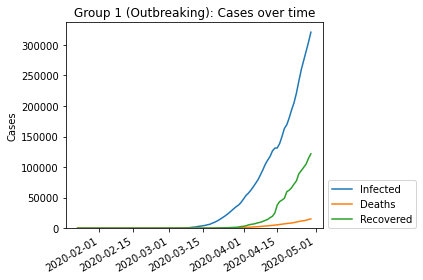

Infected  Deaths  Recovered
Date                                   
2020-04-25    259161   11705      94134
2020-04-26    274216   12236      99508
2020-04-27    289173   13010     104791
2020-04-28    303946   14174     114122
2020-04-29    320659   15194     121664

In [78]:
df = ncov_df.loc[ncov_df["Group"] == "Outbreaking", ["Date", *data_cols]].groupby("Date").sum()
line_plot(df, "Group 1 (Outbreaking): Cases over time", y_integer=True)
df.tail()

## Group 2: Stopping, growth factor  <  1 for the last 7 days

In [65]:
df = growth_df.loc[growth_df["Group"] == "Stopping", :]
", ".join(df.index.tolist()) + "."

'Chad, Equatorial Guinea, Nicaragua, Syria, Zimbabwe, Botswana, Trinidad and Tobago, Cameroon, Andorra, Hong Kong, Nepal, Central African Republic, Iran, Papua New Guinea, Angola, Ghana, West Bank and Gaza, Liberia, Liechtenstein, Benin, Libya, Bhutan, Turkey.'

In [66]:
growth_df.loc[growth_df["Group"] == "Stopping", :].head()

Date                  Group  GF > 1 [straight days]  GF < 1 [straight days]  \
Country                                                                       
Chad               Stopping                       0                      34   
Equatorial Guinea  Stopping                       0                      34   
Nicaragua          Stopping                       0                      34   
Syria              Stopping                       0                      34   
Zimbabwe           Stopping                       0                      32   

Date               22Apr2020  23Apr2020  24Apr2020  25Apr2020  26Apr2020  \
Country                                                                    
Chad                    0.71       0.71       0.86       0.84       0.84   
Equatorial Guinea       0.61       0.61       0.61       0.66       0.51   
Nicaragua               0.86       0.86       0.71       0.71       0.71   
Syria                   0.43       0.57       0.57       0.71       0.71   
Zimbabwe                0.57       0.71       0.71       0.86       0.86   

Date               27Apr2020  28Apr2020  
Country                                  
Chad                    0.84       0.84  
Equatorial Guinea       0.51       0.51  
Nicaragua               0.71       0.71  
Syria                   0.71       0.71  
Zimbabwe                0.86       0.71

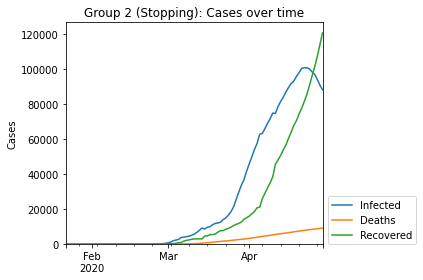

Infected  Deaths  Recovered
Date                                   
2020-04-25     98414    8502      96046
2020-04-26     97000    8666     101204
2020-04-27     94005    8859     107220
2020-04-28     90851    9034     113939
2020-04-29     88154    9207     120603

In [81]:
df = ncov_df.loc[ncov_df["Group"] == "Stopping", ["Date", *data_cols]].groupby("Date").sum()
line_plot(df, "Group 2 (Stopping): Cases over time", y_integer=True)
df.tail()

## Group 3: At a crossroad, the others

In [66]:
df = growth_df.loc[growth_df["Group"] == "Crossroad", :]
", ".join(df.index.tolist()) + "."

'Argentina, Bolivia, Philippines, Uruguay, Venezuela, Cyprus, Eswatini, Georgia, Thailand, Zambia, Algeria, Austria, Bahamas, Bosnia and Herzegovina, Canada, Denmark, Ethiopia, Iraq, Slovenia, Ireland, Niger, Romania, South Korea, China, Colombia, France, Guinea-Bissau, Japan, Madagascar, Tunisia, Uzbekistan, Australia, Belarus, Cuba, Djibouti, Germany, Kazakhstan, Lebanon, Morocco, Nigeria, Oman, Poland, Portugal, Sweden, Switzerland, United Arab Emirates, Antigua and Barbuda, Burundi, Grenada, Netherlands, Paraguay, Saint Vincent and the Grenadines, Somalia, South Sudan, Tanzania, Italy, Ivory Coast, Lithuania, Mongolia, Sudan, Timor-Leste, UK, Vietnam, Belgium, Czech Republic, Guinea, New Zealand, Taiwan, Haiti, Singapore, Togo, US, Barbados, Burkina Faso, Finland, Hungary, Iceland, Kyrgyzstan, Malaysia, Monaco, Panama, San Marino, Slovakia, Spain,  Azerbaijan, Aruba, Bahamas, The, Belize, Brunei, Cambodia, Cape Verde, Cayman Islands, Channel Islands, Croatia, Curacao, Dominica, Eas

In [67]:
growth_df.loc[growth_df["Group"] == "Crossroad", :].head()

Date             Group  GF > 1 [straight days]  GF < 1 [straight days]  \
Country                                                                  
Argentina    Crossroad                       6                       0   
Bolivia      Crossroad                       6                       0   
Philippines  Crossroad                       6                       0   
Uruguay      Crossroad                       6                       0   
Venezuela    Crossroad                       6                       0   

Date         22Apr2020  23Apr2020  24Apr2020  25Apr2020  26Apr2020  27Apr2020  \
Country                                                                         
Argentina         0.96       1.22       1.20       1.21       1.17       1.14   
Bolivia           0.92       1.99       2.07       1.99       2.05       1.93   
Philippines       0.91       1.13       1.09       1.03       1.31       1.24   
Uruguay           0.94       1.04       1.10       1.74       1.57       1.48   
Venezuela         0.61       1.58       1.62       1.58       1.46       1.74   

Date         28Apr2020  
Country                 
Argentina         1.17  
Bolivia           1.82  
Philippines       1.27  
Uruguay           1.53  
Venezuela         1.60

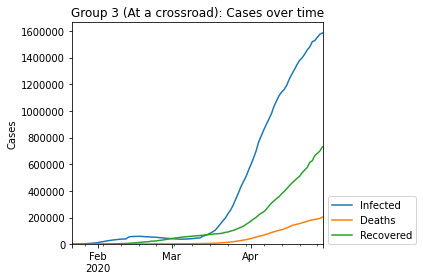

Infected  Deaths  Recovered
Date                                   
2020-04-25   1519640  182639     626505
2020-04-26   1527982  185642     665021
2020-04-27   1553452  189298     681956
2020-04-28   1575790  193945     700597
2020-04-29   1584716  203237     730452

In [86]:
df = ncov_df.loc[ncov_df["Group"] == "Crossroad", ["Date", *data_cols]].groupby("Date").sum()
line_plot(df, "Group 3 (At a crossroad): Cases over time", y_integer=True)
df.tail()

# Example of non-dimensional SIR model
For example, set  𝑅0=2.5,𝜌=0.2  and initial values  (𝑥(0),𝑦(0),𝑧(0))=(0.999,0.001,0) . SIR class was defined in "Preparation" section

In [69]:
eg_r0, eg_rho = (2.5, 0.2)
eg_sigma = eg_rho / eg_r0
eg_initials = (0.999, 0.001, 0)
display(Markdown(rf"$\rho = {eg_rho},\ \sigma = {eg_sigma}$."))

$\rho = 0.2,\ \sigma = 0.08$.

In [70]:
%%time
eg_df = simulation(SIR, eg_initials, step_n=180, rho=eg_rho, sigma=eg_sigma)
eg_df.tail()

CPU times: user 7.56 ms, sys: 0 ns, total: 7.56 ms
Wall time: 6.46 ms


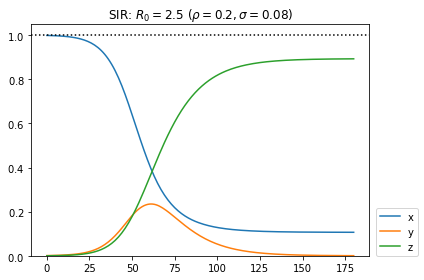

In [89]:
line_plot(
    eg_df.set_index("t"),
    title=r"SIR: $R_0={0}\ (\rho={1}, \sigma={2})$".format(eg_r0, eg_rho, eg_sigma),
    ylabel="",
    h=1
)

There is an inflection point of y (the number of currentry infected cases per total population). At this point, value of x (the number of susceptible cases per total population) is nearly equal to  1

In [71]:
x_max = eg_df.loc[eg_df["y"].idxmax(), "x"]
(x_max, 1/eg_r0)

(0.39661788452227087, 0.4)

### Dimensionalization
Here, we will dimensionalize the data, assuming that start date is the first date of JHU dataset,  𝜏=1440  [min] and total population  𝑁=1,000,000 .

In [72]:
eg_tau = 1440
eg_start_date = ncov_df["Date"].min()
eg_total_population = 1_000_000
print(f"The start date is {eg_start_date.strftime('%d%b%Y')}.")

The start date is 22Jan2020.


In [73]:
eg_ori_df = pd.DataFrame(
    {
        "Date": (eg_df["t"] * eg_tau).apply(lambda x: timedelta(minutes=x)) + eg_start_date,
        "Group": "Stopping",
        "Country": "Example",
        "Province": "-",
        "Susceptible": 0,
        "Confirmed": 0,
        "Infected": (eg_df["y"] * eg_total_population).astype(np.int64)
    }
)
eg_ori_df["Recovered + Deaths"] = (eg_df["z"] * eg_total_population).astype(np.int64)
eg_ori_df ["Confirmed"] = eg_ori_df[["Infected", "Recovered + Deaths"]].sum(axis=1)
eg_ori_df["Susceptible"] = eg_total_population - eg_ori_df["Confirmed"]
eg_ori_df.tail()

Date     Group  Country Province  Susceptible  Confirmed  Infected  \
176 2020-07-16  Stopping  Example        -       106640     893360       658   
177 2020-07-17  Stopping  Example        -       106627     893373       620   
178 2020-07-18  Stopping  Example        -       106614     893386       585   
179 2020-07-19  Stopping  Example        -       106601     893399       552   
180 2020-07-20  Stopping  Example        -       106591     893409       520   

     Recovered + Deaths  
176              892702  
177              892753  
178              892801  
179              892847  
180              892889

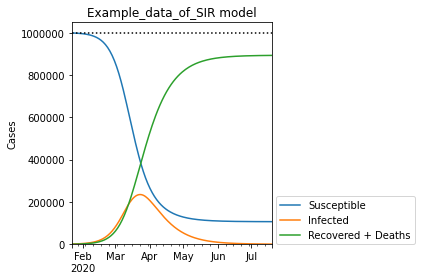

In [93]:
line_plot(
    eg_ori_df.set_index("Date")[["Susceptible", "Infected", "Recovered + Deaths"]],
    "Example_data_of_SIR model",
    h=eg_total_population,
    y_integer=True
)

# SIR-D model

In [74]:
eg_r0, eg_kappa, eg_rho = (2.5, 0.005, 0.2)
eg_sigma = eg_rho / eg_r0 - eg_kappa
eg_initials = (0.999, 0.001, 0, 0)
display(Markdown(rf"$\kappa = {eg_kappa},\ \rho = {eg_rho},\ \sigma = {eg_sigma}$."))

$\kappa = 0.005,\ \rho = 0.2,\ \sigma = 0.075$.

In [75]:
%%time
eg_df = simulation(SIRD, eg_initials, step_n=180, kappa=eg_kappa, rho=eg_rho, sigma=eg_sigma)
eg_df.tail()

CPU times: user 7.99 ms, sys: 0 ns, total: 7.99 ms
Wall time: 6.89 ms


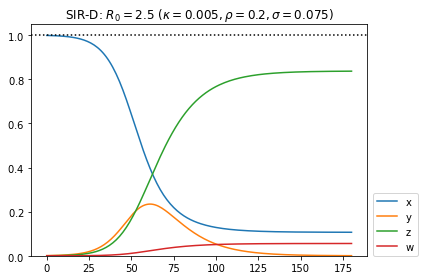

In [96]:
line_plot(
    eg_df.set_index("t"),
    title=r"SIR-D: $R_0={0}\ (\kappa={1}, \rho={2}, \sigma={3})$".format(eg_r0, eg_kappa, eg_rho, eg_sigma),
    ylabel="",
    h=1
)

There is an inflection point of y (the number of currentry infected cases per total population). At this point, value of x (the number of susceptible cases per total population) is nearly equal to  1𝑅0 .

In [76]:
x_max = eg_df.loc[eg_df["y"].idxmax(), "x"]
(x_max, 1/eg_r0)

(0.39683686426375786, 0.4)

### Dimensionalization
Here, we will dimensionalize the data, assuming that start date is the first date of JHU dataset,  𝜏=1440  [min] and total population  𝑁=1,000,000 

In [77]:
eg_tau = 1440
eg_start_date = ncov_df["Date"].min()
eg_total_population = 1_000_000
print(f"The start date is {eg_start_date.strftime('%d%b%Y')}.")

The start date is 22Jan2020.


In [78]:
eg_ori_df = pd.DataFrame(
    {
        "Date": (eg_df["t"] * eg_tau).apply(lambda x: timedelta(minutes=x)) + eg_start_date,
        "Group": "Stopping",
        "Country": "Example",
        "Province": "-",
        "Susceptible": 0,
        "Confirmed": 0,
        "Infected": (eg_df["y"] * eg_total_population).astype(np.int64)
    }
)
eg_ori_df["Recovered"] = (eg_df["z"] * eg_total_population).astype(np.int64)
eg_ori_df["Deaths"] = (eg_df["w"] * eg_total_population).astype(np.int64)
eg_ori_df["Confirmed"] = eg_ori_df[["Infected", "Recovered", "Deaths"]].sum(axis=1)
eg_ori_df["Susceptible"] = eg_total_population - eg_ori_df["Confirmed"]
eg_ori_df.tail()

Date     Group  Country Province  Susceptible  Confirmed  Infected  \
176 2020-07-16  Stopping  Example        -       106751     893249       660   
177 2020-07-17  Stopping  Example        -       106737     893263       622   
178 2020-07-18  Stopping  Example        -       106724     893276       587   
179 2020-07-19  Stopping  Example        -       106713     893287       553   
180 2020-07-20  Stopping  Example        -       106701     893299       522   

     Recovered  Deaths  
176     836803   55786  
177     836851   55790  
178     836896   55793  
179     836939   55795  
180     836979   55798

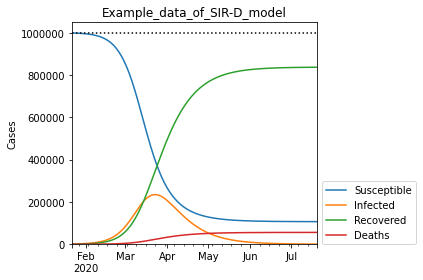

In [100]:
line_plot(
    eg_ori_df.set_index("Date")[["Susceptible", "Infected", "Recovered", "Deaths"]],
    "Example_data_of_SIR-D_model",
    h=eg_total_population,
    y_integer=True
)

# SIR-F model

In [79]:
eg_r0, eg_theta, eg_kappa, eg_rho = (2.5, 0.002, 0.005, 0.2)
eg_sigma = eg_rho / eg_r0 - eg_kappa
eg_initials = (0.999, 0.001, 0, 0)
display(Markdown(rf"$\theta = {eg_theta},\ \kappa = {eg_kappa},\ \rho = {eg_rho},\ \sigma = {eg_sigma}$."))

$\theta = 0.002,\ \kappa = 0.005,\ \rho = 0.2,\ \sigma = 0.075$.

In [80]:
%%time
eg_df = simulation(SIRF, eg_initials, step_n=180, theta=eg_theta, kappa=eg_kappa, rho=eg_rho, sigma=eg_sigma)
eg_df.tail()

CPU times: user 5.39 ms, sys: 3.18 ms, total: 8.57 ms
Wall time: 8.95 ms


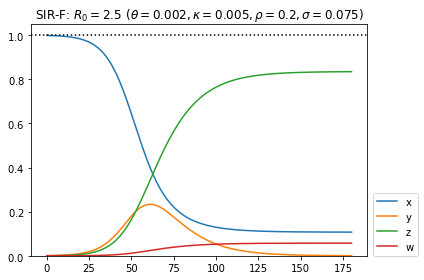

In [103]:
line_plot(
    eg_df.set_index("t"),
    title=r"SIR-F: $R_0={0}\ (\theta={1}, \kappa={2}, \rho={3}, \sigma={4})$".format(
        eg_r0, eg_theta, eg_kappa, eg_rho, eg_sigma
    ),
    ylabel="",
    h=1
)

In [81]:
x_max = eg_df.loc[eg_df["y"].idxmax(), "x"]
(x_max, 1/eg_r0)

(0.40047837663671526, 0.4)

### Dimensionalization
Here, we will dimensionalize the data, assuming that start date is the first date of JHU dataset,  𝜏=1440  [min] and total population  𝑁=1,000,000 .

In [82]:
eg_tau = 1440
eg_start_date = ncov_df["Date"].min()
eg_total_population = 1_000_000
print(f"The start date is {eg_start_date.strftime('%d%b%Y')}.")

The start date is 22Jan2020.


In [83]:
eg_ori_df = pd.DataFrame(
    {
        "Date": (eg_df["t"] * eg_tau).apply(lambda x: timedelta(minutes=x)) + eg_start_date,
        "Group": "Stopping",
        "Country": "Example",
        "Province": "-",
        "Susceptible": 0,
        "Confirmed": 0,
        "Infected": (eg_df["y"] * eg_total_population).astype(np.int64)
    }
)
eg_ori_df["Recovered"] = (eg_df["z"] * eg_total_population).astype(np.int64)
eg_ori_df["Fatal"] = (eg_df["w"] * eg_total_population).astype(np.int64)
eg_ori_df["Confirmed"] = eg_ori_df[["Infected", "Recovered", "Fatal"]].sum(axis=1)
eg_ori_df["Susceptible"] = eg_total_population - eg_ori_df["Confirmed"]
eg_ori_df.tail()

Date     Group  Country Province  Susceptible  Confirmed  Infected  \
176 2020-07-16  Stopping  Example        -       107393     892607       670   
177 2020-07-17  Stopping  Example        -       107378     892622       632   
178 2020-07-18  Stopping  Example        -       107365     892635       596   
179 2020-07-19  Stopping  Example        -       107353     892647       562   
180 2020-07-20  Stopping  Example        -       107342     892658       530   

     Recovered  Fatal  
176     834520  57417  
177     834569  57421  
178     834615  57424  
179     834658  57427  
180     834699  57429

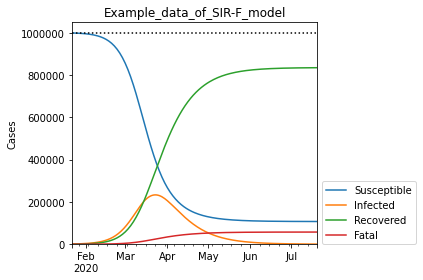

In [107]:
line_plot(
    eg_ori_df.set_index("Date")[["Susceptible", "Infected", "Recovered", "Fatal"]],
    "Example_data_of_SIR-F_model",
    h=eg_total_population,
    y_integer=True
)

# Hyperparameter optimization
In the previous paragraphs figures, we calculated the number of cases based on hypothesized parameter values. However, we do not know parameter values of the actual data. Here, we will estimate the ( 𝜃,𝜅,𝜌,𝜎 ) values of the example data using hyperparameter optimization method by Optuna package.  𝜏  will be fixed as 1440 [min]. Estimator class was defined in "Preparation" section.

In [84]:
%%time
sirf_estimator = Estimator(
    # We can replace SIRF with SIR or SIRD
    SIRF, eg_ori_df, eg_total_population,
    name="Example", places=[("Example", None)],
    tau=eg_tau
)
sirf_dict = sirf_estimator.run(500)

CPU times: user 52.9 s, sys: 1.87 s, total: 54.8 s
Wall time: 51.7 s


In [85]:
pd.DataFrame.from_dict({"SIR-F": sirf_dict}, orient="index").fillna("-")

theta     kappa       rho     sigma   tau    R0     score  \
SIR-F  0.028431  0.002413  0.203999  0.077044  1440  2.49  0.134556   

       alpha1 [-]  1/alpha2 [day]  1/beta [day]  1/gamma [day]  
SIR-F       0.028             414             4             12

/home/mitodrun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:175: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


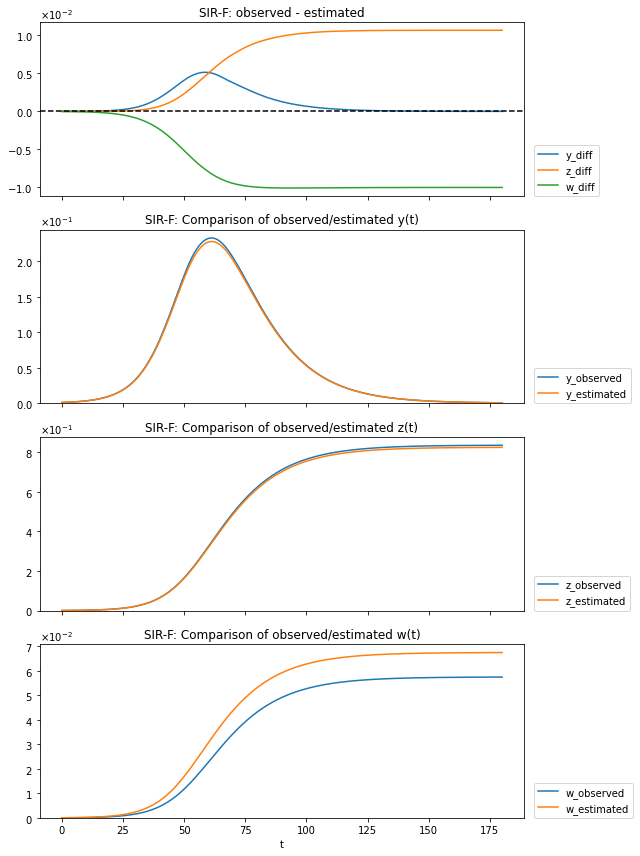

In [113]:
sirf_estimator.compare_graph()

With the estimated the parameters, we can predict the number of cases. Vertical broken line indicates today.

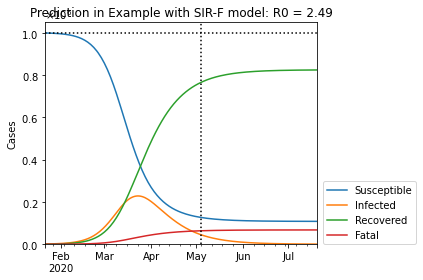

In [114]:
from datetime import datetime
sirf_estimator.predict_graph(step_n=180)

# SIR-F with exposed/waiting cases
The number of exposed cases in latent period (E) and wating cases for confirmation (W) are un-measurable variables, but key variables as well as S, I, R, F. If E and W are large, outbreak will occur in the near future. 

In [86]:
period_df = select_area(linelist_df, group=None)
period_df = period_df.loc[:, ["Exposed_date", "Onset_date", "Confirmed_date"]]
period_df["Latent [min]"] = (period_df["Onset_date"] - period_df["Exposed_date"]).dt.total_seconds() / 60
period_df["Waiting [min]"] = (period_df["Confirmed_date"] - period_df["Onset_date"]).dt.total_seconds() / 60
period_df["Latent [day]"] = period_df["Latent [min]"] / 60 / 24
period_df["Waiting [day]"] = period_df["Waiting [min]"] / 60 / 24
period_df["Latent + Waiting [day]"] = period_df["Latent [day]"] + period_df["Waiting [day]"]
period_df.dropna(axis=0).tail()

Exposed_date Onset_date Confirmed_date  Latent [min]  Waiting [min]  \
948    2020-01-25 2020-02-24     2020-02-24       43200.0            0.0   
949    2020-01-25 2020-02-04     2020-02-24       14400.0        28800.0   
957    2020-01-25 2020-02-12     2020-02-26       25920.0        20160.0   
958    2020-01-25 2020-02-17     2020-02-26       33120.0        12960.0   
1084   2020-02-15 2020-02-17     2020-02-25        2880.0        11520.0   

      Latent [day]  Waiting [day]  Latent + Waiting [day]  
948           30.0            0.0                    30.0  
949           10.0           20.0                    30.0  
957           18.0           14.0                    32.0  
958           23.0            9.0                    32.0  
1084           2.0            8.0                    10.0

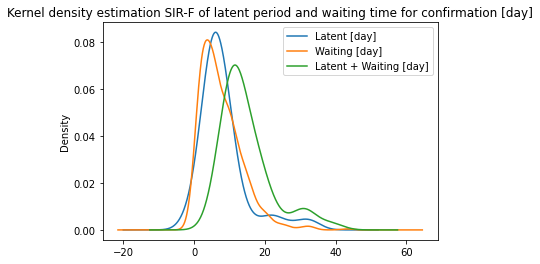

count       mean       std  min   25%   50%   75%  \
Latent [day]             83.0   8.180723  6.786185 -2.0   4.0   6.0   9.0   
Waiting [day]           563.0   7.682060  5.890473  0.0   3.0   6.0  11.0   
Latent + Waiting [day]   83.0  14.819277  7.305435  5.0  10.0  13.0  17.5   

                         max  
Latent [day]            34.0  
Waiting [day]           43.0  
Latent + Waiting [day]  40.0

In [87]:
cols = ["Latent [day]", "Waiting [day]", "Latent + Waiting [day]"]
period_df[cols].plot.kde()
plt.title("Kernel density estimation SIR-F of latent period and waiting time for confirmation [day]")
plt.savefig("Kde_latent_period_waiting_time_day.png")
plt.show()
period_df[cols].describe().T

In [88]:
latent_period = period_df["Latent [min]"].median()
waiting_time = period_df["Waiting [min]"].median()
latent_waiting_day = period_df["Latent + Waiting [day]"].median()
print("Latent period median", latent_period)
print("Waiting time median (min)", waiting_time)
print("Latent + waiting time in days (median)", latent_waiting_day)

Latent period median 8640.000000000002
Waiting time median (min) 8640.000000000002
Latent + waiting time in days (median) 13.0


In [89]:
tau = sirf_estimator.info()[1]["tau"]
eg_rho2, eg_rho3 = tau / latent_period, tau / waiting_time
(eg_rho2, eg_rho3)

(0.16666666666666663, 0.16666666666666663)

In [90]:
eg_theta, eg_kappa, eg_rho1, eg_sigma = (0.002, 0.005, 0.2, 0.08)
eg_initials = (0.994, 0.003, 0.002, 0.001, 0, 0)

In [91]:
%%time
eg_df = simulation(
    SEWIRF, eg_initials, step_n=180,
    theta=eg_theta, kappa=eg_kappa, rho1=eg_rho1, rho2=eg_rho2, rho3=eg_rho3, sigma=eg_sigma)
eg_df.tail()

CPU times: user 2.03 ms, sys: 7.57 ms, total: 9.6 ms
Wall time: 9.29 ms


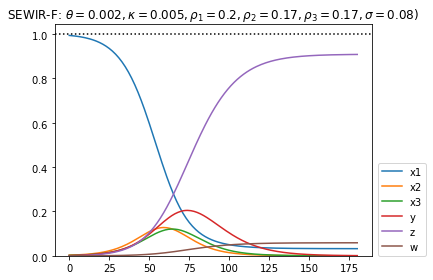

In [122]:
line_plot(
    eg_df.set_index("t"),
    title=r"SEWIR-F: $\theta={0}, \kappa={1}, \rho_1={2}, \rho_2={3}, \rho_3={4}, \sigma={5})$".format(
        eg_theta, eg_kappa, eg_rho1, round(eg_rho2, 2), round(eg_rho3, 2), eg_sigma
    ),
    ylabel="",
    h=1
)

### Dimensionalization
Here, we will dimensionalize the data, assuming that start date is the first date of JHU dataset,  𝜏=1440  [min] and total population  𝑁=1,000,000 .

In [92]:
eg_tau = 1440
eg_start_date = ncov_df["Date"].min()
eg_total_population = 1_000_000
print(f"The start date is {eg_start_date.strftime('%d%b%Y')}.")

The start date is 22Jan2020.


In [93]:
eg_ori_df = pd.DataFrame(
    {
        "Date": (eg_df["t"] * eg_tau).apply(lambda x: timedelta(minutes=x)) + eg_start_date,
        "Group": "Stopping",
        "Country": "Example",
        "Province": "-",
        "Susceptible": (eg_df["x1"] * eg_total_population).astype(np.int64),
        "Exposed": (eg_df["x2"] * eg_total_population).astype(np.int64),
        "Waiting": (eg_df["x3"] * eg_total_population).astype(np.int64),
        "Confirmed": 0,
        "Infected": (eg_df["y"] * eg_total_population).astype(np.int64)
    }
)
eg_ori_df["Recovered"] = (eg_df["z"] * eg_total_population).astype(np.int64)
eg_ori_df["Fatal"] = (eg_df["w"] * eg_total_population).astype(np.int64)
eg_ori_df["Confirmed"] = eg_ori_df[["Infected", "Recovered", "Fatal"]].sum(axis=1)
eg_ori_df.tail()

Date     Group  Country Province  Susceptible  Exposed  Waiting  \
176 2020-07-16  Stopping  Example        -        32199       73      120   
177 2020-07-17  Stopping  Example        -        32192       68      113   
178 2020-07-18  Stopping  Example        -        32185       64      106   
179 2020-07-19  Stopping  Example        -        32179       60       99   
180 2020-07-20  Stopping  Example        -        32173       56       92   

     Confirmed  Infected  Recovered  Fatal  
176     967606      1024     907905  58677  
177     967625       959     907984  58682  
178     967642       898     908058  58686  
179     967660       841     908128  58691  
180     967676       788     908193  58695

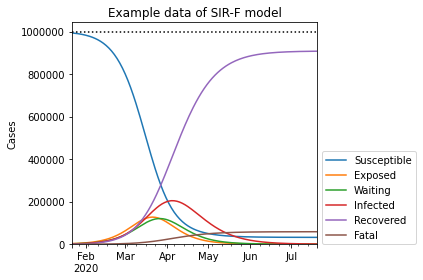

In [125]:
cols = ["Susceptible", "Exposed", "Waiting", "Infected", "Recovered", "Fatal"]
line_plot(
    eg_ori_df.set_index("Date")[cols],
    "Example data of SIR-F model",
    h=eg_total_population,
    y_integer=True
)

# Factors of model parameters


In [94]:
# Value of beta before actions are taken
_, info_dict, param_dict = sirf_estimator.info()
beta_before = param_dict["rho"] / info_dict["tau"]
beta_before

0.00014166618656092804

# As a example, we will predict the impact of lockdown.  𝑔𝑠  will be minimized.

𝑔𝑠  value before actions are taken
𝑔𝑠 : The number of days in a week, susceptible persons go out [day]

We can calculate weighted average of days with age composion of population. Population pyramid in the entire world (global data) will be used.



In [95]:
eg_out_df = go_out("Global")
eg_out_df

Age_first  Age_last     Period_of_life  School  Office  Others   Portion
0           0         2            nursery       3       0       0  0.052210
1           3         5     nursery school       4       0       1  0.051864
2           6        10  elementary school       5       0       1  0.084689
3          11        13      middle school       5       0       1  0.049386
4          14        18        high school       6       0       1  0.079324
5          19        25    university/work       3       3       1  0.107659
6          26        35               work       0       6       1  0.152774
7          36        45               work       0       5       1  0.131630
8          46        55               work       0       5       1  0.116396
9          56        65               work       0       5       1  0.088096
10         66        75            retired       0       0       4  0.055083
11         76        85            retired       0       0       3  0.024309
12         86        95            retired       0       0       2  0.006579

In [96]:
gs_before = (eg_out_df[["School", "Office", "Others"]].sum(axis=1) * eg_out_df["Portion"]).sum()
gs_before

5.921853248424339

## 𝑔𝑠  value AFTER actions are taken
If all schools and offices will be closed,  𝑔𝑠  can be reduced. People will go out one day for other reasons instead of going to school/office.

In [97]:
df = eg_out_df.copy()
df.loc[df["School"] + df["Office"] > 0, "Others"] += 1
df["School"] = 0
df["Office"] = 0
eg_out_df_after = df.copy()
eg_out_df_after

Age_first  Age_last     Period_of_life  School  Office  Others   Portion
0           0         2            nursery       0       0       1  0.052210
1           3         5     nursery school       0       0       2  0.051864
2           6        10  elementary school       0       0       2  0.084689
3          11        13      middle school       0       0       2  0.049386
4          14        18        high school       0       0       2  0.079324
5          19        25    university/work       0       0       2  0.107659
6          26        35               work       0       0       2  0.152774
7          36        45               work       0       0       2  0.131630
8          46        55               work       0       0       2  0.116396
9          56        65               work       0       0       2  0.088096
10         66        75            retired       0       0       4  0.055083
11         76        85            retired       0       0       3  0.024309
12         86        95            retired       0       0       2  0.006579

In [98]:
df = eg_out_df_after.copy()
gs_after = (df[["School", "Office", "Others"]].sum(axis=1) * df["Portion"]).sum()
gs_after

2.082265659970043

## Impact of actions on  𝛽 
In SIR-F model  𝑔𝑠  is a control factor of  𝛽 .
Actions taken at 30th day:
All schools and offices will be closed.

In [99]:
beta_after = beta_before * (gs_after / gs_before)
beta_after / beta_before

0.35162398874441597

# Predict the number of cases: with actions from 30th day
There is a delay between the time point of starting actions and that of appearing the effect. Because  𝐼  is the main variable, the length of delay can be estimated as sum of latent period and waiting time for confirmation. This value [day] was calculated in "SIR-F with exposed/waiting cases" section.

In [100]:
latent_waiting_day

13.0

In [101]:
first_model, info_dict, param_dict = sirf_estimator.info()
info_dict["name"] = "Example"
changed_param_dict = param_dict.copy()
changed_param_dict["rho"] = param_dict["rho"] * beta_after / beta_before
df = pd.DataFrame.from_dict(
    {"No actions": param_dict, "With actions": changed_param_dict},
    orient="index"
)
df = df.loc[:, ["theta", "kappa", "rho", "sigma"]]
df["R0"] = df.apply(lambda x: first_model(**x.to_dict()).calc_r0(), axis=1)
df["tau"] = info_dict["tau"]
df

theta     kappa       rho     sigma    R0   tau
No actions    0.028431  0.002413  0.203999  0.077044  2.49  1440
With actions  0.028431  0.002413  0.071731  0.077044  0.88  1440

## without actions

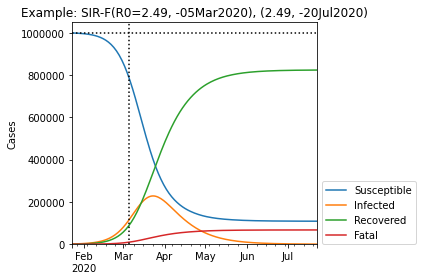

In [132]:
predicter = Predicter(**info_dict)
predicter.add(SIRF, end_day_n=30, count_from_last=False, vline=False, **param_dict)
predicter.add(SIRF, end_day_n=latent_waiting_day, count_from_last=True, **param_dict)
predicter.add(SIRF, end_day_n=180, count_from_last=False, **param_dict)
predicter.restore_graph(drop_cols=None, y_integer=True)

## with actions

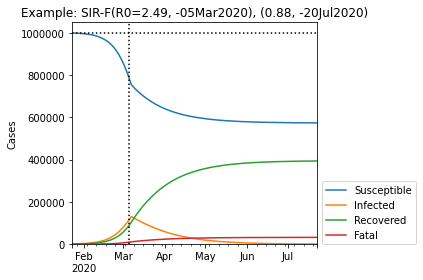

In [133]:
predicter = Predicter(**info_dict)
predicter.add(SIRF, end_day_n=30, count_from_last=False, vline=False, **param_dict)
predicter.add(SIRF, end_day_n=latent_waiting_day, count_from_last=True, **param_dict)
predicter.add(SIRF, end_day_n=180, count_from_last=False, **changed_param_dict)
predicter.restore_graph(drop_cols=None, y_integer=True)

## The actions result in:
* Total number of confirmed cases was decreased.* 
* Peak point of infected cases was delayed.

# Control factors of recovery rate  𝛾  and mortality rate  𝛼2 


In [102]:
gamma_before = param_dict["sigma"] / info_dict["tau"]
alpha2_before = param_dict["kappa"] / info_dict["tau"]
(gamma_before, alpha2_before)

(5.3502996558391707e-05, 1.675359838080792e-06)

In [103]:
h_bar_before, s_bar_before = 0.5, 0.5

## ℎ¯  and  𝑠¯  value AFTER actions are taken
Assumtions of new medicines:
"Protease inhibitor" inhibits virus multiplication. This will reduce  ℎ¯ . We assume the  ℎ¯  will 10%.

In [104]:
h_bar_after = h_bar_before * 0.1
s_bar_after = s_bar_before
(h_bar_after, s_bar_after)

(0.05, 0.5)

## Impact on  𝛾  and  𝛼2 
Actions to take:
New Protein inhibitor medicine was introduced.

In [105]:
gamma_after = gamma_before * (1 - h_bar_after * s_bar_after) / (1 - h_bar_before * s_bar_before)
gamma_after

6.955389552590922e-05

In [106]:
alpha2_after = alpha2_before * (h_bar_after * s_bar_after) / (h_bar_before * s_bar_before)
alpha2_after

1.6753598380807922e-07

# Predict the number of case: with new medicines after 30th day

In [108]:
first_model, info_dict, param_dict = sirf_estimator.info()
info_dict["name"] = "Example"
changed_param_dict = param_dict.copy()
changed_param_dict["sigma"] = param_dict["sigma"] * gamma_after / gamma_before
changed_param_dict["kappa"] = param_dict["kappa"] * alpha2_after / alpha2_before
df = pd.DataFrame.from_dict(
    {"No medicines": param_dict, "With medicines": changed_param_dict},
    orient="index"
)
df = df.loc[:, ["theta", "kappa", "rho", "sigma"]]
df["R0"] = df.apply(lambda x: first_model(**x.to_dict()).calc_r0(), axis=1)
df["tau"] = info_dict["tau"]
df

theta     kappa       rho     sigma    R0   tau
No medicines    0.028431  0.002413  0.203999  0.077044  2.49  1440
With medicines  0.028431  0.000241  0.203999  0.100158  1.97  1440

## without new medicines

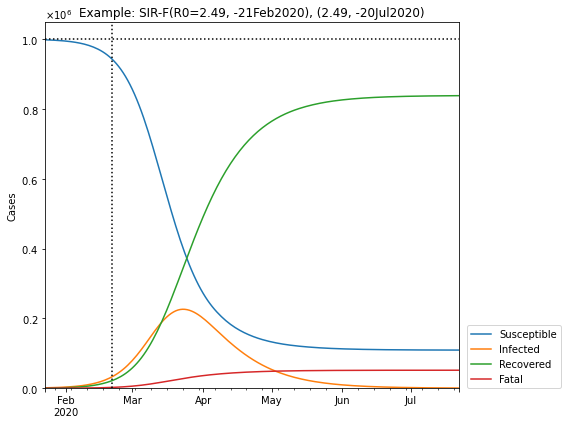

In [110]:
from datetime import datetime
predicter = Predicter(**info_dict)
predicter.add(SIRF, end_day_n=30, count_from_last=False, vline=True, **param_dict)
predicter.add(SIRF, end_day_n=180, count_from_last=False, **param_dict)
predicter.restore_graph(drop_cols=None)

## with new medicines

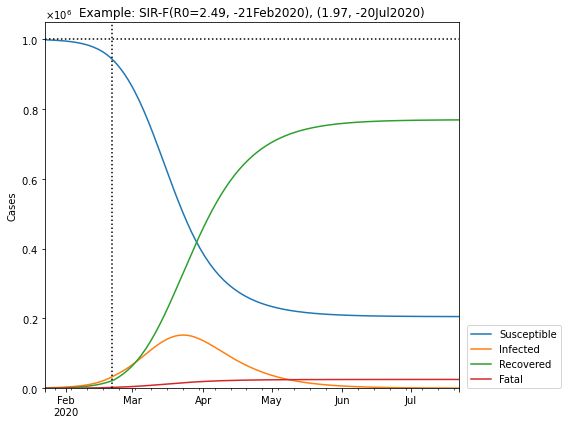

In [111]:
predicter = Predicter(**info_dict)
predicter.add(SIRF, end_day_n=30, count_from_last=False, vline=True, **param_dict)
predicter.add(SIRF, end_day_n=180, count_from_last=False, **changed_param_dict)
predicter.restore_graph(drop_cols=None)

## New medicines result in:
Total numbers of confirmed/deaths cases were decreased.

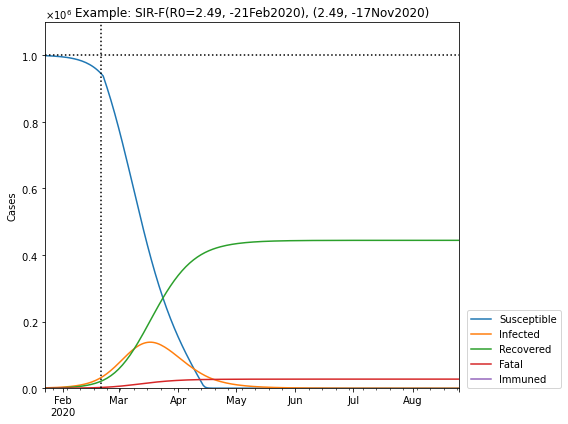

In [112]:
first_model, info_dict, param_dict = sirf_estimator.info()
changed_param_dict = param_dict.copy()
changed_param_dict["n"] = eg_total_population
changed_param_dict["v_per_day"] = 10000
predicter = Predicter(**info_dict)
predicter.add(SIRF, end_day_n=30, count_from_last=False, **param_dict)
predicter.add(SIRFV, end_day_n=300, count_from_last=False, **changed_param_dict)
predicter.restore_graph(drop_cols=None)

### With vactination:
Outbreak will end relatively quickly.

# S-R trend analysis
In the previous section, we found that parameter values can be changed by actions. To predict the future, we need to recognize the parameter change from the actual records. Here, trend analysis method will be introduced.



In [113]:
df = pd.DataFrame()
eg_initials = (0.999, 0.001, 0, 0)
eg_total_population = 1_000_000
eg_step_n = 200
eg_param_dict = {
    "1": {"theta": 0.0002, "kappa": 0.005, "rho": 0.20, "sigma": 0.075},
    "2": {"theta": 0.0002, "kappa": 0.005, "rho": 0.40, "sigma": 0.075},
    "3": {"theta": 0.0002, "kappa": 0.005, "rho": 0.15, "sigma": 0.075},
    "4": {"theta": 0.0002, "kappa": 0.003, "rho": 0.20, "sigma": 0.150},
    "5": {"theta": 0.0000, "kappa": 0.005, "rho": 0.20, "sigma": 0.075},
}

for (num, _dict) in eg_param_dict.items():
    _df = simulation(SIRF, eg_initials, step_n=eg_step_n, **_dict)
    _df = (_df.set_index("t") * eg_total_population).astype(np.int64)
    _df = _df.reset_index()
    _df["Country"] = f"Scenario {num}"
    df = pd.concat([df, _df], axis=0, ignore_index=True)

df["Date"] = ncov_df["Date"].min() + pd.Series(df["t"]).apply(lambda x: timedelta(days=x))
df["Group"] = "Stopping"
df["Province"] = "-"
df = df.rename({"y": "Infected", "z": "Recovered", "w": "Deaths"}, axis=1)
df["Confirmed"] = df[["Infected", "Recovered", "Deaths"]].sum(axis=1)
df = df.loc[:, ncov_df.columns]
eg_ncov_df = df.copy()
eg_ncov_df.tail()

Date     Group     Country Province  Confirmed  Infected  Deaths  \
1000 2020-08-05  Stopping  Scenario 5        -     893414       204   55825   
1001 2020-08-06  Stopping  Scenario 5        -     893419       193   55826   
1002 2020-08-07  Stopping  Scenario 5        -     893423       182   55827   
1003 2020-08-08  Stopping  Scenario 5        -     893427       171   55828   
1004 2020-08-09  Stopping  Scenario 5        -     893430       161   55829   

      Recovered  
1000     837385  
1001     837400  
1002     837414  
1003     837428  
1004     837440

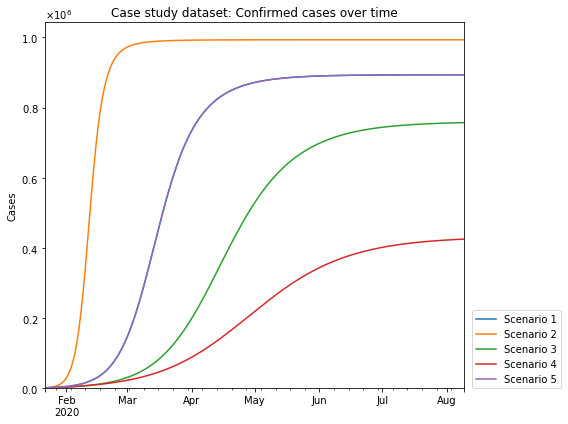

In [156]:
line_plot(
    eg_ncov_df.pivot_table(index="Date", columns="Country", values="Confirmed"),
    "Case study dataset: Confirmed cases over time"
)

## Values of Example 1  (𝜅=0.002)  are nealy equal to that of Example 5  (𝜅=0.000)  as shown in the next figure.

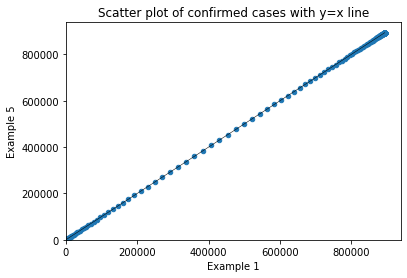

In [147]:
df = eg_ncov_df.pivot_table(index="Date", columns="Country", values="Confirmed")
df.plot.scatter(x="Example 1", y="Example 5")
plt.plot(df["Example 1"], df["Example 1"], color="black", linewidth=0.5)
plt.xlim(0, None)
plt.ylim(0, None)
plt.title("Scatter plot of confirmed cases with y=x line")
plt.show()

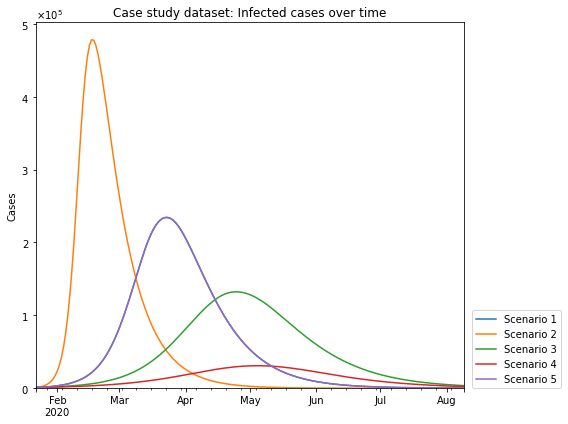

In [155]:
line_plot(
    eg_ncov_df.pivot_table(index="Date", columns="Country", values="Infected"),
    "Case study dataset: Infected cases over time"
)

# Δ Confirmed vs. Confirmed in log-log plot
The numer of new confirmed cases Δ𝐶 can be desribed as,
Δ𝐶=𝑁−1𝛽(𝑁−𝐶)𝐼
This is because 𝐶=𝐼+𝑅+𝐹 and 𝑆=𝑁−𝐶 in SIR-F model.

𝑡 is a measurable variable, but this is just an intermediate variable. Δ𝐶 is determined by cummurative number of cases.

In addition, 𝐼 is determined by 𝐶 when the parameters (𝛼1,𝛼2,𝛽,𝛾) are fixed.
Then,
Δ𝐶=𝑓(𝐶)
Plots of (𝑥,𝑦)=(𝐶,Δ𝐶) in log-log scale are shown in the next figure.

Note:
This idea is from YouTube: How To Tell If We're Beating COVID-19. SIR-type models are not mentioned in this video, but we can link the idea with SIR-F model as above.

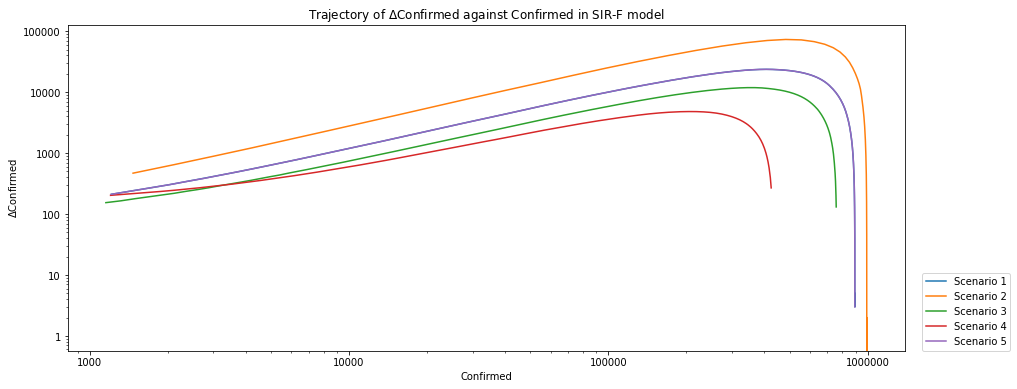

In [186]:
plt.figure(figsize=(15,6))
for country in eg_ncov_df["Country"].unique():
    df = eg_ncov_df.copy()
    df = df.loc[df["Country"] == country, :]
    df = df.groupby("Date").last()
    
    plt.plot(df["Confirmed"], df["Confirmed"].diff(), label=country)

plt.title(r"Trajectory of $\Delta$Confirmed against Confirmed in SIR-F model")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Confirmed")
plt.ylabel(r"$\Delta$Confirmed")
fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
plt.gca().xaxis.set_major_formatter(fmt)
plt.gca().yaxis.set_major_formatter(fmt)
plt.legend(bbox_to_anchor=(1.02, 0), loc="lower left", borderaxespad=0)
plt.savefig(r"Trajectory of $\Delta$Confirmed against Confirmed in SIR-F model.png")
plt.show()

#### Note: Because  𝐶(𝑡)  is a cummurative number,  𝐶(𝑡+Δ𝑡)≥𝐶(𝑡)  for all  𝑡  and  Δ𝑡>0 .

# argmax( Δ𝐶 ) in  (𝑥,𝑦)=(𝑡,𝐶(𝑡))  plot
What can we know from  (𝐶,Δ𝐶)  plot? Here, we will discuss max value of  Δ𝐶 .

When  Δ𝐶  shows max value of  Δ𝐶  in "Example 5" dataset (equal to SIR-D model),  𝑡  and  𝐶(𝑡)  is

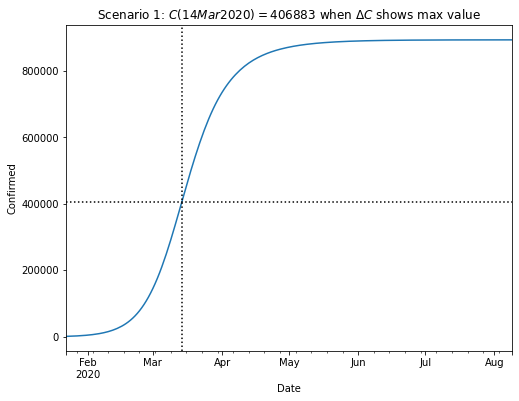

In [181]:
country = "Scenario 1"
df = eg_ncov_df.copy()
df = df.loc[df["Country"] == country, :].groupby("Date").last()
arg_tt = df["Confirmed"].diff().idxmax()
arg_cc = df.loc[arg_tt, "Confirmed"]
# Plot
df["Confirmed"].plot(figsize=(8,6))
plt.axhline(y=arg_cc, color="black", linestyle=":")
plt.axvline(x=arg_tt, color="black", linestyle=":")
plt.ylabel("Confirmed")
plt.title(
    r'{0}: $C({1})={2}$ when $\Delta C$ shows max value'.format(
        country, arg_tt.strftime("%d%b%Y"), arg_cc)
)
fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
plt.gca().yaxis.set_major_formatter(fmt)
plt.savefig(r'{0}: $C({1})={2}$ when $\Delta C$ shows max value.png'.format(
        country, arg_tt.strftime("%d%b%Y"), arg_cc))
plt.show()

# Curve fitting of 𝐶(𝑡)
𝐶(𝑡) is sometimes described by logistic function and Gompertz function.



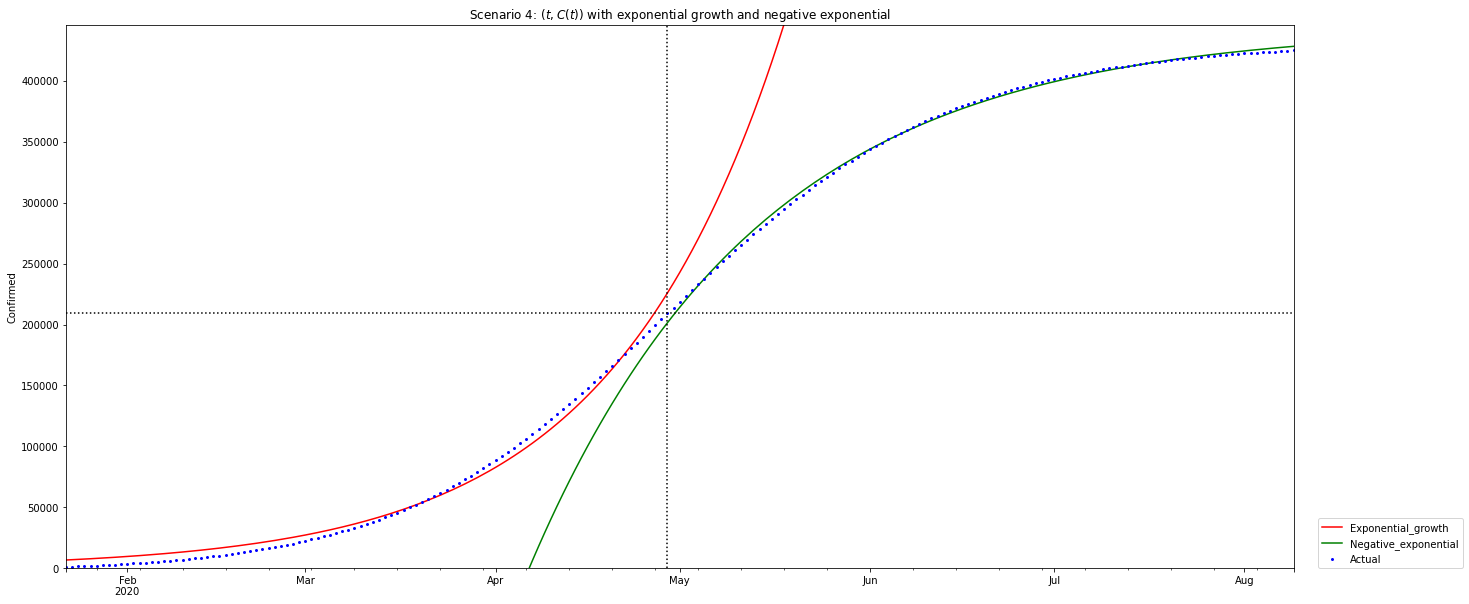

In [177]:
country = "Scenario 4"
df = eg_ncov_df.copy()
df = df.loc[df["Country"] == country, :].groupby("Date").last()
start_date = df.index.min()
arg_tt = df["Confirmed"].diff().idxmax()
arg_dd = int((arg_tt - start_date).total_seconds() / 60 / 60 / 24)
arg_cc = df.loc[arg_tt, "Confirmed"]
# Convert date to elapsed time (day)
df.index = ((df.index - start_date).total_seconds() / 60 / 60 / 24).astype(np.int64)
# Curve fitting with exponential growth function
f = lambda x, a, b: a * np.exp(b * x)
series = df.loc[df.index <= arg_dd, "Confirmed"]
a_ini = series[0]
b_ini = np.log(arg_cc / a_ini) / arg_dd
param, _ = curve_fit(f, series.index, series, p0=[a_ini, b_ini])
f_partial = functools.partial(f, a=param[0], b=param[1])
df["Exponential_growth"] = pd.Series(df.index).apply(lambda x: f_partial(x))
# Curve fitting with negative exponential function
f = lambda x, a, b, c: c - a * np.exp(- b * (x - arg_dd))
series = df.loc[df.index >= arg_dd, "Confirmed"]
c_ini = series.max()
a_ini = c_ini - arg_cc
b_ini = series.diff()[arg_dd + 1] / a_ini
param, _ = curve_fit(f, series.index, series, p0=[a_ini, b_ini, c_ini])
f_partial = functools.partial(f, a=param[0], b=param[1], c=param[2])
df["Negative_exponential"] = pd.Series(df.index).apply(lambda x: f_partial(x))
# Convert elapsed time (day) to date
df.index = start_date + pd.Series(df.index).apply(lambda x: timedelta(days=x))
# Plot
df[["Exponential_growth", "Negative_exponential"]].plot(color=["red", "green"], figsize=(22,10))
df["Actual"] = df["Confirmed"]
df["Actual"].plot(color="blue", marker=".", markeredgewidth=0, linewidth=0, figsize=(22,10))
plt.axhline(y=arg_cc, color="black", linestyle=":")
plt.axvline(x=arg_tt, color="black", linestyle=":")
plt.ylabel("Confirmed")
plt.ylim(0, max(df["Confirmed"]) * 1.05)
plt.title(r"{0}: $(t, C(t))$ with exponential growth and negative exponential".format(country))
fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(True)
plt.gca().yaxis.set_major_formatter(fmt)
plt.legend(bbox_to_anchor=(1.02, 0), loc="lower left", borderaxespad=0)
plt.savefig(r"{0}: $(t, C(t))$ with exponential growth and negative exponential.png".format(country))
plt.show()

# S-R plane
Here, we will discuss the replationship of Susceptible and Recovered.



In [114]:
S = sym.symbols("S", cls=sym.Function)
N, R = sym.symbols("N R", positive=True)
beta, gamma = sym.symbols(r"\beta \gamma", positive=True)
dSdR = - beta / (N * gamma) * S(R)
sr = sym.dsolve(S(R).diff(R) - dSdR, hint="separable", ics={S(0): N})
sr

Eq(S(R), N*exp(-R*\beta/(N*\gamma)))

In [115]:
sym.Eq(sym.simplify(sym.log(sr.lhs)), sym.simplify(sym.log(sr.rhs)))

Eq(log(S(R)), log(N) - R*\beta/(N*\gamma))

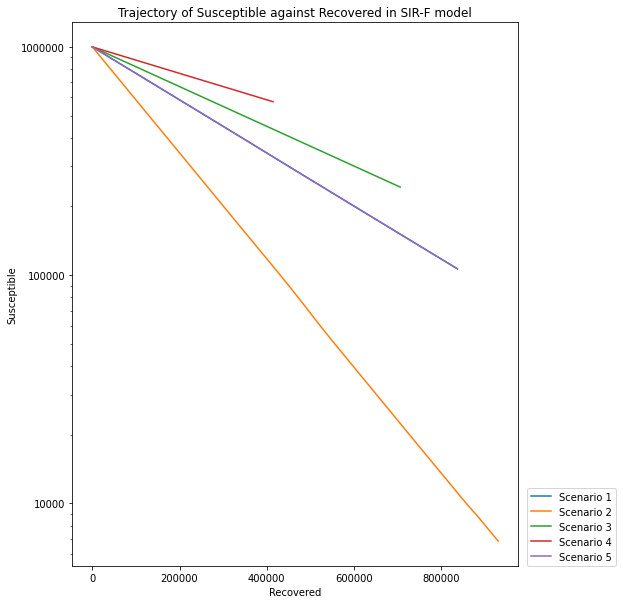

In [121]:
plt.figure(figsize=(8,10))
for country in eg_ncov_df["Country"].unique():
    df = eg_ncov_df.copy()
    df = df.loc[df["Country"] == country, :]
    df = df.groupby("Date").last()
    plt.plot(df["Recovered"], eg_total_population - df["Confirmed"], label=country)

    
plt.title(r"Trajectory of Susceptible against Recovered in SIR-F model")
plt.yscale("log")
plt.xlabel("Recovered")
plt.ylabel("Susceptible")
fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
plt.gca().xaxis.set_major_formatter(fmt)
plt.gca().yaxis.set_major_formatter(fmt)
plt.legend(bbox_to_anchor=(1.02, 0), loc="lower left", borderaxespad=0)
plt.savefig('Trajectory_susceptible_recovered_sir_model.png')
plt.show()

#### Nete: Because  𝑅(𝑡)  is a cummurative number,  𝑅(𝑡+Δ𝑡)≥𝑅(𝑡)  for all  𝑡  and  Δ𝑡>0 .

Thus, slope of  log𝑆(𝑅)  will be changed when SIR-F parameters are changed. We need to split the actual data, considering the change points of S-R line in log-scale. This logic will be used for actual data in scenario analysis section.

# S-R trend of actual data in one country
We will perform S-R trend analysis for actual data in Italy as an example.

Let's see the plot of S-R trend.

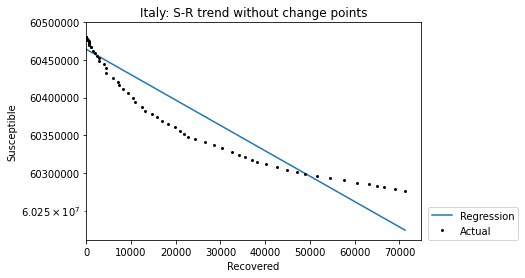

In [162]:
ita_trend = Trend(ncov_df, population_dict["Italy"], name="Italy", places=[("Italy", None)])
_ = ita_trend.analyse()

Plots of Actual data do not show a line. This means SIR-F parameters changed at some time-points. Next, we will find the time-points, assuming that there are three change points.

In [191]:
%%time
change_points = ita_trend.analyse(n_points=3)

TypeError: unsupported type for timedelta days component: numpy.int64

In [71]:
fra_scenario = Scenario(ncov_df, name="France", population_dict=population_dict)

In [72]:
fra_scenario.name

'France'

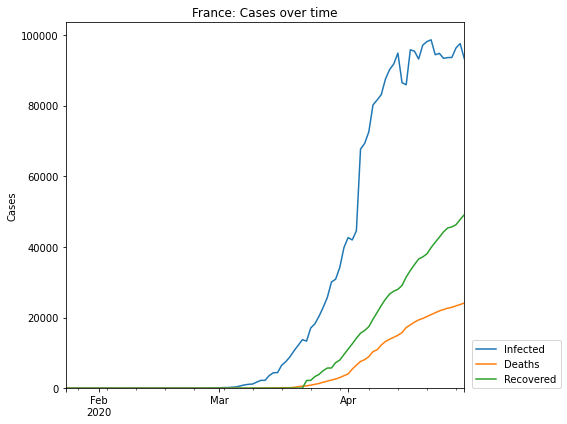

Date  Confirmed  Infected  Deaths  Recovered
92 2020-04-25     161644     93624   22648      45372
93 2020-04-26     162220     93649   22890      45681
94 2020-04-27     165963     96343   23327      46293
95 2020-04-28     169053     97584   23694      47775
96 2020-04-29     166543     93304   24121      49118

In [73]:
fra_scenario.show_record().tail()

NameError: name 'datetime' is not defined

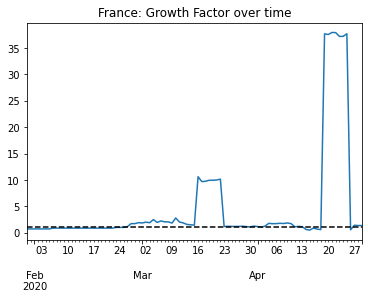

In [74]:
fra_scenario.growth_factor()

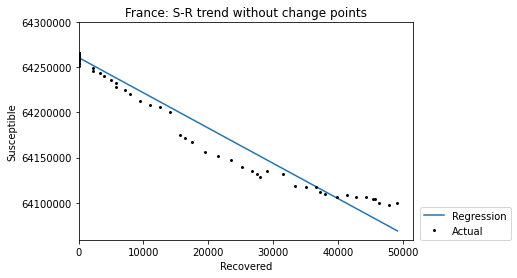

In [75]:
_ = fra_scenario.trend()

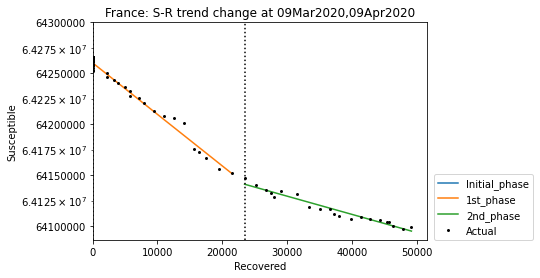

In [80]:
fra_change_points = fra_scenario.trend(n_points=2)

## Phases in Italy

In [81]:
from datetime import datetime
fra_scenario.set_phase(start_dates=fra_change_points)

start_date   end_date  population
1st  09Mar2020  08Apr2020    64266012
2nd  09Apr2020          -    64266012

## Evaluate SIR-F parameters

In [82]:
fra_scenario.estimate(SIRF)

Hyperparameter estimation of 1st phase.
	Estimator was created.
		100 trials finished in 0 min 24 sec.
	Estimator will be replaced because estimated z is non-monotonic.
	Estimator was created.
		100 trials finished in 0 min 45 sec.
	Estimator will be replaced because estimated z is non-monotonic.
	Estimator was created.
		100 trials finished in 0 min 31 sec.
	Estimator will be replaced because estimated z is non-monotonic.
	Estimator was created.
		100 trials finished in 0 min 27 sec.
	Estimator will be replaced because estimated z is non-monotonic.
	Estimator was created.
		100 trials finished in 0 min 28 sec.
	Estimator will be replaced because estimated z is non-monotonic.
	Estimator was created.
		100 trials finished in 0 min 17 sec.
	Estimator will be replaced because estimated z is non-monotonic.
	Estimator was created.
		100 trials finished in 0 min 35 sec.
	Estimator will be replaced because estimated z is non-monotonic.
	Estimator was created.
		100 trials finished in 0 min 43

KeyboardInterrupt: 

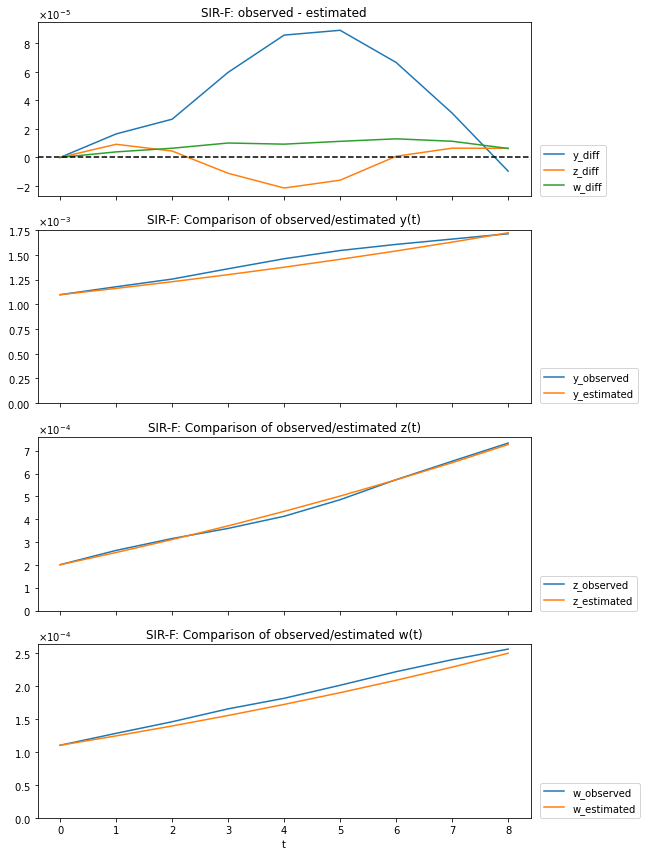

In [449]:
fra_scenario.accuracy_graph(phase_n=1)

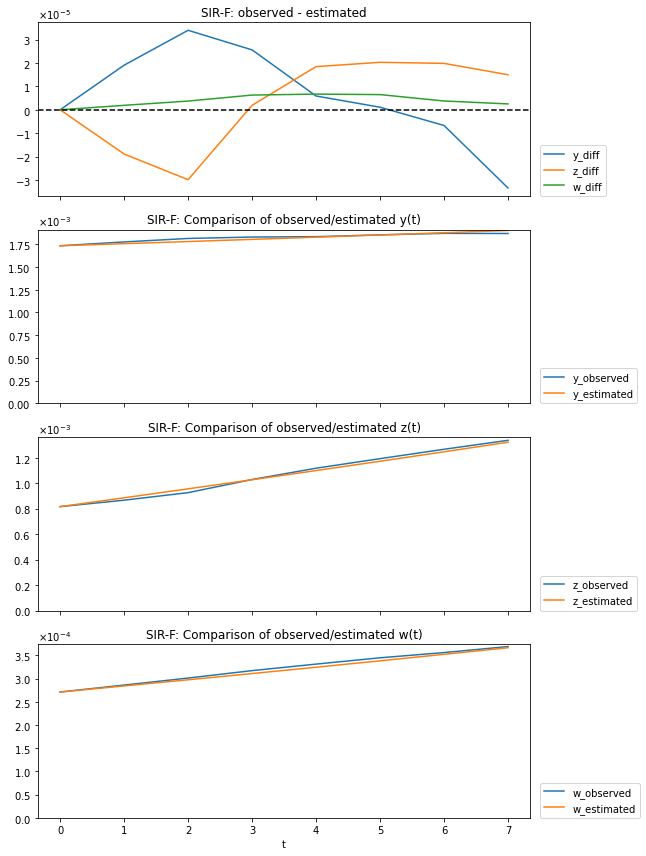

In [450]:
fra_scenario.accuracy_graph(phase_n=2)

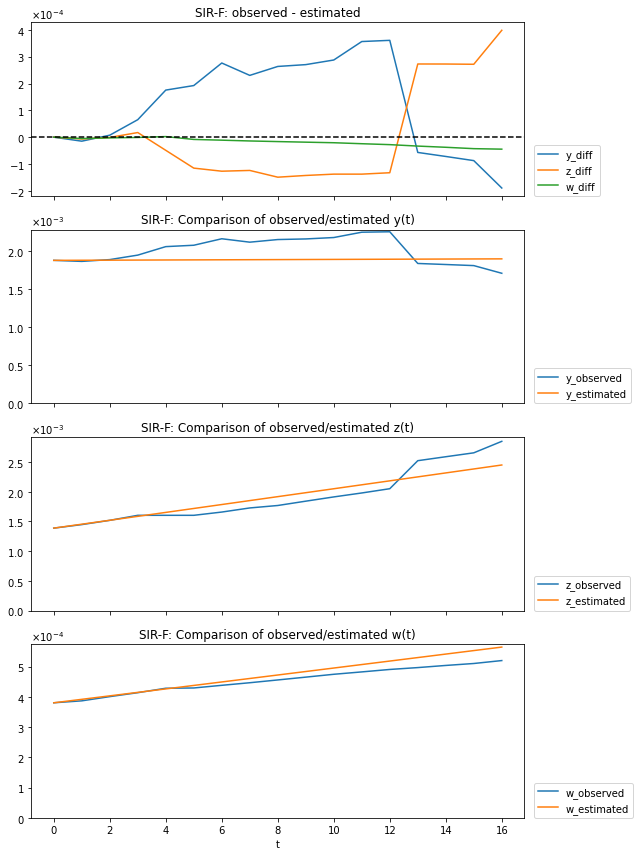

In [451]:
fra_scenario.accuracy_graph(phase_n=3)

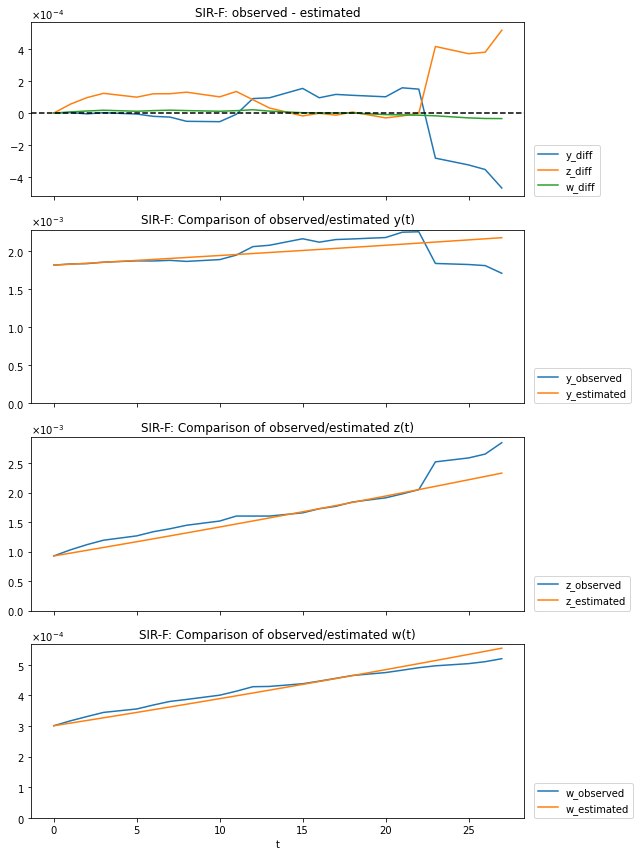

In [420]:
fra_scenario.accuracy_graph(phase_n=4)

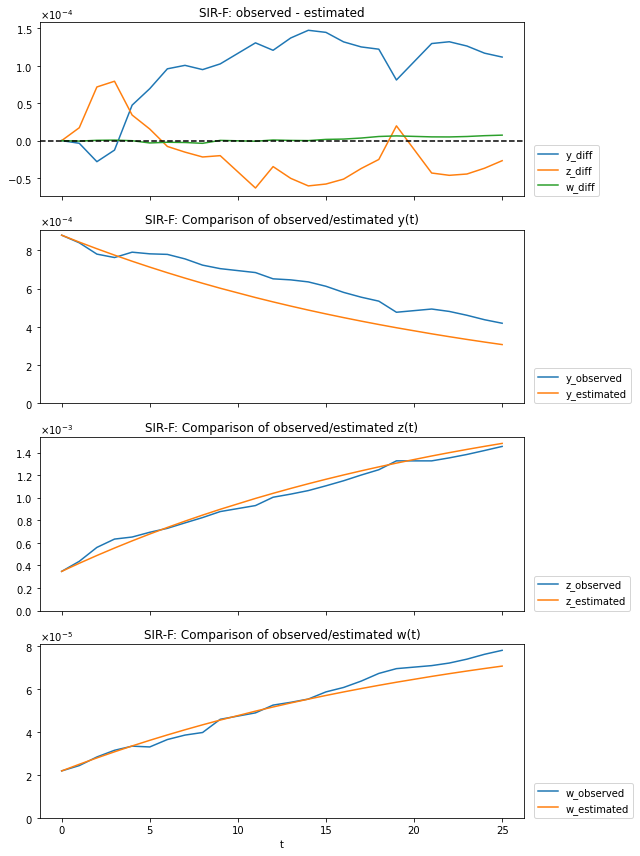

In [357]:
fra_scenario.accuracy_graph(phase_n=4)

## Compare predicted number of confirmed cases

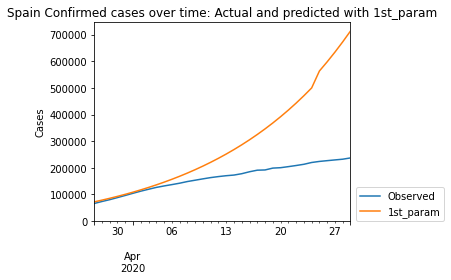

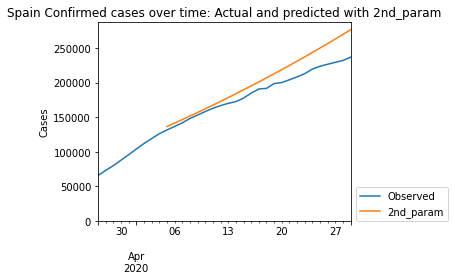

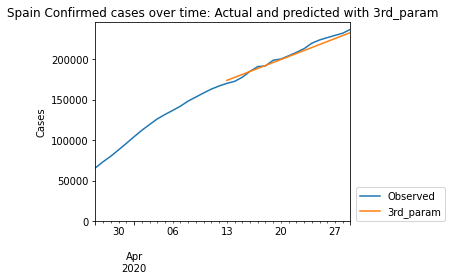

In [452]:
fra_scenario.compare_estimated_numbers(phases=["1st", "2nd", "3rd"])

## Compare parameters

In [187]:
fraa_scenario.show_parameters()

start_date   end_date  population  tau     theta     kappa       rho  \
1st  14Mar2020  27Mar2020    60480000  407  0.060607  0.001332  0.040091   
2nd  28Mar2020  11Apr2020    60480000  407  0.117544  0.000590  0.014567   
3rd  12Apr2020          -    60480000  407  0.109992  0.000845  0.008173   

        sigma    Rt     score  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
1st  0.005358  5.63  0.115993       0.061             212             7   
2nd  0.004240  2.66  0.038754       0.118             479            19   
3rd  0.006385  1.01  0.047542       0.110             334            34   

     1/gamma [day]  
1st             52  
2nd             66  
3rd             44

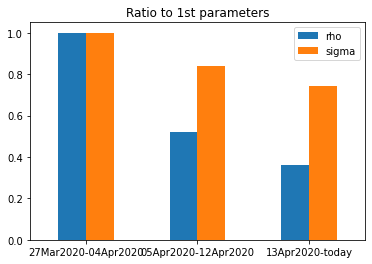

In [454]:
fra_scenario.param_history(["rho", "sigma"])

In [455]:
fra_scenario.param_df[["start_date", "end_date", "rho"]]

start_date   end_date       rho
1st  27Mar2020  04Apr2020  0.116665
2nd  05Apr2020  12Apr2020  0.060722
3rd  13Apr2020          -  0.042139

In [337]:
!pip3 install xlrd

    100% |████████████████████████████████| 112kB 4.3MB/s ta 0:00:01


In [68]:
fra_action_raw = pd.read_excel(
    "./covid dataset/covid19-prevention-in-italy/Dataset_Italy_COVID_19.xlsx",
    sheet_name="Foglio1"
)
fra_action_raw.head()

Country            Region  \
0   Italy               NaN   
1   Italy               NaN   
2   Italy               NaN   
3   Italy               NaN   
4   Italy  Lombardia,Veneto   

                                             Village   Start date  \
0                                                NaN  30-jan-2020   
1                                                NaN  03-feb-2020   
2                                                NaN  06-feb-2020   
3                                                NaN  21-feb-2020   
4  Vo’ Euganeo (Veneto) e Codogno, Castiglione d’...  23-feb-2020   

      End Date                                             Action  \
0          NaN                               Restriction of entry   
1          NaN                           Leave from epidemic area   
2          NaN                             Control in the Airport   
3  21-feb-2020                                        Quaranteene   
4          NaN  containment and management the Italian infecte...   

                                              Detail Number of people  \
0  All flights to and from China have been suspended              NaN   
1  Return of people present in countries at risk ...              NaN   
2  Airport monitoring and control for domestic an...            62000   
3  Mandatory quarantine isolation for close conta...              NaN   
4  decree-law introducing urgent measures regardi...           53856‬   

                                                link  
0  http://www.governo.it/it/approfondimento/coron...  
1  http://www.governo.it/it/approfondimento/coron...  
2  http://www.governo.it/it/approfondimento/coron...  
3  http://www.governo.it/it/approfondimento/coron...  
4  http://www.governo.it/it/approfondimento/coron...

In [69]:
df = fra_action_raw.copy()
df = df.drop(["Country", "Village", "link"], axis=1)
df.columns = [col.capitalize().replace(" ", "_") for col in df.columns]
df["Start_date"] = pd.to_datetime(df["Start_date"])
df["End_date"] = pd.to_datetime(df["End_date"])
df["Region"] = df["Region"].fillna("-")
df["Number_of_people"] = df["Number_of_people"].fillna(-1)
fra_action_df = df.copy()
fra_action_df.tail()

Region Start_date   End_date  \
7   Emilia Romagna,Friuli Venezia Giulia, Lombardi... 2020-03-07 2020-03-07   
8                                                   - 2020-03-09 2020-05-04   
9                                                   - 2020-03-19        NaT   
10                                                  - 2020-03-20        NaT   
11                                                  - 2020-04-14        NaT   

                                               Action  \
7   more containment and management the Italian in...   
8                                            lockdown   
9                             Medicine sperimentation   
10                                         task force   
11                               open some businesses   

                                               Detail Number_of_people  
7   prohibit any movement in Lombardy and in fourt...               -1  
8   people must stay at home and go out only for f...         60483973  
9   testing began on the drug Tocilizumab, a drug ...              330  
10  create a task force of doctors from all over I...               -1  
11  Reopening of some production activities, newsa...               -1

In [70]:
def _color(data_df):
    df = data_df.copy()
    df.loc[:, :] = str()
    df.iloc[[3, 6, 8], :] = "background-color: lightgreen"
    return df

fra_action_df.style.apply(_color, axis=None)

# Predict the future with last parameters

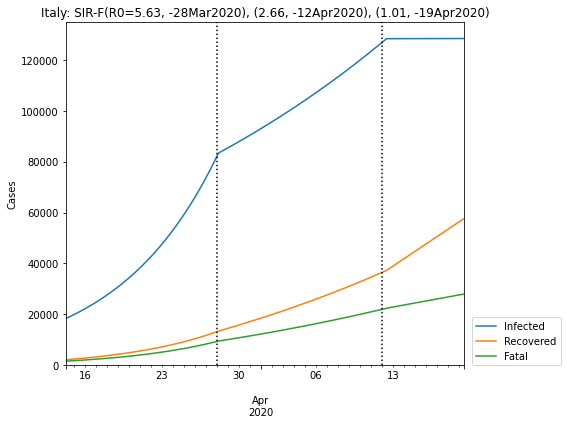

In [188]:
fra_scenario.predict(days=7).tail(7).style.background_gradient(axis=0)

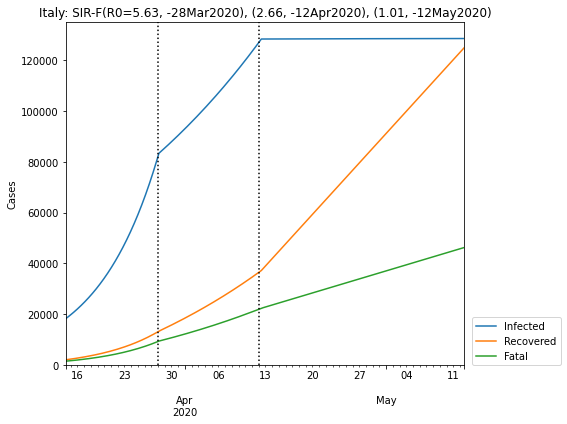

In [189]:
#in a month
fra_scenario.predict(days=30).tail(7).style.background_gradient(axis=0)

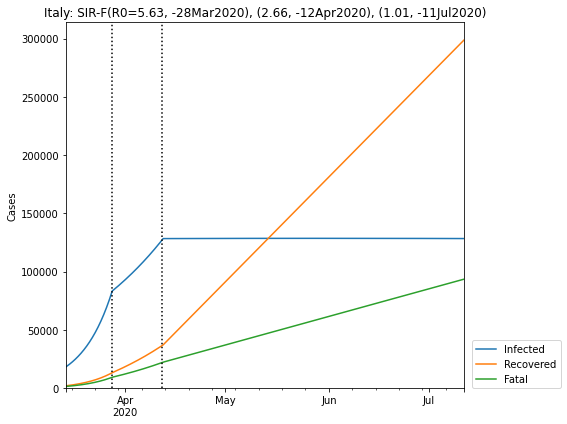

In [190]:
#in 3 months
fra_scenario.predict(days=90).tail(7).style.background_gradient(axis=0)

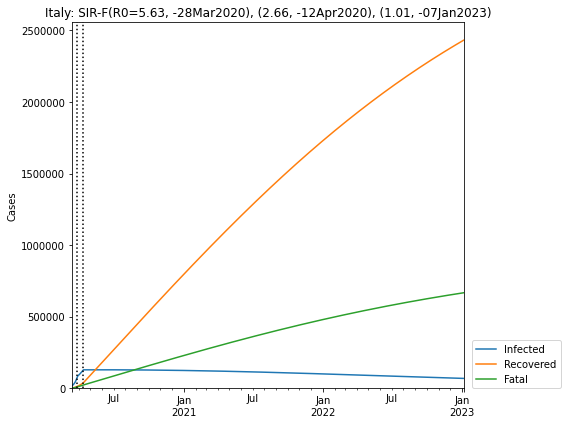

In [191]:
# inlong term
_ = fra_scenario.predict(days=1000, min_infected=1)